# Analyse des données et selection des colonnes interessantes

### Chargement des données dans un dataframe

In [1]:
import pandas as pd

# Chemin du fichier CSV (ajustez selon l'emplacement réel de votre fichier)
# fr.openfoodfacts.org.products
file_path = 'fr.openfoodfacts.org.products.csv/fr.openfoodfacts.org.products.csv'

# Charger le fichier CSV dans un DataFrame
# Utilisez des options comme low_memory pour gérer la mémoire si le fichier est très volumineux

# Pour test et analyser le fichier je vais juste charger les 1000 premières lignes
# df = pd.read_csv(file_path, sep='\t', low_memory=False, nrows=20000)
df = pd.read_csv(file_path, sep='\t', low_memory=False)

In [2]:
# Afficher jusqu'à 200 colonnes (ajustez selon le besoin)
pd.set_option('display.max_columns', 200)

In [3]:
# Afficher le nombre de lignes et colonnes
df.shape

(320772, 162)

In [4]:
df.head()

code                                                url  \
0  0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
1  0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2  0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
3  0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
4  0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity packaging packaging_tags           brands  \
0          NaN      1kg       NaN            NaN  Ferme t'y R'nao   
1          NaN      NaN       NaN            NaN              NaN   
2          NaN      NaN       NaN            NaN   Torn & Glasser   
3          NaN      NaN       NaN            NaN        Grizzlies   
4          NaN      NaN       NaN            NaN   Bob's Red Mill   

       brands_tags categories categories_tags categories_fr origins  \
0  ferme-t-y-r-nao        NaN             NaN           NaN     NaN   
1              NaN        NaN             NaN           NaN     NaN   
2     torn-glasser        NaN             NaN           NaN     NaN   
3        grizzlies        NaN             NaN           NaN     NaN   
4   bob-s-red-mill        NaN             NaN           NaN     NaN   

  origins_tags manufacturing_places manufacturing_places_tags labels  \
0          NaN                  NaN                       NaN    NaN   
1          NaN                  NaN                       NaN    NaN   
2          NaN                  NaN                       NaN    NaN   
3          NaN                  NaN                       NaN    NaN   
4          NaN                  NaN                       NaN    NaN   

  labels_tags labels_fr emb_codes emb_codes_tags first_packaging_code_geo  \
0         NaN       NaN       NaN            NaN                      NaN   
1         NaN       NaN       NaN            NaN                      NaN   
2         NaN       NaN       NaN            NaN                      NaN   
3         NaN       NaN       NaN            NaN                      NaN   
4         NaN       NaN       NaN            NaN                      NaN   

  cities cities_tags purchase_places stores countries    countries_tags  \
0    NaN         NaN             NaN    NaN     en:FR         en:france   
1    NaN         NaN             NaN    NaN        US  en:united-states   
2    NaN         NaN             NaN    NaN        US  en:united-states   
3    NaN         NaN             NaN    NaN        US  en:united-states   
4    NaN         NaN             NaN    NaN        US  en:united-states   

  countries_fr                                   ingredients_text allergens  \
0       France                                                NaN       NaN   
1   États-Unis  Bananas, vegetable oil (coconut oil, corn oil ...       NaN   
2   États-Unis  Peanuts, wheat flour, sugar, rice flour, tapio...       NaN   
3   États-Unis  Organic hazelnuts, organic cashews, organic wa...       NaN   
4   États-Unis                                    Organic polenta       NaN   

  allergens_fr traces traces_tags traces_fr     serving_size 

### Choix de ce que je veux etudier

### Création d'une fonction pour détecter les colonnes ayant 70% de valeur nulle

In [5]:
def colonnes_avec_nulles(dataframe, seuil):
    # Calcul du pourcentage de valeurs nulles pour chaque colonne
    pourcentage_nulles = dataframe.isnull().mean() * 100
    
    # Filtrer les colonnes avec un pourcentage de valeurs nulles supérieur au seuil
    colonnes_filtrees = pourcentage_nulles[pourcentage_nulles > seuil].index.tolist()
    
    return colonnes_filtrees

In [6]:
# Exemple d'utilisation
colonnes_a_supprimer = colonnes_avec_nulles(df, 70)

In [7]:
len(colonnes_a_supprimer)

119

In [8]:
# afficher les colonnes à supprimer
df[colonnes_a_supprimer].sample(10)

generic_name  \
43938                                              NaN   
209244  Maroilles, fromage au lait de vache pasteurisé   
87906                                              NaN   
213579                                             NaN   
111733                                             NaN   
313229                  Gemengde kruiden en specerijen   
278497                                             NaN   
47531                                              NaN   
81298                                              NaN   
45813                                              NaN   

                                                packaging  \
43938                                                 NaN   
209244  Frais,Film plastique à jeter,Boîte carton à re...   
87906                                                 NaN   
213579                                                NaN   
111733                                       Plastic,Film   
313229                     Glazen pot,Plastic pot,Glasbak   
278497                                                NaN   
47531                                                 NaN   
81298                                                 NaN   
45813                                                 NaN   

                                           packaging_tags  \
43938                                                 NaN   
209244  frais,film-plastique-a-jeter,boite-carton-a-re...   
87906                                                 NaN   
213579                                                NaN   
111733                                       plastic,film   
313229                     glazen-pot,plastic-pot,glasbak   
278497                                                NaN   
47531                                                 NaN   
81298                                                 NaN   
45813                                                 NaN   

                                               categories  \
43938                                                 NaN   
209244  Frais,Produits laitiers,Produits labellisés,Fr...   
87906                                                 NaN   
213579                                                NaN   
111733  Plant-based foods and beverages,Plant-based fo...   
313229    Mengeling van aromatische kruiden en specerijen   
278497                                                NaN   
47531                                                 NaN   
81298                                                 NaN   
45813                                                 NaN   

                                          categories_tags  \
43938                                                 NaN   
209244  en:fresh-foods,en:dairies,en:labeled-products,...   
87906                                                 NaN   
213579                                                NaN   
111733  en:plant-based-foods-and-beverages,en:plant-ba...   
313229  en:groceries,en:condiments,en:mixtures-of-herb...   
278497                                                NaN   
47531                                                 NaN   
81298                                                 NaN   
45813                                                 NaN   

                                            categories_fr origins  \
43938                                                 NaN     NaN   
209244  Frais,Produits laitiers,Produits labellisés,Fr...     NaN   
87906                                                 NaN     NaN   
213579                                                NaN     NaN   
111733  Aliments et boissons à base de végétaux,Alimen...     NaN   
313229   Epicerie,Condiments,Mixtures of herbs and spices     NaN   
278497                                                NaN     NaN   
47531                                                 NaN     NaN   
81298                                                 NaN     NaN   
45813                    

In [9]:
a_supprimer = ['pnns_groups_1', 'pnns_groups_2', 'main_category_fr', 'categories_fr']

In [10]:
final_col_sup = [item for item in colonnes_a_supprimer if item not in a_supprimer]

In [11]:
# Suppression des colonnes du DataFrame
df = df.drop(columns=final_col_sup)

# Afficher le nombre de lignes et colonnes
df.shape

(320772, 47)

In [12]:
df.sample(10)

code                                                url  \
43860   0041303052020  http://world-fr.openfoodfacts.org/produit/0041...   
76592   0071567997461  http://world-fr.openfoodfacts.org/produit/0071...   
66447   0058449320012  http://world-fr.openfoodfacts.org/produit/0058...   
26354   0030264001109  http://world-fr.openfoodfacts.org/produit/0030...   
65815        00547994  http://world-fr.openfoodfacts.org/produit/0054...   
11476   0014321620861  http://world-fr.openfoodfacts.org/produit/0014...   
216860  3263859486716  http://world-fr.openfoodfacts.org/produit/3263...   
135310  0725439117234  http://world-fr.openfoodfacts.org/produit/0725...   
38890   0041190039067  http://world-fr.openfoodfacts.org/produit/0041...   
294763  7613312033753  http://world-fr.openfoodfacts.org/produit/7613...   

                   creator   created_t      created_datetime last_modified_t  \
43860      usda-ndb-import  1489133622  2017-03-10T08:13:42Z      1489133622   
76592      usda-ndb-import  1489076260  2017-03-09T16:17:40Z      1489076260   
66447      usda-ndb-import  1489056356  2017-03-09T10:45:56Z      1489056357   
26354      usda-ndb-import  1489055584  2017-03-09T10:33:04Z      1489055585   
65815                 kyzh  1431521577  2015-05-13T12:52:57Z      1473531046   
11476      usda-ndb-import  1489076898  2017-03-09T16:28:18Z      1489076898   
216860              tacite  1459783513  2016-04-04T15:25:13Z      1459793424   
135310     usda-ndb-import  1489134847  2017-03-10T08:34:07Z      1489134848   
38890      usda-ndb-import  1489060574  2017-03-09T11:56:14Z      1489060574   
294763  openfood-ch-import  1486492693  2017-02-07T18:38:13Z      1487255637   

       last_modified_datetime                                    product_name  \
43860    2017-03-10T08:13:42Z                            Cheddar Party Cheese   
76592    2017-03-09T16:17:40Z                           Sparkling Jelly Beans   
66447    2017-03-09T10:45:57Z  Qi'A, Organic Superfood Cereal, Apple Cinnamon   
26354    2017-03-09T10:33:05Z                         Raisin & Cinnamon Mochi   
65815    2016-09-10T18:10:46Z                                             NaN   
11476    2017-03-09T16:28:18Z                                 Maya Coffee Rub   
216860   2016-04-04T18:10:24Z                            Côtes de Porc cuites   
135310   2017-03-10T08:34:08Z                   Tropical Fruit Flavored Snack   
38890    2017-03-09T11:56:14Z                      A Delicate Cake From Italy   
294763   2017-02-16T14:33:57Z                              Fruit Ice : Fraise   

       quantity                                       brands  \
43860       NaN                           Essential Everyday   
76592       NaN      Jelly Belly,  Jelly Belly Candy Company   
66447       NaN                                Nature's Path   
26354       NaN                                Grainaissance   
65815       NaN                                          NaN   
11476       NaN  Whole Foods Market,  Allegro Coffee Company   
216860    180 g                                 Leader Price   
135310      NaN                                My Essentials   
38890       NaN                                     Shoprite   
294763    294 g                                          NaN   

                                      brands_tags  \
43860                          essential-everyday   
76592       jelly-belly,jelly-belly-candy-company   
66447                               nature-s-path   
26354                               grainaissance   
65815                                         NaN   
11476   whole-foods-market,allegro-coffee-company   
216860                               leader-price   
135310                              my-essentials   
38890                                    shoprite   
294763                                        NaN   

                                            categories_fr countries  \
43860                                          

### Identification et analyse des colonnes ayant plus de 50% de valeurs manquantes

In [13]:
# Exemple d'utilisation
colonnes_a_analyser = colonnes_avec_nulles(df, 50)
final_col_sup = [item for item in colonnes_a_analyser if item not in a_supprimer]

In [14]:
df[final_col_sup]

quantity                                     additives_tags  \
0           1kg                                                NaN   
1           NaN                                                NaN   
2           NaN                                                NaN   
3           NaN                                                NaN   
4           NaN                                                NaN   
...         ...                                                ...   
320767        1                                                NaN   
320768      NaN                                                NaN   
320769     50 g                                                NaN   
320770      67g                                                NaN   
320771      NaN  en:e330,en:e951,en:e150a,en:e950,en:e552,en:e1...   

                                             additives_fr  trans-fat_100g  \
0                                                     NaN             NaN   
1                                                     NaN             0.0   
2                                                     NaN             0.0   
3                                                     NaN             NaN   
4                                                     NaN             NaN   
...                                                   ...             ...   
320767                                                NaN             NaN   
320768                                                NaN             0.0   
320769                                                NaN             NaN   
320770                                                NaN             NaN   
320771  E330 - Acide citrique,E951 - Aspartame,E150a -...             NaN   

        cholesterol_100g  vitamin-a_100g  vitamin-c_100g  calcium_100g  \
0                    NaN             NaN             NaN           NaN   
1                  0.018             0.0          0.0214         0.000   
2                  0.000             0.0          0.0000         0.071   
3                    NaN             NaN             NaN         0.143   
4                    NaN             NaN             NaN           NaN   
...                  ...             ...             ...           ...   
320767               NaN             NaN             NaN           NaN   
320768             0.000             0.0          0.0000         0.000   
320769               NaN             NaN             NaN           NaN   
320770               NaN             NaN             NaN           NaN   
320771               NaN             NaN             NaN           NaN   

        iron_100g  
0             NaN  
1         0.00129  
2         0.00129  
3         0.00514  
4             NaN  
...           ...  
320767        NaN  
320768    0.00000  
320769        NaN  
320770        NaN  
320771        NaN  

[320772 rows x 9 columns]

In [15]:
# Suppression des colonnes du DataFrame
df = df.drop(columns=final_col_sup)

# Afficher le nombre de lignes et colonnes
df.shape

(320772, 38)

In [16]:
df.sample(6)

code                                                url  \
109960  0099482420888  http://world-fr.openfoodfacts.org/produit/0099...   
271206  5011013100217  http://world-fr.openfoodfacts.org/produit/5011...   
52788   0041755009030  http://world-fr.openfoodfacts.org/produit/0041...   
9884    0011701000589  http://world-fr.openfoodfacts.org/produit/0011...   
303245  8006040245205  http://world-fr.openfoodfacts.org/produit/8006...   
127884  0700953952059  http://world-fr.openfoodfacts.org/produit/0700...   

                   creator   created_t      created_datetime last_modified_t  \
109960     usda-ndb-import  1489143033  2017-03-10T10:50:33Z      1489143033   
271206  openfood-ch-import  1486503049  2017-02-07T21:30:49Z      1486503050   
52788      usda-ndb-import  1489074331  2017-03-09T15:45:31Z      1489074331   
9884       usda-ndb-import  1489075107  2017-03-09T15:58:27Z      1489075107   
303245             neptuno  1485080182  2017-01-22T10:16:22Z      1485354760   
127884     usda-ndb-import  1489076510  2017-03-09T16:21:50Z      1489076510   

       last_modified_datetime                              product_name  \
109960   2017-03-10T10:50:33Z                  Organic Prune 100% Juice   
271206   2017-02-07T21:30:50Z                                       NaN   
52788    2017-03-09T15:45:31Z           100% Juice, Ruby Red Grapefruit   
9884     2017-03-09T15:58:27Z  The Original Dark Chocolate, Mint Creams   
303245   2017-01-25T14:32:40Z                     Condisoia Besciamella   
127884   2017-03-09T16:21:50Z        Clear Liquid Water Infusion Sports   

                                      brands  \
109960                    365 Everyday Value   
271206                                   NaN   
52788   Langers,  Langer Juice Company  Inc.   
9884                 Beech's Fine Chocolates   
303245                    Valsoia, Condisoia   
127884                       Watersensations   

                             brands_tags  \
109960                365-everyday-value   
271206                               NaN   
52788   langers,langer-juice-company-inc   
9884             beech-s-fine-chocolates   
303245                 valsoia,condisoia   
127884                   watersensations   

                                            categories_fr countries  \
109960                                                NaN        US   
271206                                                NaN    Suisse   
52788                                                 NaN        US   
9884                                                  NaN        US   
303245  Aliments et boissons à base de végétaux,Alimen...    España   
127884                                                NaN        US   

          countries_tags countries_fr  \
109960  en:united-states   États-Unis   
271206    en:switzerland       Suisse   
52788   en:united-states   États-Unis   
9884    en:united-states   États-Unis   
303245          en:spain      Espagne   
127884  en:united-states   États-Unis   

                                         ingredients_text  \
109960   Filtered water, organic prune juice concentrate.   
271206                                                NaN   
52788   Ruby red grapefruit juice from concentrate (fi...   
9884    Sugar, glucose syrup, cocoa mass, cocoa butter...   
303245  extracto de _soja_ (73%) (agua, semillas de _s...   
127884  Purified water, natural flavors, citric acid, ...   

                   serving_size  additives_n  \
109960         240 ml (8 fl oz)          0.0   
271206                   200 ml          NaN   
52788          237 ml (8 fl oz)          2.0   
9884            100 g (100 GRM)          2.0   
303245                      NaN          1.0   
127884  3.25 ml (0.5 LIQUIPACK)          3.0   

                                                additives  \
109960   [ filtered-water -> en:filtered-water  ]  [ w...   
271206                                                NaN   
52788    [ ruby-r

Par rapport à mon étude, les colonnes que je peux supprimer sont :
- url : cette colonne permet juste de voir la page du produit sur openfoodfact
- creator : cette colonne n'apporte aucunes informations utiles par rapport à mon étude
- Toutes colonnes de date n'est pas utile pour mon étude
- brands_tags ces informations se retrouve dans la colonne "brands"
- Tout ce qui concerne les pays : countries	countries_tags	countries_fr	
- serving_size, additives	ingredients_from_palm_oil_n	ingredients_that_may_be_from_palm_oil_n	
- les colonnes concernants l'état
- Je supprime aussi la colonne saturated-fat-100g car elle apporte une information complémentaire sur la santé mais non utile ici pour mon analyse.

In [17]:
df = df.drop(['url', 'creator','created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'brands_tags', 'countries', 'countries_tags', 'countries_fr', 'serving_size', 'additives', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n','states', 'states_tags', 'states_fr', 'saturated-fat_100g'], axis=1)

In [18]:
df.shape

(320772, 20)

# Partie 2 : Identification et traitement des valeurs abérrantes

### Identification des lignes inutiles et non reconstruisables

In [19]:
df.dtypes

code                        object
product_name                object
brands                      object
categories_fr               object
ingredients_text            object
additives_n                float64
nutrition_grade_fr          object
pnns_groups_1               object
pnns_groups_2               object
main_category_fr            object
energy_100g                float64
fat_100g                   float64
carbohydrates_100g         float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
sodium_100g                float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
dtype: object

In [20]:
# Colonnes à ignorer pour la vérification de valeurs nulles
columns_to_exclude = ['code', 'product_name', 'brands']

# Identifier les colonnes à vérifier pour les valeurs nulles
columns_to_check = [col for col in df.columns if col not in columns_to_exclude]

# Identifier les lignes où toutes les colonnes à vérifier sont nulles
rows_all_null_except_excluded = df[columns_to_check].isnull().all(axis=1)

# Filtrer ces lignes
df[rows_all_null_except_excluded]

code                product_name           brands  \
0       0000000003087          Farine de blé noir  Ferme t'y R'nao   
48      0000000027205                         NaN              NaN   
193     0000013000004                   Kochspeck         Bannholz   
194     0000020004552       Côte du Rhône village              NaN   
217     0000020364373                Zumo de Piña         Vita fit   
...               ...                         ...              ...   
320748        9802735                         NaN              NaN   
320760       99044169                    Poireaux              NaN   
320764           9918  Cheese cake thé vert, yuzu              NaN   
320767  9948282780603           Tomato & ricotta          Panzani    
320770  9980282863788    Tomates aux Vermicelles             Knorr   

       categories_fr ingredients_text  additives_n nutrition_grade_fr  \
0                NaN              NaN          NaN                NaN   
48               NaN              NaN          NaN                NaN   
193              NaN              NaN          NaN                NaN   
194              NaN              NaN          NaN                NaN   
217              NaN              NaN          NaN                NaN   
...              ...              ...          ...                ...   
320748           NaN              NaN          NaN                NaN   
320760           NaN              NaN          NaN                NaN   
320764           NaN              NaN          NaN                NaN   
320767           NaN              NaN          NaN                NaN   
320770           NaN              NaN          NaN                NaN   

       pnns_groups_1 pnns_groups_2 main_category_fr  energy_100g  fat_100g  \
0                NaN           NaN              NaN          NaN       NaN   
48               NaN           NaN              NaN          NaN       NaN   
193              NaN           NaN              NaN          NaN       NaN   
194              NaN           NaN              NaN          NaN       NaN   
217              NaN           NaN              NaN          NaN       NaN   
...              ...           ...              ...          ...       ...   
320748           NaN           NaN              NaN          NaN       NaN   
320760           NaN           NaN              NaN          NaN       NaN   
320764           NaN           NaN              NaN          NaN       NaN   
320767           NaN           NaN              NaN          NaN       NaN   
320770           NaN           NaN              NaN          NaN       NaN   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                      NaN          NaN         NaN            NaN        NaN   
48                     NaN          NaN         NaN            NaN        NaN   
193                    NaN          NaN         NaN            NaN        NaN   
194                    NaN          NaN         NaN            NaN        NaN   
217                    NaN          NaN         NaN            NaN        NaN   
...                    ...          ...         ...            ...        ...   
320748                 NaN          NaN         NaN            NaN        NaN   
320760                 NaN          NaN         NaN            NaN        NaN   
320764                 NaN          NaN         NaN            NaN        NaN   
320767                 NaN          NaN         NaN            NaN        NaN   
320770                 NaN          NaN         NaN            NaN        NaN   

        sodium_100g  nutrition-score-fr_100g  nutrition-score-uk_100g  
0               NaN                      NaN                      NaN  
48              NaN                      NaN                      NaN  
193             NaN                      NaN                      NaN  
194             NaN                      NaN                      NaN  
217             NaN          

In [21]:
# Supprimer ces lignes directement dans df
df = df[~rows_all_null_except_excluded]

In [22]:
df.shape

(289067, 20)

### Nettoyage de la colonne categories
La suite de mon analyse se fera en fonction des categories. Car pour identifier si une valeur est abérrante ou pas, cela peut dépendre de la catégorie. Un produit très salé aura très peu de sucre par 100g alors que c'est l'inverse pour un produit très sucré.

- Selectionner la colonne qui representera la categorie.
- nettoyage la colonne si besoin et remplacer les valeurs manquantes par INCONNU

In [23]:
df['pnns_groups_1'].nunique()

14

In [24]:
df['pnns_groups_2'].nunique()

42

In [25]:
df['pnns_groups_1'].unique()

array([nan, 'unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Cereals and potatoes', 'Composite foods', 'Fish Meat Eggs',
       'Beverages', 'Fat and sauces', 'fruits-and-vegetables',
       'Milk and dairy products', 'Salty snacks', 'sugary-snacks',
       'cereals-and-potatoes', 'salty-snacks'], dtype=object)

In [26]:
df['pnns_groups_2'].unique()

array([nan, 'unknown', 'Vegetables', 'Biscuits and cakes', 'Bread',
       'Legumes', 'Pizza pies and quiche', 'Meat', 'Sweets',
       'Non-sugared beverages', 'Sweetened beverages',
       'Dressings and sauces', 'One-dish meals', 'vegetables', 'Soups',
       'Chocolate products', 'Alcoholic beverages', 'Fruits', 'Sandwich',
       'Cereals', 'Milk and yogurt', 'Fats', 'Cheese', 'Appetizers',
       'Nuts', 'Breakfast cereals', 'Artificially sweetened beverages',
       'Fruit juices', 'Eggs', 'Fish and seafood', 'Dried fruits',
       'Ice cream', 'Processed meat', 'Potatoes', 'Dairy desserts',
       'Fruit nectars', 'pastries', 'Tripe dishes', 'fruits',
       'Salty and fatty products', 'cereals', 'legumes', 'nuts'],
      dtype=object)

In [27]:
# Nettoyer les noms des catégories (enlever les espaces et unifier la casse si nécessaire)
df['pnns_groups_1'] = df['pnns_groups_1'].str.strip().str.lower().replace({
    'fruits and vegetables': 'fruits-and-vegetables',
    'sugary snacks': 'sugary-snacks',
    'salty snacks': 'salty-snacks',
    'cereals and potatoes': 'cereals-and-potatoes',
    'fish meat eggs': 'fish-meat-eggs',
    'milk and dairy products': 'milk-and-dairy-products',
    'fat and sauces': 'fat-and-sauces',
    'beverages': 'beverages',
    'composite foods': 'composite-foods',
})

In [28]:
df['pnns_groups_1'].nunique()

10

In [29]:
df['pnns_groups_1'].unique()

array([nan, 'unknown', 'fruits-and-vegetables', 'sugary-snacks',
       'cereals-and-potatoes', 'composite-foods', 'fish-meat-eggs',
       'beverages', 'fat-and-sauces', 'milk-and-dairy-products',
       'salty-snacks'], dtype=object)

In [30]:
# Afficher le nombre de valeurs nulles par colonne avant remplacement
df.isnull().sum()

code                           23
product_name                 5934
brands                       9702
categories_fr              204656
ingredients_text            40105
additives_n                 40128
nutrition_grade_fr          67857
pnns_groups_1              197554
pnns_groups_2              194576
main_category_fr           204701
energy_100g                 27954
fat_100g                    45176
carbohydrates_100g          45479
sugars_100g                 44096
fiber_100g                  88181
proteins_100g               29145
salt_100g                   33557
sodium_100g                 33604
nutrition-score-fr_100g     67857
nutrition-score-uk_100g     67857
dtype: int64

In [31]:
# Remplacer les valeurs NaN par 'INCONNU' dans la colonne 'pnns_groups_1'
df['pnns_groups_1'] = df['pnns_groups_1'].fillna('INCONNU')
# Afficher le nombre de valeurs nulles par colonne
df.isnull().sum()

code                           23
product_name                 5934
brands                       9702
categories_fr              204656
ingredients_text            40105
additives_n                 40128
nutrition_grade_fr          67857
pnns_groups_1                   0
pnns_groups_2              194576
main_category_fr           204701
energy_100g                 27954
fat_100g                    45176
carbohydrates_100g          45479
sugars_100g                 44096
fiber_100g                  88181
proteins_100g               29145
salt_100g                   33557
sodium_100g                 33604
nutrition-score-fr_100g     67857
nutrition-score-uk_100g     67857
dtype: int64

In [32]:
import matplotlib.pyplot as plt

def create_pie_chart(dataframe, column_name, figsize=(4, 4), colors=plt.cm.Paired.colors, text_fontsize=10):
    """
    Génère un diagramme en secteurs à partir d'une colonne d'un DataFrame.

    Parameters:
        dataframe (pd.DataFrame): Le DataFrame contenant les données.
        column_name (str): Le nom de la colonne à analyser.
        figsize (tuple): Dimensions de la figure (largeur, hauteur).
        colors (list): Liste ou mappage de couleurs à utiliser pour le diagramme.
        text_fontsize (int): Taille de police des textes du diagramme.
    """
    # Création du diagramme en secteurs avec un style amélioré
    fig, ax = plt.subplots(figsize=figsize)  # Taille personnalisée
    dataframe[column_name].value_counts(normalize=True).plot(
        kind='pie', 
        autopct='%1.1f%%',  # Affichage des pourcentages
        startangle=90,      # Démarre le premier secteur à 90° pour une meilleure lisibilité
        colors=colors,      # Palette de couleurs harmonieuse
        textprops={'fontsize': text_fontsize}   # Taille de police des textes
    )

    # Ajustement de l'affichage
    ax.set_ylabel('')  # Supprime le label par défaut pour un aspect épuré

    # Assure que le pie chart reste un cercle
    plt.axis('equal')  

    # Affiche le graphique
    plt.show()

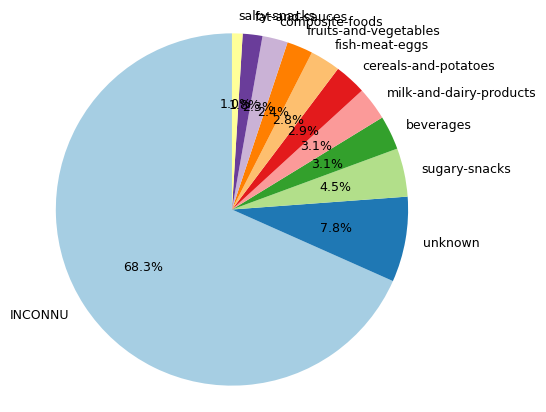

In [33]:
create_pie_chart(df, "pnns_groups_1", figsize=(5, 5), text_fontsize=9)

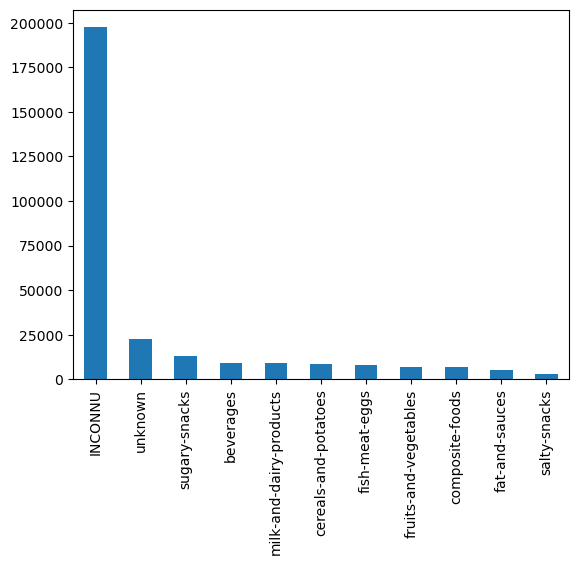

In [34]:
# Diagramme en tuyaux d'orgues pour plus de détails
df["pnns_groups_1"].value_counts(normalize=False).plot(kind='bar')
plt.show()

In [35]:
df['nutrition_grade_fr'].unique()

array(['d', 'b', nan, 'c', 'a', 'e'], dtype=object)

In [36]:
# Remplacer les valeurs NaN par 'INCONNU' dans la colonne 'pnns_groups_1'
df['nutrition_grade_fr'] = df['nutrition_grade_fr'].fillna('INCONNU')
# Afficher le nombre de valeurs nulles par colonne
df.isnull().sum()

code                           23
product_name                 5934
brands                       9702
categories_fr              204656
ingredients_text            40105
additives_n                 40128
nutrition_grade_fr              0
pnns_groups_1                   0
pnns_groups_2              194576
main_category_fr           204701
energy_100g                 27954
fat_100g                    45176
carbohydrates_100g          45479
sugars_100g                 44096
fiber_100g                  88181
proteins_100g               29145
salt_100g                   33557
sodium_100g                 33604
nutrition-score-fr_100g     67857
nutrition-score-uk_100g     67857
dtype: int64

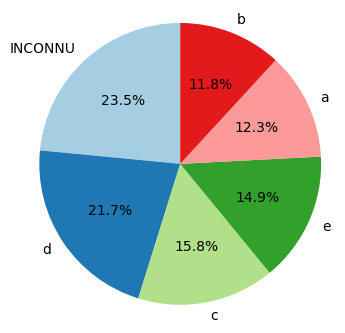

In [37]:
create_pie_chart(df, "nutrition_grade_fr")

In [38]:
# Création d'un tableau croisé pour voir la distribution des rangs selon les catégories
tableau_croise = pd.crosstab(df['pnns_groups_1'], df['nutrition_grade_fr'])
tableau_croise

nutrition_grade_fr       INCONNU      a      b      c      d      e
pnns_groups_1                                                      
INCONNU                    38148  24672  25219  32323  45875  31317
beverages                   3336    258    819   1563    907   2150
cereals-and-potatoes        1656   3437   1049   1350    852    114
composite-foods             1153   1305   1765   1585    869     70
fat-and-sauces              1488     93    243    972   1689    731
fish-meat-eggs              2679    540    737   1444   1580   1061
fruits-and-vegetables       2700   2942    711    491     48      3
milk-and-dairy-products     1964    637   1377   1696   2886    265
salty-snacks                 453     55     85    667   1183    367
sugary-snacks               2863     68    339    872   3715   5007
unknown                    11417   1627   1901   2575   3159   1945

Suppression de colonnes

En manipulant le jeu de données, j'ai pu identifier les colonnes qui ne seront pas utiles pour la suite de l'analyse. Ces colonnes sont : `product_name`, `brands`, `categories_fr`, et `ingredients_text`.

Je choisis de supprimer ces colonnes, car si j'ai un doute sur une ligne et que je décide de faire une recherche, le code me sera plus utile. Par exemple, la colonne `ingredients_text` ne m'apporte aucune information sur le produit lui-même ni sur ses proportions, ce qui la rend inutile pour mon analyse.

Je conserve déjà la colonne `main_Category`, donc `category_fr` n'est pas nécessaire. De plus, j'ai remarqué que dans certains cas, la catégorie est renseignée mais les valeurs du PNNS sont vides, ce qui justifie de garder `main_Category`.

Concernant la colonne `brands`, certaines marques produisent plusieurs types de produits. Dans ces cas, rechercher via la marque peut prendre plus de temps que via le code produit. C'est pourquoi je choisis également de la supprimer.

Enfin, la colonne `product_name` ne me semble pas assez explicite. Par exemple, "Organic Polenta" ne m'aide pas à déterminer le type de produit. Je devrai de toute façon passer par le code pour en savoir plus, d'où la suppression de cette colonne également.

In [39]:
# Supprimer les colonnes spécifiées
df = df.drop(columns=['product_name', 'brands', 'categories_fr', 'ingredients_text'])
df.shape

(289067, 16)

## Detection des valeurs abérrantes par grade de nutriscore

## Identification des valeurs abérrantes évidentes

In [40]:
df.describe()

additives_n   energy_100g       fat_100g  carbohydrates_100g  \
count  248939.000000  2.611130e+05  243891.000000       243588.000000   
mean        1.936024  1.141915e+03      12.730379           32.073981   
std         2.502019  6.447154e+03      17.578747           29.731719   
min         0.000000  0.000000e+00       0.000000            0.000000   
25%         0.000000  3.770000e+02       0.000000            6.000000   
50%         1.000000  1.100000e+03       5.000000           20.600000   
75%         3.000000  1.674000e+03      20.000000           58.330000   
max        31.000000  3.251373e+06     714.290000         2916.670000   

         sugars_100g     fiber_100g  proteins_100g      salt_100g  \
count  244971.000000  200886.000000  259922.000000  255510.000000   
mean       16.003484       2.862111       7.075940       2.028624   
std        22.327284      12.867578       8.409054     128.269454   
min       -17.860000      -6.700000    -800.000000       0.000000   
25%         1.300000       0.000000       0.700000       0.063500   
50%         5.710000       1.500000       4.760000       0.581660   
75%        24.000000       3.600000      10.000000       1.374140   
max      3520.000000    5380.000000     430.000000   64312.800000   

         sodium_100g  nutrition-score-fr_100g  nutrition-score-uk_100g  
count  255463.000000            221210.000000            221210.000000  
mean        0.798815                 9.165535                 9.058049  
std        50.504428                 9.055903                 9.183589  
min         0.000000               -15.000000               -15.000000  
25%         0.025000                 1.000000                 1.000000  
50%         0.229000                10.000000                 9.000000  
75%         0.541000                16.000000                16.000000  
max     25320.000000                40.000000                40.000000

### Rechercher les valeurs possibles que peut prendre le nutriscore ou les autres élements _100g
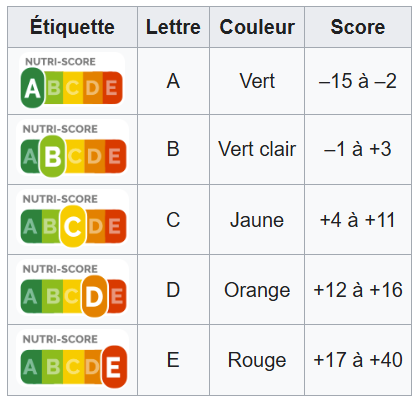

Pour les colonnes exprimées en 100g (à l'exception de l'énergie), toute valeur située en dehors de l'intervalle de 0 à 100 sera considérée comme un outlier. Si les lignes concernées ne sont pas importantes, je les supprime, autrement je les remplace par NAN.

Certaines colonnes necessiteront une analyse plus poussé car leur intervalle de valeur possible serait en dessous des 100 g.

En ce qui concerne l'énergie, il est possible que des erreurs d'unité pour certains éléments aient conduit à des valeurs maximales exceptionnellement élevées.

### Colonne sugars_100g

In [41]:
df[df['sugars_100g'] < 0]

code  additives_n nutrition_grade_fr  \
8582    0011213420608          0.0                  a   
18209   0021130493432          0.0                  b   
117739  0608866999263          1.0                  a   
146284  0789280259062          1.0            INCONNU   
150858  0813922021028          0.0                  c   
164030  0856336001538          0.0                  a   
195761  3161712000928          0.0                  d   

                  pnns_groups_1 pnns_groups_2   main_category_fr  energy_100g  \
8582                    INCONNU           NaN                NaN        151.0   
18209                   INCONNU           NaN                NaN        167.0   
117739                  INCONNU           NaN                NaN        598.0   
146284                  INCONNU           NaN                NaN       1674.0   
150858                  INCONNU           NaN                NaN        326.0   
164030                  INCONNU           NaN                NaN        255.0   
195761  milk-and-dairy-products        Cheese  Fromages de vache       1379.0   

        fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  \
8582        0.00                3.61        -1.20         1.2           2.41   
18209       0.80                7.20        -0.80         0.8           0.80   
117739      3.57               21.43        -3.57         3.6           7.14   
146284     13.33               66.67        -6.67         6.7            NaN   
150858      6.25                5.00        -6.25         1.2           1.25   
164030     21.43               53.57       -17.86        17.9          17.86   
195761     30.00                0.80        -0.10         NaN          15.30   

        salt_100g  sodium_100g  nutrition-score-fr_100g  \
8582      0.38354     0.151000                     -1.0   
18209     0.87376     0.344000                      2.0   
117739    0.95250     0.375000                     -4.0   
146284    2.03200     0.800000                      NaN   
150858    1.19380     0.470000                      4.0   
164030    1.93294     0.761000                     -2.0   
195761    1.40000     0.551181                     15.0   

        nutrition-score-uk_100g  
8582                       -1.0  
18209                       2.0  
117739                     -4.0  
146284                      NaN  
150858                      4.0  
164030                     -2.0  
195761                     20.0

In [42]:
# Convertir en liste, les indices des lignes où 'sugars_100g' est inférieur à 0
indices_list = df[df['sugars_100g'] < 0].index

In [43]:
# Remplacer les valeurs par leurs valeurs absolues pour les indices récupérés
df.loc[indices_list, 'sugars_100g'] = df.loc[indices_list, 'sugars_100g'].abs()
df.describe()

additives_n   energy_100g       fat_100g  carbohydrates_100g  \
count  248939.000000  2.611130e+05  243891.000000       243588.000000   
mean        1.936024  1.141915e+03      12.730379           32.073981   
std         2.502019  6.447154e+03      17.578747           29.731719   
min         0.000000  0.000000e+00       0.000000            0.000000   
25%         0.000000  3.770000e+02       0.000000            6.000000   
50%         1.000000  1.100000e+03       5.000000           20.600000   
75%         3.000000  1.674000e+03      20.000000           58.330000   
max        31.000000  3.251373e+06     714.290000         2916.670000   

         sugars_100g     fiber_100g  proteins_100g      salt_100g  \
count  244971.000000  200886.000000  259922.000000  255510.000000   
mean       16.003781       2.862111       7.075940       2.028624   
std        22.327071      12.867578       8.409054     128.269454   
min         0.000000      -6.700000    -800.000000       0.000000   
25%         1.300000       0.000000       0.700000       0.063500   
50%         5.710000       1.500000       4.760000       0.581660   
75%        24.000000       3.600000      10.000000       1.374140   
max      3520.000000    5380.000000     430.000000   64312.800000   

         sodium_100g  nutrition-score-fr_100g  nutrition-score-uk_100g  
count  255463.000000            221210.000000            221210.000000  
mean        0.798815                 9.165535                 9.058049  
std        50.504428                 9.055903                 9.183589  
min         0.000000               -15.000000               -15.000000  
25%         0.025000                 1.000000                 1.000000  
50%         0.229000                10.000000                 9.000000  
75%         0.541000                16.000000                16.000000  
max     25320.000000                40.000000                40.000000

In [44]:
len(df[df['sugars_100g']>100].index)

12

In [45]:
df= df.drop(df[df['sugars_100g']>100].index)

In [46]:
df.describe()

additives_n   energy_100g       fat_100g  carbohydrates_100g  \
count  248929.000000  2.611020e+05  243881.000000       243577.000000   
mean        1.936090  1.141006e+03      12.730881           32.058989   
std         2.502045  6.431549e+03      17.578931           29.148015   
min         0.000000  0.000000e+00       0.000000            0.000000   
25%         0.000000  3.770000e+02       0.000000            6.000000   
50%         1.000000  1.100000e+03       5.000000           20.600000   
75%         3.000000  1.674000e+03      20.000000           58.330000   
max        31.000000  3.251373e+06     714.290000          209.380000   

         sugars_100g     fiber_100g  proteins_100g      salt_100g  \
count  244959.000000  200879.000000  259913.000000  255501.000000   
mean       15.985141       2.834148       7.074488       2.028115   
std        21.165160       4.619423       8.368113     128.271391   
min         0.000000      -6.700000    -800.000000       0.000000   
25%         1.300000       0.000000       0.700000       0.063500   
50%         5.710000       1.500000       4.760000       0.581660   
75%        24.000000       3.600000      10.000000       1.374140   
max       100.000000     178.000000     100.000000   64312.800000   

         sodium_100g  nutrition-score-fr_100g  nutrition-score-uk_100g  
count  255454.000000            221202.000000            221202.000000  
mean        0.798615                 9.165265                 9.057775  
std        50.505191                 9.055935                 9.183622  
min         0.000000               -15.000000               -15.000000  
25%         0.025000                 1.000000                 1.000000  
50%         0.229000                10.000000                 9.000000  
75%         0.541000                16.000000                16.000000  
max     25320.000000                40.000000                40.000000

### colonne fiber_100g

In [47]:
df[(df['fiber_100g'] < 0) | (df['fiber_100g']>100) ]

code  additives_n nutrition_grade_fr pnns_groups_1  \
23784   0028400231053          0.0            INCONNU       INCONNU   
64352   0052287000419          1.0            INCONNU       INCONNU   
298897  7622210988768          1.0                  e       unknown   

       pnns_groups_2 main_category_fr  energy_100g  fat_100g  \
23784            NaN              NaN       2230.0     33.33   
64352            NaN              NaN        699.0       NaN   
298897       unknown              NaN       2218.0     29.00   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
23784                  0.0          0.0        -6.7            NaN    6.43382   
64352                  NaN          NaN       166.7          11.67   73.02500   
298897                59.0         58.0       178.0           6.30    0.37000   

        sodium_100g  nutrition-score-fr_100g  nutrition-score-uk_100g  
23784      2.533000                      NaN                      NaN  
64352     28.750000                      NaN                      NaN  
298897     0.145669                     22.0                     22.0

In [48]:
df = df.drop(index=df[(df['fiber_100g'] < 0) | (df['fiber_100g']>100) ].index)
df.describe()

additives_n   energy_100g       fat_100g  carbohydrates_100g  \
count  248926.000000  2.610990e+05  243879.000000       243575.000000   
mean        1.936106  1.141000e+03      12.730730           32.059010   
std         2.502056  6.431585e+03      17.578923           29.148011   
min         0.000000  0.000000e+00       0.000000            0.000000   
25%         0.000000  3.770000e+02       0.000000            6.000000   
50%         1.000000  1.100000e+03       5.000000           20.600000   
75%         3.000000  1.674000e+03      20.000000           58.330000   
max        31.000000  3.251373e+06     714.290000          209.380000   

         sugars_100g     fiber_100g  proteins_100g      salt_100g  \
count  244957.000000  200876.000000  259911.000000  255498.000000   
mean       15.985034       2.832508       7.074473       2.027826   
std        21.165052       4.588302       8.368140     128.272067   
min         0.000000       0.000000    -800.000000       0.000000   
25%         1.300000       0.000000       0.700000       0.063500   
50%         5.710000       1.500000       4.760000       0.581660   
75%        24.000000       3.600000      10.000000       1.374140   
max       100.000000     100.000000     100.000000   64312.800000   

         sodium_100g  nutrition-score-fr_100g  nutrition-score-uk_100g  
count  255451.000000            221201.000000            221201.000000  
mean        0.798501                 9.165207                 9.057717  
std        50.505457                 9.055914                 9.183601  
min         0.000000               -15.000000               -15.000000  
25%         0.025000                 1.000000                 1.000000  
50%         0.229000                10.000000                 9.000000  
75%         0.541000                16.000000                16.000000  
max     25320.000000                40.000000                40.000000

### Colonne proteins_100g

In [49]:
df[(df['proteins_100g'] < 0) | (df['proteins_100g']>100) ]

code  additives_n nutrition_grade_fr pnns_groups_1  \
33781   0036800416727          0.0                  d       INCONNU   
115310       04029816          0.0            INCONNU       INCONNU   
169119  0875208001230          0.0            INCONNU       INCONNU   

       pnns_groups_2 main_category_fr  energy_100g  fat_100g  \
33781            NaN              NaN       2389.0     46.43   
115310           NaN              NaN          0.0      0.00   
169119           NaN              NaN          0.0      0.00   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
33781                28.57         3.57         3.6          -3.57    0.99822   
115310                0.00          NaN         NaN        -500.00   25.40000   
169119                0.00         0.00         NaN        -800.00    7.62000   

        sodium_100g  nutrition-score-fr_100g  nutrition-score-uk_100g  
33781         0.393                     14.0                     14.0  
115310       10.000                      NaN                      NaN  
169119        3.000                      NaN                      NaN

In [50]:
df = df.drop(index=df[(df['proteins_100g'] < 0) | (df['proteins_100g']>100) ].index)
df.describe()

additives_n   energy_100g       fat_100g  carbohydrates_100g  \
count  248923.000000  2.610960e+05  243876.000000       243572.000000   
mean        1.936129  1.141004e+03      12.730696           32.059288   
std         2.502062  6.431621e+03      17.578861           29.148045   
min         0.000000  0.000000e+00       0.000000            0.000000   
25%         0.000000  3.770000e+02       0.000000            6.000000   
50%         1.000000  1.100000e+03       5.000000           20.600000   
75%         3.000000  1.674000e+03      20.000000           58.330000   
max        31.000000  3.251373e+06     714.290000          209.380000   

         sugars_100g     fiber_100g  proteins_100g      salt_100g  \
count  244955.000000  200875.000000  259908.000000  255495.000000   
mean       15.985150       2.832504       7.079570       2.027717   
std        21.165099       4.588313       8.156633     128.272811   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.000000       0.700000       0.063500   
50%         5.710000       1.500000       4.760000       0.581660   
75%        24.000000       3.600000      10.000000       1.374140   
max       100.000000     100.000000     100.000000   64312.800000   

         sodium_100g  nutrition-score-fr_100g  nutrition-score-uk_100g  
count  255448.000000            221200.000000            221200.000000  
mean        0.798458                 9.165185                 9.057694  
std        50.505750                 9.055929                 9.183616  
min         0.000000               -15.000000               -15.000000  
25%         0.025000                 1.000000                 1.000000  
50%         0.229000                10.000000                 9.000000  
75%         0.541000                16.000000                16.000000  
max     25320.000000                40.000000                40.000000

### Colonne energy_100g

In [51]:
len(df[df['energy_100g'] > 4000])

153

In [52]:
len(df[df['energy_100g'] > 10000])

18

In [53]:
df = df.drop(index=df[(df['energy_100g'] < 0) | (df['energy_100g']>10000) ].index)
df.describe()

additives_n    energy_100g       fat_100g  carbohydrates_100g  \
count  248910.000000  261078.000000  243858.000000       243556.000000   
mean        1.936126    1125.828945      12.726242           32.059024   
std         2.502074     801.929978      17.505102           29.146561   
min         0.000000       0.000000       0.000000            0.000000   
25%         0.000000     377.000000       0.000000            6.000000   
50%         1.000000    1100.000000       5.000000           20.600000   
75%         3.000000    1674.000000      20.000000           58.330000   
max        31.000000    9983.000000     105.000000          209.380000   

         sugars_100g     fiber_100g  proteins_100g      salt_100g  \
count  244940.000000  200861.000000  259890.000000  255479.000000   
mean       15.985278       2.832569       7.079622       2.027525   
std        21.165314       4.588347       8.156526     128.276799   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.000000       0.700000       0.063500   
50%         5.710000       1.500000       4.760000       0.581660   
75%        24.000000       3.600000      10.000000       1.374140   
max       100.000000     100.000000     100.000000   64312.800000   

         sodium_100g  nutrition-score-fr_100g  nutrition-score-uk_100g  
count  255432.000000            221187.000000            221187.000000  
mean        0.798383                 9.164643                 9.057115  
std        50.507320                 9.055651                 9.183328  
min         0.000000               -15.000000               -15.000000  
25%         0.025000                 1.000000                 1.000000  
50%         0.229000                10.000000                 9.000000  
75%         0.541000                16.000000                16.000000  
max     25320.000000                40.000000                40.000000

In [54]:
def summarize_quantiles(df, groupby_col, numeric_cols):
    """
    Fonction pour calculer les quantiles, la moyenne et d'autres statistiques agrégées pour des colonnes numériques, groupées par une colonne catégorielle.
    
    Parameters:
    - df: DataFrame à analyser.
    - groupby_col: Colonne catégorielle pour le regroupement (par exemple 'nutrition_grade_fr').
    - numeric_cols: Liste des colonnes numériques à analyser (par exemple ['sugars_100g']).
    
    Retourne:
    - DataFrame contenant les statistiques agrégées (25%, 50%, 75%, min, max, mean) par groupe.
    """
    # Calcul des agrégations
    summary = df.groupby(groupby_col)[numeric_cols].agg([
        lambda x: x.quantile(0.25),
        lambda x: x.quantile(0.50),
        lambda x: x.quantile(0.75),
        'min',
        'max',
        'mean'
    ])
    
    # Renommer les colonnes pour une meilleure lisibilité
    summary = summary.rename(columns={
        '<lambda_0>': '25%',
        '<lambda_1>': '50%',
        '<lambda_2>': '75%'    })
    
    return summary


In [55]:
summarize_quantiles(df, 'pnns_groups_1',['energy_100g'])

energy_100g                                           
                                25%     50%     75%   min     max         mean
pnns_groups_1                                                                 
INCONNU                    372.0000  1134.0  1674.0   0.0  9623.0  1135.331407
beverages                  119.0000   184.0   218.0   0.0  5904.0   268.170786
cereals-and-potatoes      1123.5000  1492.0  1610.0   0.0  9050.0  1357.802162
composite-foods            442.5000   638.0   916.0  30.0  3054.0   689.733851
fat-and-sauces             439.5000  1210.0  2982.0   0.0  3883.0  1614.547297
fish-meat-eggs             506.0000   790.5  1079.0   0.0  4485.0   864.816660
fruits-and-vegetables      119.0000   219.0   354.0   0.0  4117.0   397.812912
milk-and-dairy-products    369.0000   676.0  1243.0   0.0  7029.0   816.166016
salty-snacks              1983.0000  2164.0  2320.0   0.0  3707.0  2118.459681
sugary-snacks             1532.0000  1924.0  2190.0   0.0  9983.0  1811.182901
unknown                    499.3625  1090.0  1643.0   0.0  7339.0  1131.954928

In [56]:
import numpy as np

# Remplacer les valeurs supérieures à 4000 par NaN
df.loc[df['energy_100g'] > 4000, 'energy_100g'] = np.nan
df.describe()

additives_n    energy_100g       fat_100g  carbohydrates_100g  \
count  248910.000000  260943.000000  243858.000000       243556.000000   
mean        1.936126    1123.659022      12.726242           32.059024   
std         2.502074     795.932060      17.505102           29.146561   
min         0.000000       0.000000       0.000000            0.000000   
25%         0.000000     377.000000       0.000000            6.000000   
50%         1.000000    1100.000000       5.000000           20.600000   
75%         3.000000    1674.000000      20.000000           58.330000   
max        31.000000    4000.000000     105.000000          209.380000   

         sugars_100g     fiber_100g  proteins_100g      salt_100g  \
count  244940.000000  200861.000000  259890.000000  255479.000000   
mean       15.985278       2.832569       7.079622       2.027525   
std        21.165314       4.588347       8.156526     128.276799   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.000000       0.700000       0.063500   
50%         5.710000       1.500000       4.760000       0.581660   
75%        24.000000       3.600000      10.000000       1.374140   
max       100.000000     100.000000     100.000000   64312.800000   

         sodium_100g  nutrition-score-fr_100g  nutrition-score-uk_100g  
count  255432.000000            221187.000000            221187.000000  
mean        0.798383                 9.164643                 9.057115  
std        50.507320                 9.055651                 9.183328  
min         0.000000               -15.000000               -15.000000  
25%         0.025000                 1.000000                 1.000000  
50%         0.229000                10.000000                 9.000000  
75%         0.541000                16.000000                16.000000  
max     25320.000000                40.000000                40.000000

### Colonne sodium_100g

In [57]:
df[df['sodium_100g'] > 1000 ]

code  additives_n nutrition_grade_fr pnns_groups_1  \
135064  0724195001191          1.0            INCONNU       INCONNU   
139595  0743724349702          0.0                  d       INCONNU   
145844  0786754430200          2.0                  e       INCONNU   

       pnns_groups_2 main_category_fr  energy_100g  fat_100g  \
135064           NaN              NaN        837.0       0.0   
139595           NaN              NaN        280.0       0.0   
145844           NaN              NaN       1218.0       0.0   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
135064                0.00          NaN         NaN            0.0     3556.0   
139595               13.33         6.67         0.0            0.0     3048.0   
145844               72.15        53.16         NaN            0.0    64312.8   

        sodium_100g  nutrition-score-fr_100g  nutrition-score-uk_100g  
135064       1400.0                      NaN                      NaN  
139595       1200.0                     11.0                     11.0  
145844      25320.0                     23.0                     23.0

In [58]:
len(df[df['sodium_100g'] > 100 ])

34

In [59]:
# Filtrer les indices où sodium_100g est supérieur à 5000 mg
indices = df[df['sodium_100g'] > 100].index

# Remplacer les valeurs de sodium_100g par leur valeur en grammes
df.loc[indices, 'sodium_100g'] = df.loc[indices, 'sodium_100g'] / 1000

In [60]:
df.describe()

additives_n    energy_100g       fat_100g  carbohydrates_100g  \
count  248910.000000  260943.000000  243858.000000       243556.000000   
mean        1.936126    1123.659022      12.726242           32.059024   
std         2.502074     795.932060      17.505102           29.146561   
min         0.000000       0.000000       0.000000            0.000000   
25%         0.000000     377.000000       0.000000            6.000000   
50%         1.000000    1100.000000       5.000000           20.600000   
75%         3.000000    1674.000000      20.000000           58.330000   
max        31.000000    4000.000000     105.000000          209.380000   

         sugars_100g     fiber_100g  proteins_100g      salt_100g  \
count  244940.000000  200861.000000  259890.000000  255479.000000   
mean       15.985278       2.832569       7.079622       2.027525   
std        21.165314       4.588347       8.156526     128.276799   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.000000       0.700000       0.063500   
50%         5.710000       1.500000       4.760000       0.581660   
75%        24.000000       3.600000      10.000000       1.374140   
max       100.000000     100.000000     100.000000   64312.800000   

         sodium_100g  nutrition-score-fr_100g  nutrition-score-uk_100g  
count  255432.000000            221187.000000            221187.000000  
mean        0.646759                 9.164643                 9.057115  
std         2.653482                 9.055651                 9.183328  
min         0.000000               -15.000000               -15.000000  
25%         0.025000                 1.000000                 1.000000  
50%         0.229000                10.000000                 9.000000  
75%         0.541000                16.000000                16.000000  
max       100.000000                40.000000                40.000000

### Colonne fat, carbohydrates, salts

In [61]:
len(df[df['fat_100g'] > 100 ])

2

In [62]:
len(df[df['carbohydrates_100g'] > 100 ])

7

In [63]:
len(df[df['salt_100g'] > 100 ])

157

In [64]:
df = df.drop(index=df[(df['carbohydrates_100g'] > 100) | (df['fat_100g']>100) ].index)


# Remplacer les valeurs supérieures à 100 par NaN
df.loc[df['salt_100g'] > 100, 'salt_100g'] = np.nan
df.describe()

additives_n    energy_100g       fat_100g  carbohydrates_100g  \
count  248905.000000  260934.000000  243851.000000       243547.000000   
mean        1.936124    1123.626309      12.725550           32.055982   
std         2.502061     795.902761      17.503186           29.140869   
min         0.000000       0.000000       0.000000            0.000000   
25%         0.000000     377.000000       0.000000            6.000000   
50%         1.000000    1100.000000       5.000000           20.600000   
75%         3.000000    1674.000000      20.000000           58.330000   
max        31.000000    4000.000000     100.000000          100.000000   

         sugars_100g     fiber_100g  proteins_100g      salt_100g  \
count  244932.000000  200858.000000  259882.000000  255315.000000   
mean       15.984275       2.832581       7.079711       1.587946   
std        21.164261       4.588377       8.156596       6.240578   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.000000       0.700000       0.063500   
50%         5.710000       1.500000       4.760000       0.580000   
75%        24.000000       3.600000      10.000000       1.371600   
max       100.000000     100.000000     100.000000     100.000000   

         sodium_100g  nutrition-score-fr_100g  nutrition-score-uk_100g  
count  255425.000000            221181.000000            221181.000000  
mean        0.646772                 9.164508                 9.056935  
std         2.653517                 9.055550                 9.183202  
min         0.000000               -15.000000               -15.000000  
25%         0.025000                 1.000000                 1.000000  
50%         0.229000                10.000000                 9.000000  
75%         0.541000                16.000000                16.000000  
max       100.000000                40.000000                40.000000

## Identification des valeurs abérrantes non évidentes

In [65]:
import seaborn as sns

def plot_boxplots(df, x, y, palette, title):
    """
    Fonction pour créer un boxplot avec des données groupées par une colonne catégorielle.
    
    Parameters:
    - df: DataFrame contenant les données.
    - x: Le nom de la colonne catégorielle pour l'axe X (par exemple 'nutrition_grade_fr').
    - y: Le nom de la colonne numérique à afficher sur l'axe Y (par exemple 'nutrition-score-fr_100g').
    - palette: La palette de couleurs à utiliser.
    - title: Le titre du graphique.
    """
    # Créer le boxplot avec la colonne 'x' et une coloration par 'x'
    plt.figure(figsize=(12, 6))  # Ajuster la taille de la figure si nécessaire
    sns.boxplot(x=x, y=y, data=df, palette=palette)

    # Ajouter un titre et ajuster l'affichage
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha='right')  # Faire pivoter les étiquettes des catégories pour une meilleure lisibilité
    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)

    # Afficher le graphique
    plt.show()

In [66]:
df.describe()

additives_n    energy_100g       fat_100g  carbohydrates_100g  \
count  248905.000000  260934.000000  243851.000000       243547.000000   
mean        1.936124    1123.626309      12.725550           32.055982   
std         2.502061     795.902761      17.503186           29.140869   
min         0.000000       0.000000       0.000000            0.000000   
25%         0.000000     377.000000       0.000000            6.000000   
50%         1.000000    1100.000000       5.000000           20.600000   
75%         3.000000    1674.000000      20.000000           58.330000   
max        31.000000    4000.000000     100.000000          100.000000   

         sugars_100g     fiber_100g  proteins_100g      salt_100g  \
count  244932.000000  200858.000000  259882.000000  255315.000000   
mean       15.984275       2.832581       7.079711       1.587946   
std        21.164261       4.588377       8.156596       6.240578   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.000000       0.700000       0.063500   
50%         5.710000       1.500000       4.760000       0.580000   
75%        24.000000       3.600000      10.000000       1.371600   
max       100.000000     100.000000     100.000000     100.000000   

         sodium_100g  nutrition-score-fr_100g  nutrition-score-uk_100g  
count  255425.000000            221181.000000            221181.000000  
mean        0.646772                 9.164508                 9.056935  
std         2.653517                 9.055550                 9.183202  
min         0.000000               -15.000000               -15.000000  
25%         0.025000                 1.000000                 1.000000  
50%         0.229000                10.000000                 9.000000  
75%         0.541000                16.000000                16.000000  
max       100.000000                40.000000                40.000000

### Colonne fat_100g

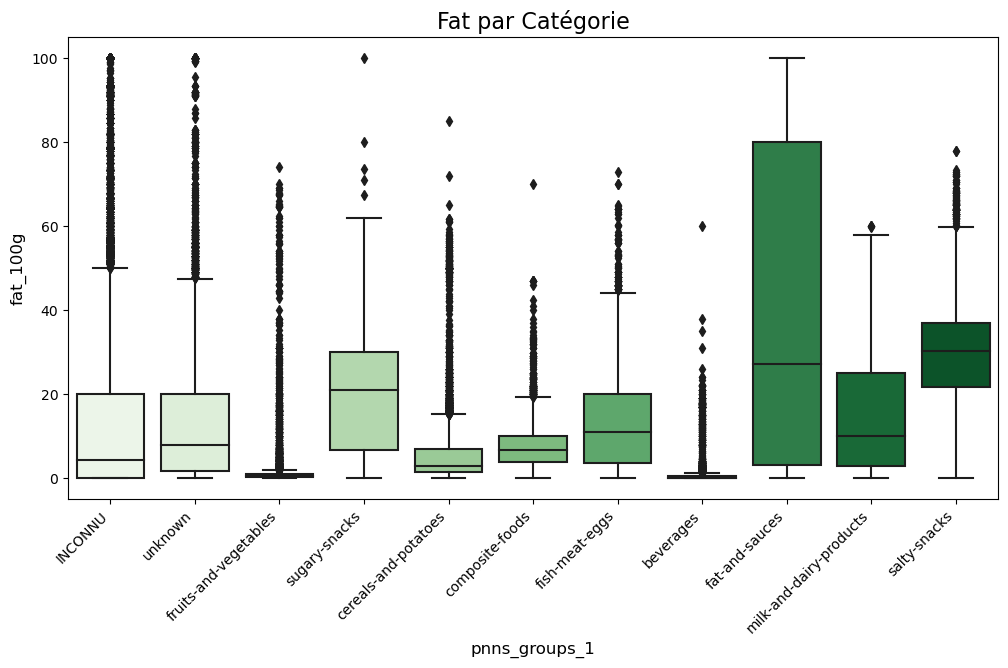

In [67]:
plot_boxplots(df, 'pnns_groups_1', 'fat_100g', 'Greens', 'Fat par Catégorie')

Un produit contenant 100 g de graisses pour 100 g de produit est théoriquement possible. Cependant, certaines catégories de produits contiennent généralement moins de graisses que d'autres.

Voici les valeurs maximales de graisses autorisées pour chaque catégorie. Si la quantité de graisses est proche de zéro ou trop faible, je remplace ces valeurs par des limites réalistes basées sur les produits les plus représentatifs de chaque catégorie.

- **fruits-and-vegetables** : 60 g  
  Bien que la plupart des fruits et légumes contiennent peu de graisses, certains fruits, comme l'avocat, ou des produits comme les noix et les olives, peuvent contenir des quantités relativement élevées de graisses (notamment des graisses saines).

- **sugary-snacks** : 60 g  
  Certains snacks sucrés, tels que les barres chocolatées, biscuits ou bonbons contenant du beurre ou des huiles, peuvent contenir une quantité significative de graisses, généralement ajoutées lors de leur fabrication.

- **cereals-and-potatoes** : 20 g  
  Certaines céréales transformées ou produits à base de pommes de terre frites peuvent contenir des quantités notables de graisses, particulièrement lorsqu'ils sont enrichis en huiles ou en graisses saturées.

- **composite-foods** : 40 g  
  Les plats composés, tels que ceux à base de sauces crémeuses, de viandes grasses ou de fromages, peuvent contenir jusqu'à 40 g de graisses, surtout dans les plats préparés ou ceux riches en matières grasses.

- **fish-meat-eggs** : 50 g  
  Les viandes grasses, comme le bacon ou certaines parties du porc, ainsi que les poissons gras tels que le saumon ou le maquereau, peuvent atteindre jusqu'à 50 g de graisses pour 100 g de produit.

- **beverages** : 5 g  
  Les boissons telles que les milkshakes, les boissons à base de lait entier ou enrichies en noix (comme celles à base d'amandes ou de noisettes) peuvent contenir jusqu'à 5 g de graisses, principalement provenant du lait ou des noix.

- **fat-and-sauces** : 100 g  
  Les huiles, le beurre, la crème et certaines sauces grasses sont des produits constitués presque exclusivement de graisses. Ils peuvent donc atteindre des concentrations très élevées, allant jusqu'à 100 g de graisses pour 100 g de produit.

- **milk-and-dairy-products** : 60 g  
  Les produits laitiers riches en matières grasses, comme le beurre, les fromages à pâte dure (par exemple, le parmesan ou le cheddar) ou la crème, peuvent contenir jusqu'à 60 g de graisses.

- **salty-snacks** : 60 g  
  Les snacks salés, tels que les chips, crackers ou snacks frits, peuvent contenir des quantités importantes de graisses, surtout lorsqu'ils sont préparés avec des huiles végétales ou frits dans des graisses.

Je remplace les valeurs extrêmes par des limites réalistes, en me basant sur les produits les plus représentatifs de chaque catégorie, afin de fournir des estimations cohérentes et précises des graisses par catégorie.

In [68]:
max_fat_values = {
    'fruits-and-vegetables': 60,
    'sugary-snacks': 60,
    'cereals-and-potatoes': 20,
    'composite-foods': 40,
    'fish-meat-eggs': 50,
    'beverages': 5,
    'fat-and-sauces': 100,
    'milk-and-dairy-products': 60,
    'salty-snacks': 60
}

In [69]:
def replace_outliers_by_nan(df, max_values, target_column, category_column):
    """
    Remplace les valeurs d'une colonne par les maximums autorisés en fonction des catégories.

    Args:
        df (pd.DataFrame): Le DataFrame contenant les données.
        max_values (dict): Dictionnaire avec les catégories comme clés et les valeurs maximales comme valeurs.
        target_column (str): Le nom de la colonne dont les valeurs doivent être modifiées.
        category_column (str): Le nom de la colonne contenant les catégories.

    Returns:
        pd.DataFrame: Le DataFrame avec les valeurs mises à jour.
    """
    for category, max_value in max_values.items():
        # Appliquer la valeur maximale aux lignes correspondant à la catégorie
        df.loc[df[(df[target_column] > max_values[category]) & (df[category_column] == category)].index, target_column] = np.nan
    
    return df

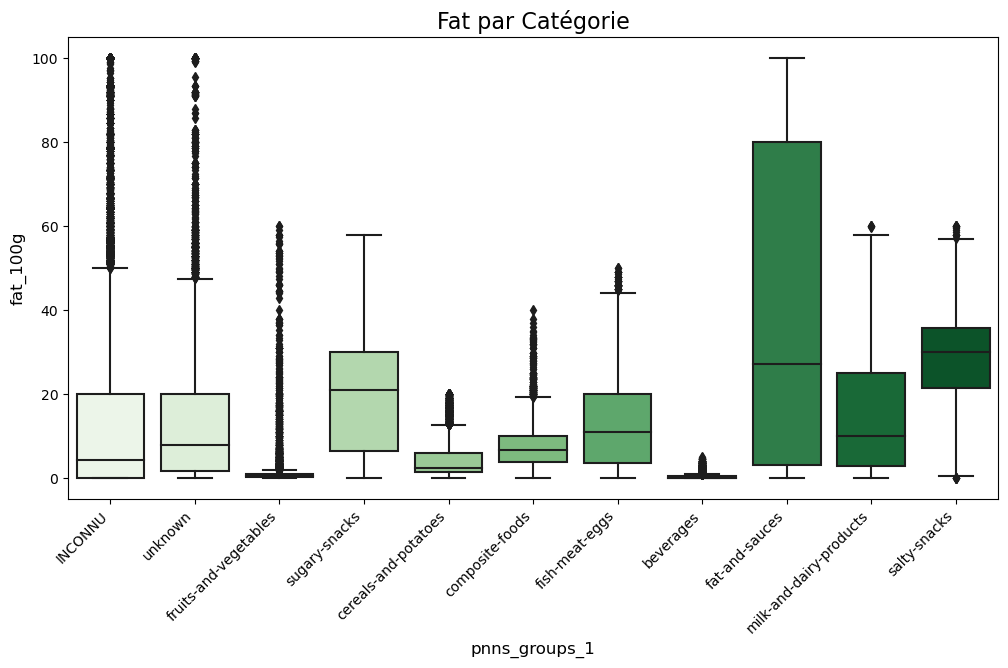

In [70]:
# Appliquer la fonction
df = replace_outliers_by_nan(df, max_fat_values, 'fat_100g', 'pnns_groups_1')
plot_boxplots(df, 'pnns_groups_1', 'fat_100g', 'Greens', 'Fat par Catégorie')

### Colonne fiber_100g

In [71]:
def replace_outliers_by_max(df, max_values, target_column, category_column):
    """
    Remplace les valeurs d'une colonne par les maximums autorisés en fonction des catégories.

    Args:
        df (pd.DataFrame): Le DataFrame contenant les données.
        max_values (dict): Dictionnaire avec les catégories comme clés et les valeurs maximales comme valeurs.
        target_column (str): Le nom de la colonne dont les valeurs doivent être modifiées.
        category_column (str): Le nom de la colonne contenant les catégories.

    Returns:
        pd.DataFrame: Le DataFrame avec les valeurs mises à jour.
    """
    for category, max_value in max_values.items():
        # Ignorer les catégories "INCONNU" et "UNKNOWN"
        if category not in ["INCONNU", "UNKNOWN"]:
            # Appliquer la valeur maximale aux lignes correspondant à la catégorie
            df.loc[df[(df[target_column] > max_values[category]) & (df[category_column] == category)].index, target_column] = max_values[category]
    
    return df

In [72]:
# Dictionnaire des valeurs maximales autorisées
max_fiber_values = {
    'fruits-and-vegetables': 10,
    'sugary-snacks': 5,
    'cereals-and-potatoes': 15,
    'composite-foods': 8,
    'fish-meat-eggs': 0,
    'beverages': 1,
    'fat-and-sauces': 1,
    'milk-and-dairy-products': 1,
    'salty-snacks': 10,
    'INCONNU': 80,
    'unknown': 80
}

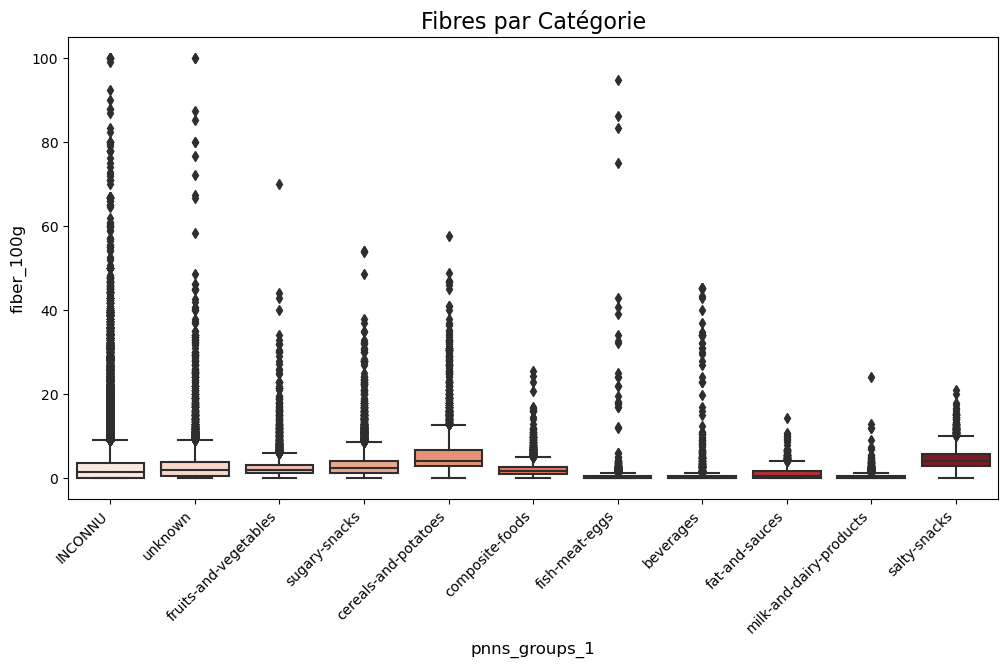

In [73]:
plot_boxplots(df, 'pnns_groups_1', 'fiber_100g', 'Reds', 'Fibres par Catégorie')

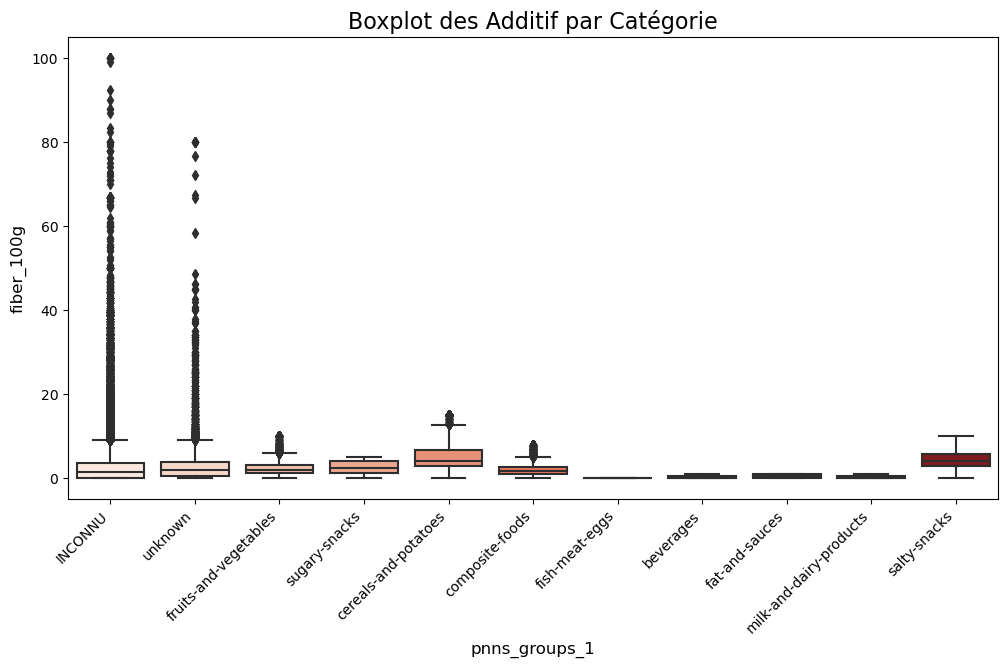

In [74]:
# Appliquer la fonction
df = replace_outliers_by_max(df, max_fiber_values, 'fiber_100g', 'pnns_groups_1')
plot_boxplots(df, 'pnns_groups_1', 'fiber_100g', 'Reds', 'Boxplot des Additif par Catégorie')

### Colonne proteins_100g

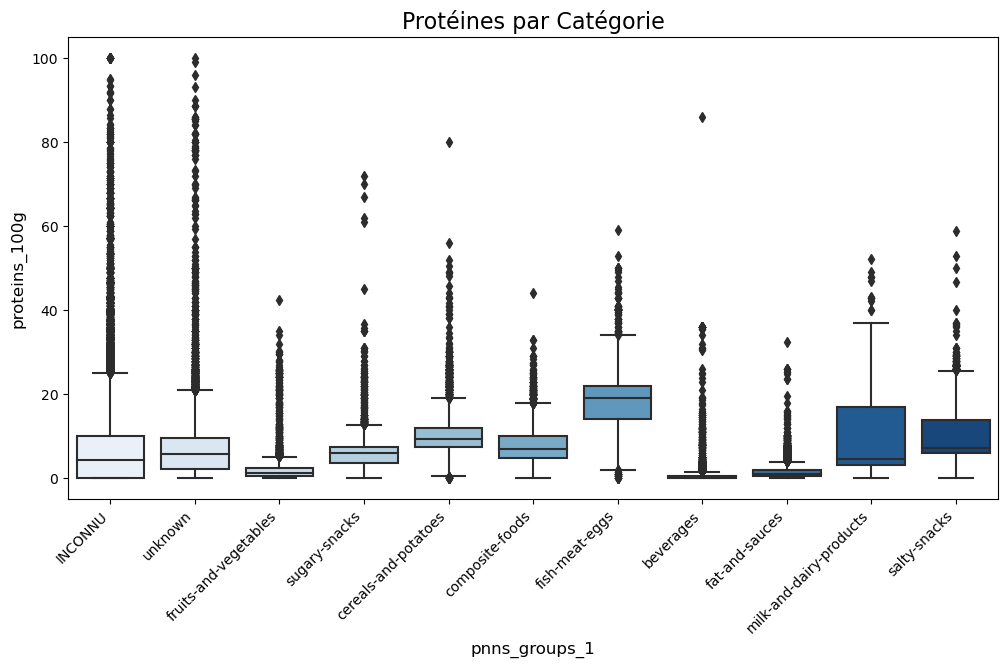

In [75]:
plot_boxplots(df, 'pnns_groups_1', 'proteins_100g', 'Blues', 'Protéines par Catégorie')

Un produit contenant 100 g de protéines pour 100 g de produit est irréaliste, car cela signifierait qu'il serait composé uniquement de protéines. Cependant, chaque catégorie peut avoir un maximum de protéines en fonction de la nature des produits.

Voici les maximums de protéines possibles par catégorie :

- **fruits-and-vegetables** : 8 g  
  Les fruits et légumes contiennent peu de protéines

- **sugary-snacks** : 10 g  
  Les snacks sucrés peuvent contenir des protéines, souvent grâce à des ingrédients comme les noix ou les graines.

- **cereals-and-potatoes** : 15 g  
  Les céréales et pommes de terre apportent des protéines, surtout dans les versions complètes ou enrichies.

- **composite-foods** : 20 g  
  Les plats composés, avec viande ou produits laitiers, peuvent atteindre des niveaux plus élevés de protéines.

- **fish-meat-eggs** : 35 g  
  Les viandes, poissons et œufs sont des sources riches en protéines, avec des concentrations élevées.

- **beverages** : 10 g  
  Certaines boissons, comme les smoothies ou les shakes protéinés, peuvent être enrichies en protéines.

- **fat-and-sauces** : 1 g  
  Les graisses et sauces ne contiennent presque pas de protéines

- **milk-and-dairy-products** : 40 g  
  Les produits laitiers, notamment les fromages et le lait, sont riches en protéines, surtout dans les produits concentrés.

- **salty-snacks** : 20 g  
  Les snacks salés comme les barres de protéines ou les mélanges de noix peuvent contenir des protéines significatives.


In [76]:
max_protein_values = {
    'fruits-and-vegetables': 8,
    'sugary-snacks': 10,
    'cereals-and-potatoes': 15,
    'composite-foods': 20,
    'fish-meat-eggs': 35,
    'beverages': 10,
    'fat-and-sauces': 1,
    'milk-and-dairy-products': 40,
    'salty-snacks': 20
}

df['proteins_100g'].isnull().sum()

29140

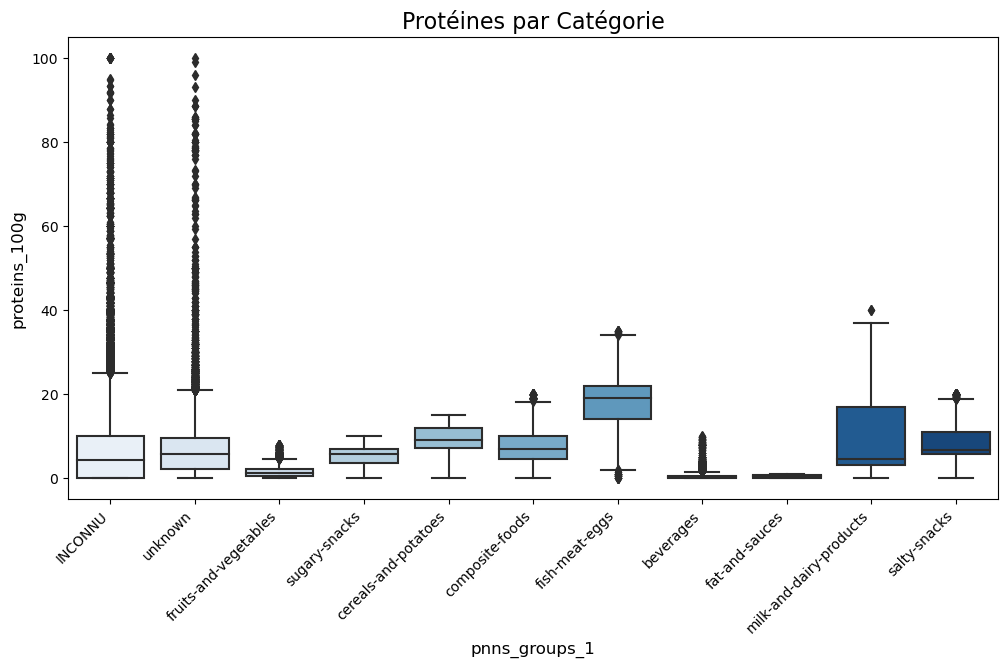

32861

In [77]:
# Appliquer la fonction
df = replace_outliers_by_nan(df, max_protein_values, 'proteins_100g', 'pnns_groups_1')
plot_boxplots(df, 'pnns_groups_1', 'proteins_100g', 'Blues', 'Protéines par Catégorie')
df['proteins_100g'].isnull().sum()

### Colonne salt_100g

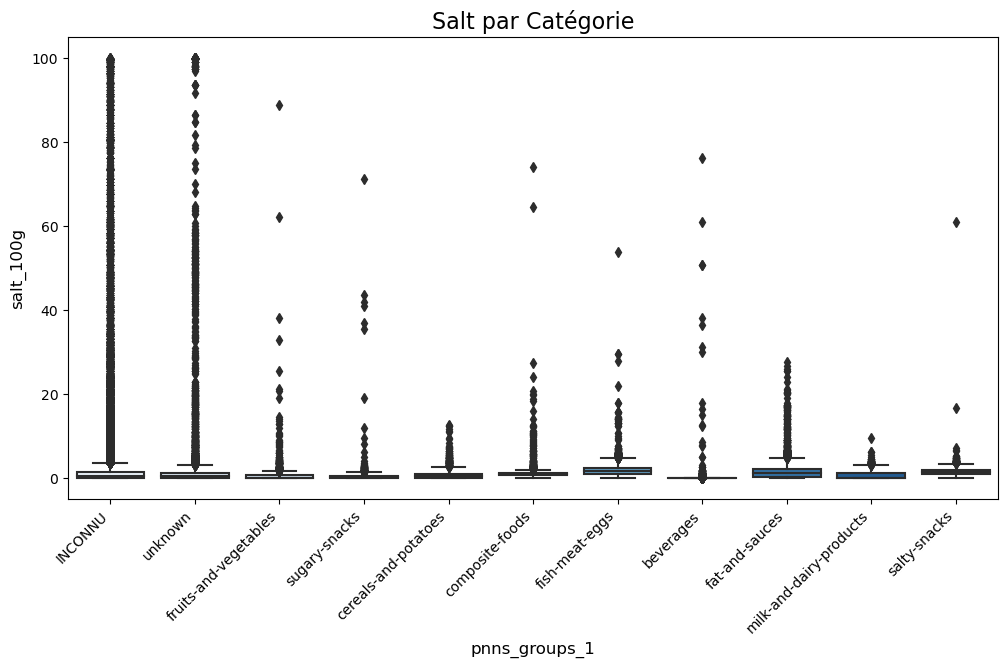

In [78]:
plot_boxplots(df, 'pnns_groups_1', 'salt_100g', 'Blues', 'Salt par Catégorie')

Les quantités de sel maximales pour chaque catégorie sont basées sur la composition typique des produits dans chaque groupe alimentaire. Certaines catégories contiennent naturellement peu de sel, tandis que d'autres en contiennent davantage en raison des procédés de transformation ou des ajouts pour le goût ou la conservation.

Voici les maximums de sel possibles pour chaque catégorie :

- **fruits-and-vegetables** : 0.5 g  
  Les fruits et légumes frais contiennent naturellement très peu de sel. Cependant, certains légumes en conserve ou produits transformés peuvent en contenir davantage.

- **sugary-snacks** : 0.5 g  
  Les snacks sucrés tels que les bonbons, biscuits ou barres énergétiques contiennent généralement peu de sel, sauf si des ingrédients comme des noix ou du chocolat salé y sont ajoutés.

- **cereals-and-potatoes** : 3 g  
  Certaines céréales transformées, comme celles destinées au petit déjeuner, ou les produits à base de pommes de terre (chips, frites) peuvent contenir des quantités modérées de sel, en particulier lorsqu'ils sont salés pour le goût ou la conservation.

- **composite-foods** : 5 g  
  Les plats composés, tels que les soupes en conserve, plats préparés ou sauces, contiennent souvent des ajouts importants de sel pour améliorer le goût et prolonger la durée de conservation.

- **fish-meat-eggs** : 2 g  
  Les viandes transformées (jambon, saucisses) et les poissons salés peuvent contenir des quantités significatives de sel en raison des méthodes de préparation et de conservation.

- **beverages** : 0.5 g  
  En général, les boissons contiennent peu de sel, à l'exception de certaines boissons comme les bouillons ou certaines eaux minérales qui peuvent en contenir naturellement.

- **fat-and-sauces** : 8 g  
  Les produits gras comme le beurre et les huiles ont une faible teneur en sel. Cependant, certaines sauces comme le ketchup, la sauce soja ou la mayonnaise peuvent contenir des niveaux élevés de sel ajouté.

- **milk-and-dairy-products** : 1.5 g  
  Les produits laitiers peuvent contenir du sel, surtout les fromages affinés ou transformés (comme le fromage cheddar, feta ou parmesan). Les produits laitiers comme le lait ou le yaourt contiennent généralement peu de sel.

- **salty-snacks** : 5 g  
  Les snacks salés, tels que les chips, les bretzels et les crackers, contiennent souvent des quantités élevées de sel ajouté pour améliorer le goût et augmenter la durée de conservation.

Ces limites sont des estimations basées sur des produits courants dans chaque catégorie et peuvent varier en fonction des marques et des méthodes de préparation.


In [79]:
max_salt_values = {
    'fruits-and-vegetables': 0.5,
    'sugary-snacks': 0.5,
    'cereals-and-potatoes': 3,
    'composite-foods': 5,
    'fish-meat-eggs': 2,
    'beverages': 0.5,
    'fat-and-sauces': 8,
    'milk-and-dairy-products': 1.5,
    'salty-snacks': 5
}

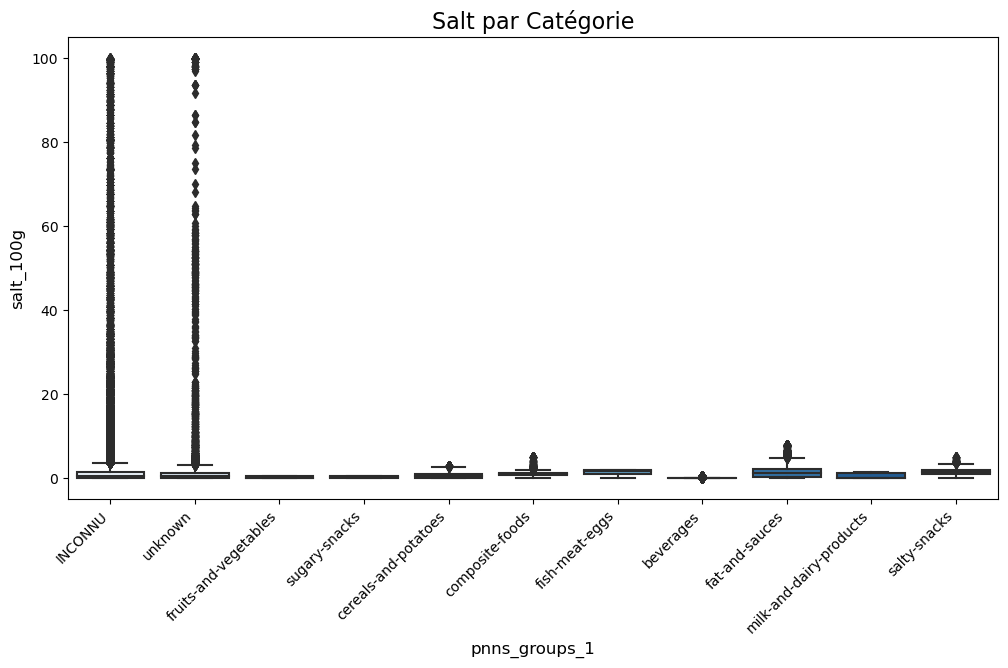

In [80]:
# Appliquer la fonction
df = replace_outliers_by_max(df, max_salt_values, 'salt_100g', 'pnns_groups_1')
plot_boxplots(df, 'pnns_groups_1', 'salt_100g', 'Blues', 'Salt par Catégorie')

### Colonne sodium_100g

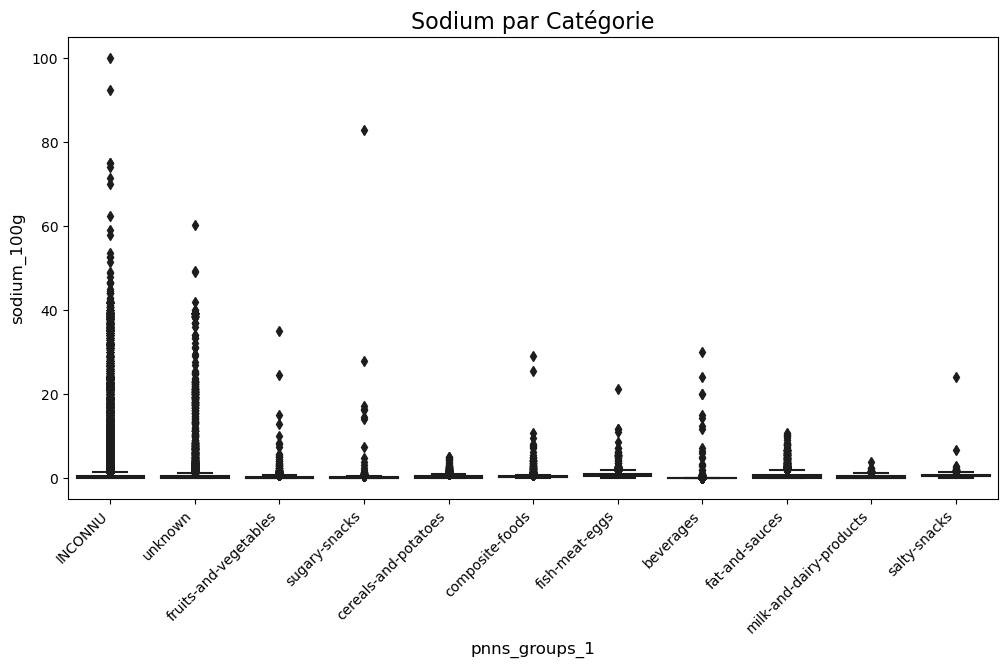

In [81]:
plot_boxplots(df, 'pnns_groups_1', 'sodium_100g', 'Greens', 'Sodium par Catégorie')

Les quantités maximales de sodium pour chaque catégorie sont basées sur les compositions typiques des produits. Le sodium est souvent ajouté pour améliorer la conservation, rehausser le goût, ou est naturellement présent dans certains aliments. 
Voici les valeurs maximales de sodium par categorie

- **fruits-and-vegetables** : 1 g  
  Les fruits et légumes ne contiennent presque pas de sodium à l'état naturel. Cependant, des produits comme les légumes en conserve ou marinés peuvent inclure des quantités légères de sodium pour la conservation.

- **sugary-snacks** : 1 g  
  Les snacks sucrés, tels que les bonbons ou barres chocolatées, ont rarement du sodium significatif, sauf lorsqu’ils incluent des ingrédients comme des arachides salées ou du caramel salé.

- **cereals-and-potatoes** : 1 g  
  Certaines céréales, notamment celles transformées pour le petit-déjeuner, ou des produits à base de pommes de terre comme les chips, contiennent souvent du sodium ajouté pour le goût et la conservation.

- **composite-foods** : 3 g  
  Les plats composés, comme les pizzas, soupes, ou plats préparés, incluent souvent plusieurs ingrédients riches en sodium (fromages, sauces, conservateurs), expliquant cette valeur plus élevée.

- **fish-meat-eggs** : 2 g  
  Les produits comme le jambon, le saumon fumé ou les saucisses, ainsi que les œufs marinés, contiennent fréquemment du sodium ajouté pour la préparation ou la conservation.

- **beverages** : 1 g  
  La plupart des boissons contiennent peu de sodium, sauf exceptions comme les bouillons liquides, certaines eaux gazeuses riches en minéraux, ou des boissons enrichies.

- **fat-and-sauces** : 5 g  
  Les sauces telles que le ketchup, la mayonnaise ou la sauce soja sont souvent riches en sodium, utilisé pour le goût et comme agent de conservation.

- **milk-and-dairy-products** : 1 g  
  Les produits laitiers, comme le lait et le yaourt, sont généralement faibles en sodium, mais les fromages affinés ou transformés (comme le parmesan ou la feta) peuvent contenir davantage de sodium.

- **salty-snacks** : 2.5 g  
  Chips, bretzels et crackers sont souvent très riches en sodium, utilisé à la fois pour leur goût et pour prolonger leur durée de conservation.

Ces valeurs reflètent des moyennes observées pour des produits courants dans chaque catégorie, tout en tenant compte des ajouts potentiels de sel ou de conservateurs. 

In [82]:
max_sodium_values = {
    'fruits-and-vegetables': 1,
    'sugary-snacks': 2,
    'cereals-and-potatoes': 1,
    'composite-foods': 3,
    'fish-meat-eggs': 2,
    'beverages': 1,
    'fat-and-sauces': 5,
    'milk-and-dairy-products': 1,
    'salty-snacks': 3
}

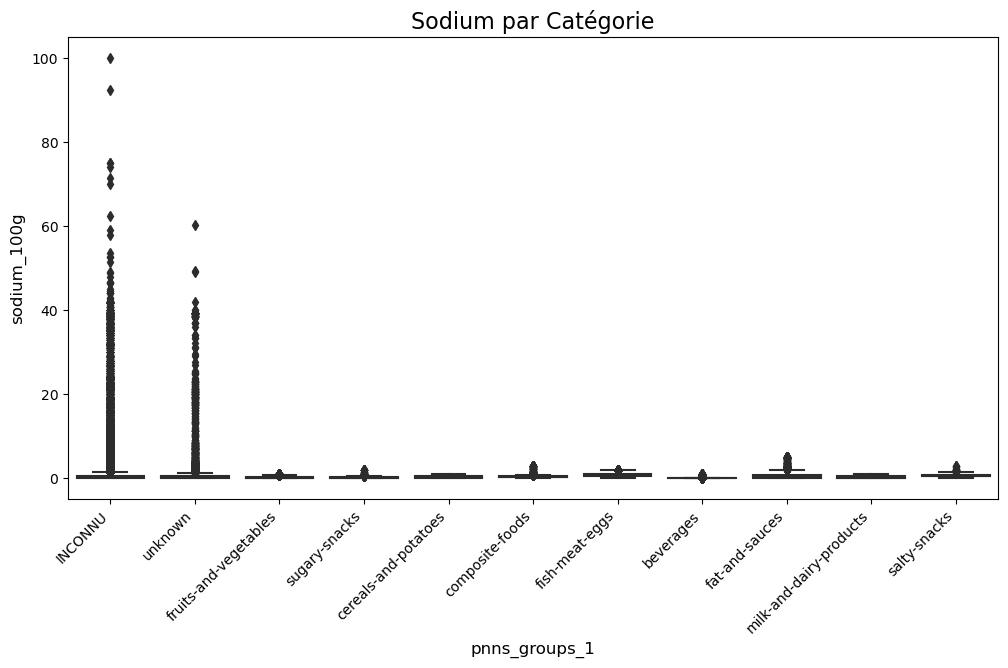

In [83]:
# Appliquer la fonction
df = replace_outliers_by_max(df, max_sodium_values, 'sodium_100g', 'pnns_groups_1')
plot_boxplots(df, 'pnns_groups_1', 'sodium_100g', 'Blues', 'Sodium par Catégorie')

### Colonne sugars_100g

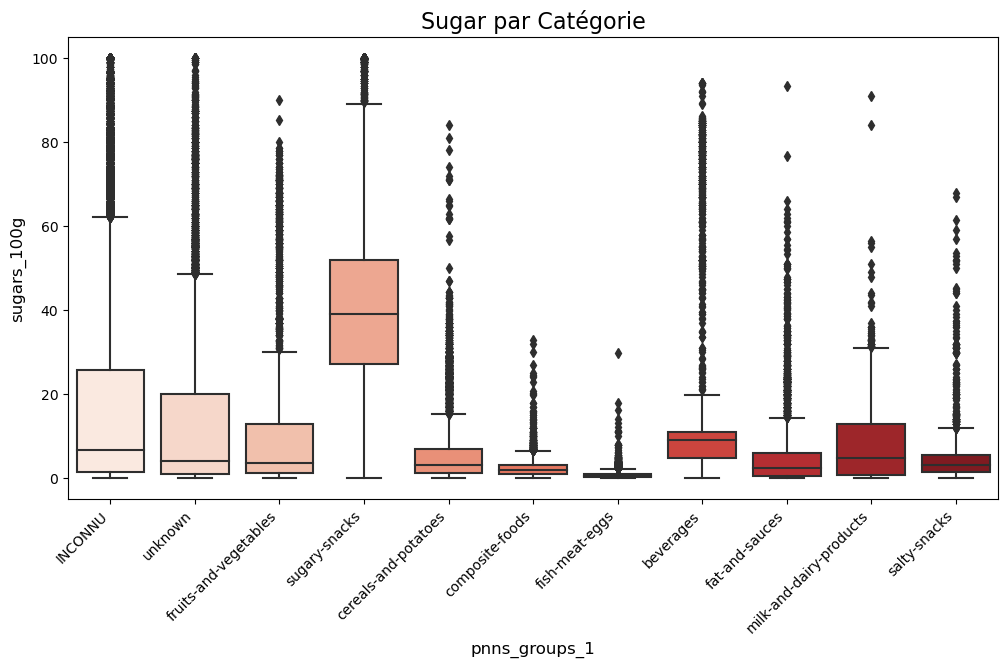

In [84]:
plot_boxplots(df, 'pnns_groups_1', 'sugars_100g', 'Reds', 'Sugar par Catégorie')

Valeurs Maximales de Sucre par Catégorie (pour 100 g)

Voici les valeurs maximales de sucre estimées pour chaque catégorie alimentaire, exprimées en grammes :

| **Catégorie**             | **Sucre Maximal (g)** |
|---------------------------|-----------------------|
| Fruits et légumes         | 40 g                 |
| Snacks sucrés             | 85 g                 |
| Céréales et pommes de terre | 30 g               |
| Aliments composites       | 20 g                 |
| Poissons, viandes et œufs | 3 g                  |
| Boissons                  | 60 g                 |
| Matières grasses et sauces | 30 g                |
| Produits laitiers         | 40 g                 |
| Snacks salés              | 10 g                 |



In [85]:
max_sugar_values = {
    "fruits-and-vegetables": 40, 
    "sugary-snacks": 85,  
    "cereals-and-potatoes": 30, 
    "composite-foods": 20, 
    "fish-meat-eggs": 3, 
    "beverages": 60,
    "fat-and-sauces": 30,
    "milk-and-dairy-products": 40, 
    "salty-snacks": 10
}

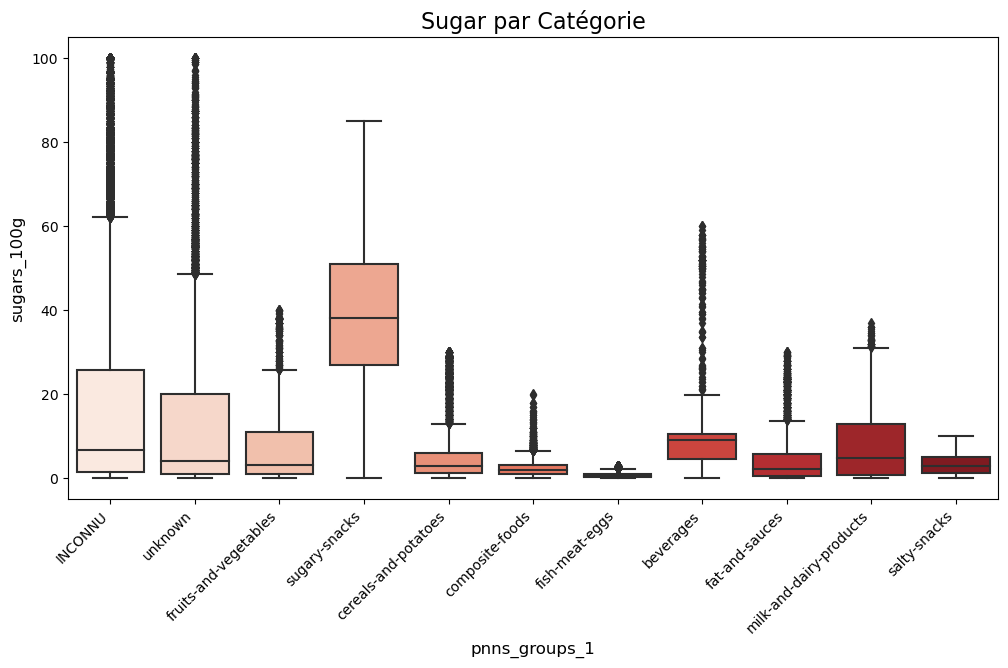

In [86]:
# Appliquer la fonction
df = replace_outliers_by_nan(df, max_sugar_values, 'sugars_100g', 'pnns_groups_1')
plot_boxplots(df, 'pnns_groups_1', 'sugars_100g', 'Reds', 'Sugar par Catégorie')

### Colonne Carbohydrate_100g

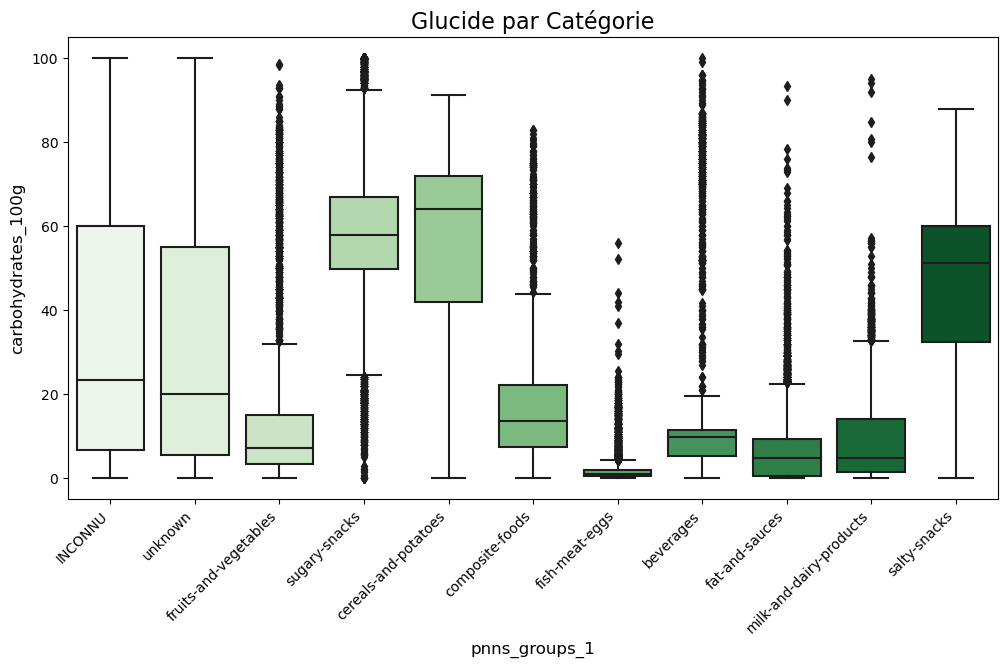

In [87]:
plot_boxplots(df, 'pnns_groups_1', 'carbohydrates_100g', 'Greens', 'Glucide par Catégorie')

Valeurs Maximales de Glucides par Catégorie (pour 100 g)

| **Catégorie**             | **Glucides Maximal (g)** | **Pourquoi cette quantité ?**                                  |
|---------------------------|--------------------------|-----------------------------------------------------------------|
| Fruits et légumes         | 50 g                     | Les fruits et légumes contiennent des glucides principalement sous forme de sucres naturels (fructose). |
| Snacks sucrés             | 90 g                     | Les snacks sucrés (bonbons, gâteaux) sont riches en sucres ajoutés et en glucides simples. |
| Aliments composites       | 50 g                     | Les plats préparés peuvent contenir des glucides provenant de céréales ou légumes, parfois associés à des sucres ajoutés. |
| Poissons, viandes et œufs | 5 g                      | Ces produits sont principalement composés de protéines et de graisses, avec très peu de glucides. |
| Boissons                  | 40 g                     | Les boissons sucrées, comme les sodas ou jus de fruits, contiennent des sucres ajoutés et des glucides simples. |
| Matières grasses et sauces | 25 g                    | Certaines sauces et matières grasses contiennent des glucides (par exemple dans les sauces sucrées ou le ketchup). |
| Produits laitiers         | 50 g                     | Les produits laitiers, comme les yaourts sucrés, contiennent du lactose, un glucide naturel. |

In [88]:
max_carbs_values = {
    "fruits-and-vegetables": 50,
    "sugary-snacks": 90,
    "composite-foods": 50,
    "fish-meat-eggs": 5,
    "beverages": 40,
    "fat-and-sauces": 25,
    "milk-and-dairy-products": 50,
}

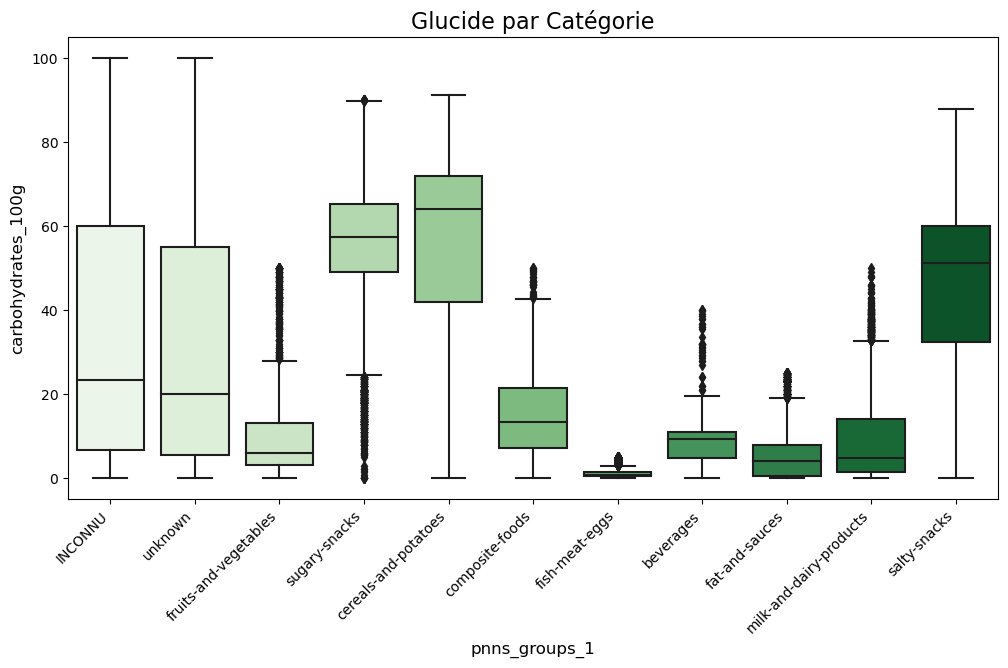

In [89]:
# Appliquer la fonction
df = replace_outliers_by_nan(df, max_carbs_values, 'carbohydrates_100g', 'pnns_groups_1')
plot_boxplots(df, 'pnns_groups_1', 'carbohydrates_100g', 'Greens', 'Glucide par Catégorie')

### Colonne energy_100g

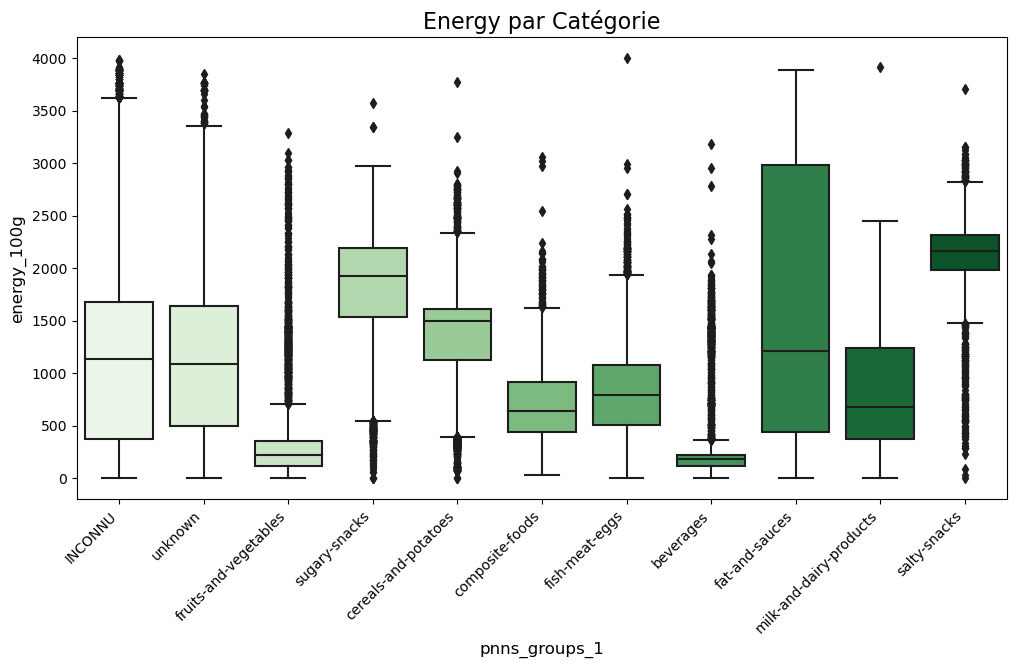

In [90]:
plot_boxplots(df, 'pnns_groups_1', 'energy_100g', 'Greens', 'Energy par Catégorie')

Valeurs Maximales d'Énergie par Catégorie (en kJ)

Voici les valeurs maximales d'énergie estimées pour chaque catégorie alimentaire, avec une explication des raisons derrière ces valeurs :

| **Catégorie**             | **Énergie Max (kJ)** | **Pourquoi cette quantité ?**                                  |
|---------------------------|----------------------|-----------------------------------------------------------------|
| Fruits et légumes         | 1000                 | Les fruits et légumes sont généralement faibles en calories, mais certains fruits comme les bananes, les avocats ou les raisins peuvent être plus énergétiques en raison de leur teneur plus élevée en sucres naturels et graisses saines. |
| Snacks sucrés             | 3000                 | Les snacks sucrés, tels que les bonbons, gâteaux et chocolats, sont riches en sucres ajoutés et en graisses, ce qui les rend très énergétiques. La forte concentration de calories en fait des produits parmi les plus caloriques. |
| Céréales et pommes de terre | 2500                | Les céréales transformées et les pommes de terre, en particulier sous forme de frites ou de céréales sucrées, sont riches en amidon (glucides complexes) et parfois en sucres ajoutés, ce qui leur donne une teneur énergétique élevée. |
| Aliments composites       | 2000                 | Les plats préparés et les repas rapides contiennent souvent des graisses, sucres et amidon transformé. Ces ingrédients sont très énergétiques, ce qui explique la valeur élevée d'énergie pour cette catégorie. |
| Poissons, viandes et œufs | 2500                 | Bien que généralement faibles en glucides, certains poissons gras (comme le saumon) et viandes grasses contiennent des graisses saines ou saturées, qui apportent une énergie modérée à élevée. |
| Boissons                  | 2000                 | Les boissons sucrées, comme les sodas et les jus de fruits, sont riches en sucres ajoutés, ce qui les rend particulièrement énergétiques. Les boissons énergétiques peuvent aussi contenir beaucoup de calories. |
| Matières grasses et sauces | 4000                | Les matières grasses (huiles, beurres) et sauces riches en graisses (par exemple, sauces crémeuses) sont des sources extrêmement concentrées d'énergie, car les graisses fournissent 37 kJ/g, un des macronutriments les plus énergétiques. |
| Produits laitiers         | 2500                 | Les produits laitiers comme les fromages, la crème, et certains yaourts sucrés contiennent à la fois des graisses et du lactose, un sucre naturel, apportant une quantité significative d'énergie, surtout dans les versions entières ou sucrées. |
| Snacks salés              | 3000                 | Les snacks salés, tels que les chips, bretzels, et autres en-cas transformés, sont souvent riches en graisses et en amidon transformé, augmentant leur teneur énergétique. Les graisses ajoutées et l'amidon contribuent fortement à l'apport calorique. |

Ces valeurs sont basées sur des produits très riches en calories dans chaque catégorie. Elles peuvent varier selon les types d'aliments et les méthodes de préparation, mais elles reflètent les tendances générales de chaque groupe.


In [91]:
max_energy_values = {
    "fruits-and-vegetables": 1000,
    "sugary-snacks": 3000,
    "cereals-and-potatoes": 2500,
    "composite-foods": 2000,
    "fish-meat-eggs": 2500,
    "beverages": 2000,
    "milk-and-dairy-products": 2500,
    "salty-snacks": 3000
}

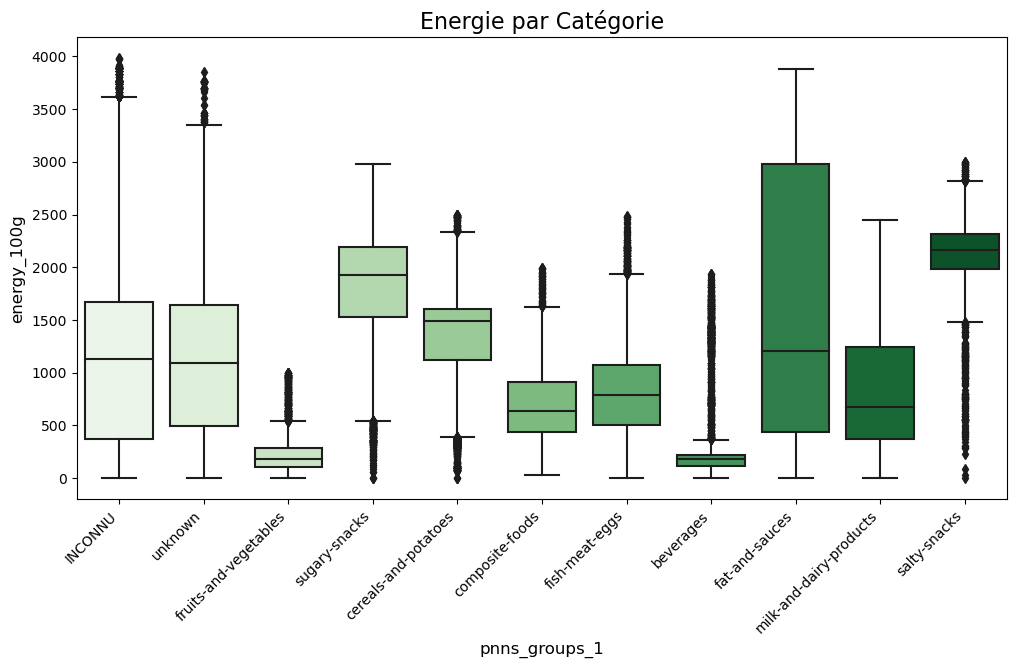

In [92]:
# Appliquer la fonction
df = replace_outliers_by_nan(df, max_energy_values, 'energy_100g', 'pnns_groups_1')
plot_boxplots(df, 'pnns_groups_1', 'energy_100g', 'Greens', 'Energie par Catégorie')

# Partie 3 : Identifier et traiter les valeurs manquantes

In [93]:
df.isnull().sum()

code                           23
additives_n                 40117
nutrition_grade_fr              0
pnns_groups_1                   0
pnns_groups_2              194553
main_category_fr           204672
energy_100g                 28843
fat_100g                    45895
carbohydrates_100g          47729
sugars_100g                 45709
fiber_100g                  88164
proteins_100g               32861
salt_100g                   33707
sodium_100g                 33597
nutrition-score-fr_100g     67841
nutrition-score-uk_100g     67841
dtype: int64

In [94]:
df = df.drop(columns=['main_category_fr'])
df = df.dropna(subset=['code'])

In [95]:
# pip install missingno

<Axes: >

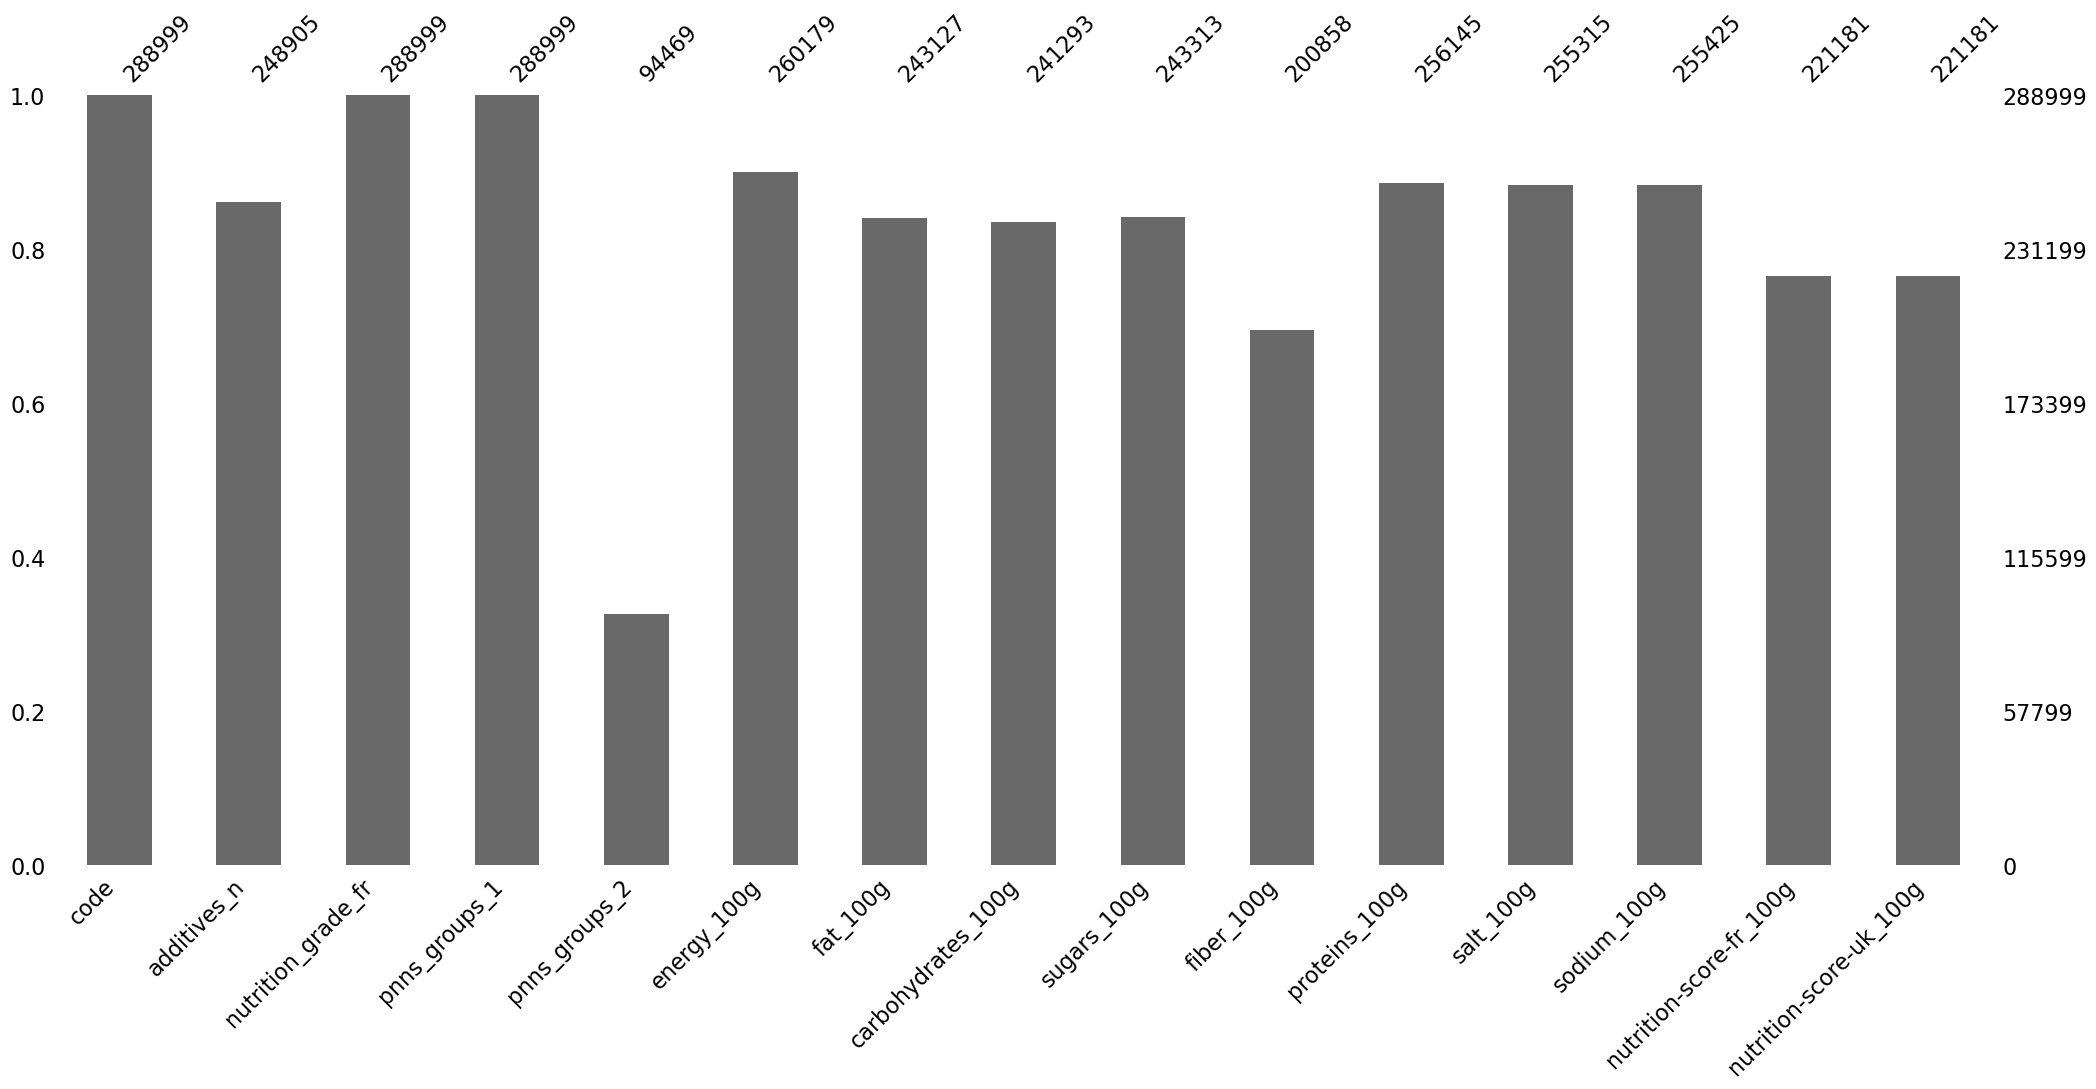

In [96]:
import missingno as msno 

# Visualize missing values as a matrix 
msno.bar(df) 

In [97]:
df.isnull().sum()

code                            0
additives_n                 40094
nutrition_grade_fr              0
pnns_groups_1                   0
pnns_groups_2              194530
energy_100g                 28820
fat_100g                    45872
carbohydrates_100g          47706
sugars_100g                 45686
fiber_100g                  88141
proteins_100g               32854
salt_100g                   33684
sodium_100g                 33574
nutrition-score-fr_100g     67818
nutrition-score-uk_100g     67818
dtype: int64

## Remplissage de valeur manquante via l'approche métier

In [98]:
def replace_nan_by_category(df, category, column, value_to_replace):
    """
    Remplace les valeurs NaN d'une colonne donnée par une valeur spécifiée, 
    uniquement pour les produits appartenant à une catégorie donnée dans 'pnns_groups_1'.

    Paramètres:
    df (pd.DataFrame): Le DataFrame contenant les données.
    category (str): La catégorie dans 'pnns_groups_1' (par exemple 'beverage').
    column (str): Le nom de la colonne contenant les valeurs à remplacer (par exemple 'fiber_100g').
    value_to_replace: La valeur qui remplacera les NaN dans la colonne spécifiée.
    """
    
    # Filtrer les indices des lignes où la colonne 'column' contient NaN et la catégorie correspond
    indices_to_replace = df[(df['pnns_groups_1'] == category) & df[column].isna()].index
    
    # Remplacer les valeurs NaN pour ces indices par la valeur spécifiée
    df.loc[indices_to_replace, column] = value_to_replace

    # Retourner le DataFrame modifié
    return df

In [99]:
# Appliquer isnull().sum() sur chaque groupe distinct de 'pnns_groups_1'
df.groupby('pnns_groups_1').apply(lambda group: group.isnull().sum())

code  additives_n  nutrition_grade_fr  pnns_groups_1  \
pnns_groups_1                                                                   
INCONNU                     0        18791                   0              0   
beverages                   0         2208                   0              0   
cereals-and-potatoes        0         1305                   0              0   
composite-foods             0          722                   0              0   
fat-and-sauces              0          989                   0              0   
fish-meat-eggs              0         1061                   0              0   
fruits-and-vegetables       0          863                   0              0   
milk-and-dairy-products     0         1489                   0              0   
salty-snacks                0          416                   0              0   
sugary-snacks               0         1998                   0              0   
unknown                     0        10252                   0              0   

                         pnns_groups_2  energy_100g  fat_100g  \
pnns_groups_1                                                   
INCONNU                         194530         4339     18021   
beverages                            0         2708      3697   
cereals-and-potatoes                 0         1093      1664   
composite-foods                      0          744       904   
fat-and-sauces                       0         1107      1297   
fish-meat-eggs                       0         2185      2376   
fruits-and-vegetables                0         2787      2439   
milk-and-dairy-products              0         1351      1307   
salty-snacks                         0          358       510   
sugary-snacks                        0         2298      2738   
unknown                              0         9850     10919   

                         carbohydrates_100g  sugars_100g  fiber_100g  \
pnns_groups_1                                                          
INCONNU                               17875        16162       37895   
beverages                              3786         3324        5237   
cereals-and-potatoes                   1299         1729        2459   
composite-foods                        1050          978        2746   
fat-and-sauces                         1674         1524        3138   
fish-meat-eggs                         2980         2821        5610   
fruits-and-vegetables                  2784         2859        3288   
milk-and-dairy-products                1716         1902        5612   
salty-snacks                            438          595        1058   
sugary-snacks                          3147         2924        6565   
unknown                               10957        10868       14533   

                         proteins_100g  salt_100g  sodium_100g  \
pnns_groups_1                                                    
INCONNU                           4766       6036         5927   
beverages                         2935       2941         2942   
cereals-and-potatoes              1609       1552         1552   
composite-foods                    836        911          910   
fat-and-sauces                    3190       1382         1382   
fish-meat-eggs                    2277       2549         2550   
fruits-and-vegetables             2389       2527         2528   
milk-and-dairy-products           1399       1858         1859   
salty-snacks                       650        425          425   
sugary-snacks                     2771       2737         2736   
unknown                          10032      10766        10763   

                         nutrition-score-fr_100g  nutrition-score-uk_100g  
pnns_groups_1                                                              
INCONNU                                    38113                    38113  
beverages                                   3336                     3336  
cereals-and-potatoes     

### Fibre_100g, Proteine_100g, sal_100g, sodium_100g

In [100]:
# Remplacer les NaN dans 'fiber_100g' pour la catégorie 'beverage' par 1
df = replace_nan_by_category(df, 'beverages', 'fiber_100g', 1)
df = replace_nan_by_category(df, 'fat-and-sauces', 'fiber_100g', 1)
df = replace_nan_by_category(df, 'milk-and-dairy-products', 'fiber_100g', 1)
df = replace_nan_by_category(df, 'fish-meat-eggs', 'fiber_100g', 1)

df = replace_nan_by_category(df, 'fat-and-sauces', 'proteins_100g', 1)

df = replace_nan_by_category(df, 'sugary-snacks', 'salt_100g', 0.5)
df = replace_nan_by_category(df, 'fruits-and-vegetables', 'salt_100g', 0.5)
df = replace_nan_by_category(df, 'beverages', 'salt_100g', 0.5)

df = replace_nan_by_category(df, 'milk-and-dairy-products', 'sodium_100g', 1)
df = replace_nan_by_category(df, 'fruits-and-vegetables', 'sodium_100g', 1)
df = replace_nan_by_category(df, 'cereals-and-potatoes', 'sodium_100g', 1)
df = replace_nan_by_category(df, 'beverages', 'sodium_100g', 1)

# Appliquer isnull().sum() sur chaque groupe distinct de 'pnns_groups_1'
df.groupby('pnns_groups_1').apply(lambda group: group.isnull().sum())

code  additives_n  nutrition_grade_fr  pnns_groups_1  \
pnns_groups_1                                                                   
INCONNU                     0        18791                   0              0   
beverages                   0         2208                   0              0   
cereals-and-potatoes        0         1305                   0              0   
composite-foods             0          722                   0              0   
fat-and-sauces              0          989                   0              0   
fish-meat-eggs              0         1061                   0              0   
fruits-and-vegetables       0          863                   0              0   
milk-and-dairy-products     0         1489                   0              0   
salty-snacks                0          416                   0              0   
sugary-snacks               0         1998                   0              0   
unknown                     0        10252                   0              0   

                         pnns_groups_2  energy_100g  fat_100g  \
pnns_groups_1                                                   
INCONNU                         194530         4339     18021   
beverages                            0         2708      3697   
cereals-and-potatoes                 0         1093      1664   
composite-foods                      0          744       904   
fat-and-sauces                       0         1107      1297   
fish-meat-eggs                       0         2185      2376   
fruits-and-vegetables                0         2787      2439   
milk-and-dairy-products              0         1351      1307   
salty-snacks                         0          358       510   
sugary-snacks                        0         2298      2738   
unknown                              0         9850     10919   

                         carbohydrates_100g  sugars_100g  fiber_100g  \
pnns_groups_1                                                          
INCONNU                               17875        16162       37895   
beverages                              3786         3324           0   
cereals-and-potatoes                   1299         1729        2459   
composite-foods                        1050          978        2746   
fat-and-sauces                         1674         1524           0   
fish-meat-eggs                         2980         2821           0   
fruits-and-vegetables                  2784         2859        3288   
milk-and-dairy-products                1716         1902           0   
salty-snacks                            438          595        1058   
sugary-snacks                          3147         2924        6565   
unknown                               10957        10868       14533   

                         proteins_100g  salt_100g  sodium_100g  \
pnns_groups_1                                                    
INCONNU                           4766       6036         5927   
beverages                         2935          0            0   
cereals-and-potatoes              1609       1552            0   
composite-foods                    836        911          910   
fat-and-sauces                       0       1382         1382   
fish-meat-eggs                    2277       2549         2550   
fruits-and-vegetables             2389          0            0   
milk-and-dairy-products           1399       1858            0   
salty-snacks                       650        425          425   
sugary-snacks                     2771          0         2736   
unknown                          10032      10766        10763   

                         nutrition-score-fr_100g  nutrition-score-uk_100g  
pnns_groups_1                                                              
INCONNU                                    38113                    38113  
beverages                                   3336                     3336  
cereals-and-potatoes     

## Remplissage grace à la médiane

In [101]:
import pandas as pd

def replace_nan_by_mediane(df, col1, col2):
    """
    Remplace les valeurs NaN dans col2 par la médiane des valeurs de col2 pour chaque catégorie dans col1.

    :param df: DataFrame pandas contenant les données
    :param col1: Nom de la colonne des catégories
    :param col2: Nom de la colonne des valeurs à traiter
    """
    # Boucle sur chaque catégorie dans la colonne col1
    for category in df[col1].unique():
        
        # Exclure les catégories 'INCONNU' et 'unknown'
        if category.lower() in ['inconnu', 'unknown']:
            continue
            
        # Filtrer le DataFrame pour la catégorie en cours
        category_df = df[df[col1] == category]
        
        # Calculer la médiane de col2 pour cette catégorie
        median_value = category_df[col2].median()
        
        # Remplacer les valeurs NaN dans col2 pour cette catégorie par la médiane calculée
        df.loc[(df[col1] == category) & (df[col2].isna()), col2] = median_value

    return df

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_distribution_statistics(df, column):
    """
    Visualise la distribution, la variance, l'écart-type et d'autres statistiques descriptives
    pour une colonne donnée du DataFrame.

    Args:
    df (pd.DataFrame): Le DataFrame contenant les données.
    column (str): Le nom de la colonne à analyser.

    """
    # Calcul des statistiques descriptives
    mean_value = df[column].mean()
    median_value = df[column].median()
    std_dev = df[column].std()
    variance = df[column].var()

    print(f"Statistiques pour la colonne '{column}':")
    print(f"Moyenne : {mean_value}")
    print(f"Médiane : {median_value}")
    print(f"Écart-type : {std_dev}")
    print(f"Variance : {variance}")
    
    # Visualisation des statistiques

    plt.figure(figsize=(15, 8))

    # Histogramme pour observer la distribution
    plt.subplot(2, 2, 1)
    sns.histplot(df[column], kde=True, color='blue', bins=6)
    plt.title(f'Histogramme et Densité de la distribution de {column}')

    # Boxplot pour observer la médiane, les quartiles et les outliers
    plt.subplot(2, 2, 2)
    sns.boxplot(x=df[column], color='green')
    plt.title(f'Boxplot de {column}')

    # Visualisation de la variance et de l'écart-type avec une ligne de référence
    plt.subplot(2, 2, 3)
    sns.histplot(df[column], kde=True, color='blue', bins=6)
    plt.axvline(mean_value, color='red', linestyle='--', label=f'Moyenne ({mean_value:.2f})')
    plt.axvline(mean_value - std_dev, color='orange', linestyle='--', label=f'Écart-type (-σ : {std_dev:.2f})')
    plt.axvline(mean_value + std_dev, color='orange', linestyle='--', label=f'Écart-type (+σ : {std_dev:.2f})')
    plt.legend()
    plt.title(f'Distribution avec Moyenne et Écart-type de {column}')


    # Densité pour mieux visualiser la distribution
    plt.subplot(2, 2, 4)
    sns.kdeplot(df[column], color='blue', shade=True)
    plt.title(f'Densité de probabilité de {column}')

    plt.tight_layout()
    plt.show()

### Nettoyage de la colonne pnns2

In [103]:
# Supposons que ton DataFrame s'appelle df
df['pnns_groups_2'] = df['pnns_groups_2'].str.strip()  # Supprimer les espaces avant et après
df['pnns_groups_2'] = df['pnns_groups_2'].str.lower()  # Met tout en minuscules

In [104]:
# Remplacer les valeurs manquantes par une catégorie par défaut (par exemple, 'unknown')
df['pnns_groups_2'] = df['pnns_groups_2'].fillna('INCONNU')

### Fibre_100g

Statistiques pour la colonne 'fiber_100g':
Moyenne : 2.6058177712458317
Médiane : 1.0
Écart-type : 4.263554901678004
Variance : 18.177900399622533


C:\Users\danie\AppData\Local\Temp\ipykernel_29076\3034312772.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], color='blue', shade=True)


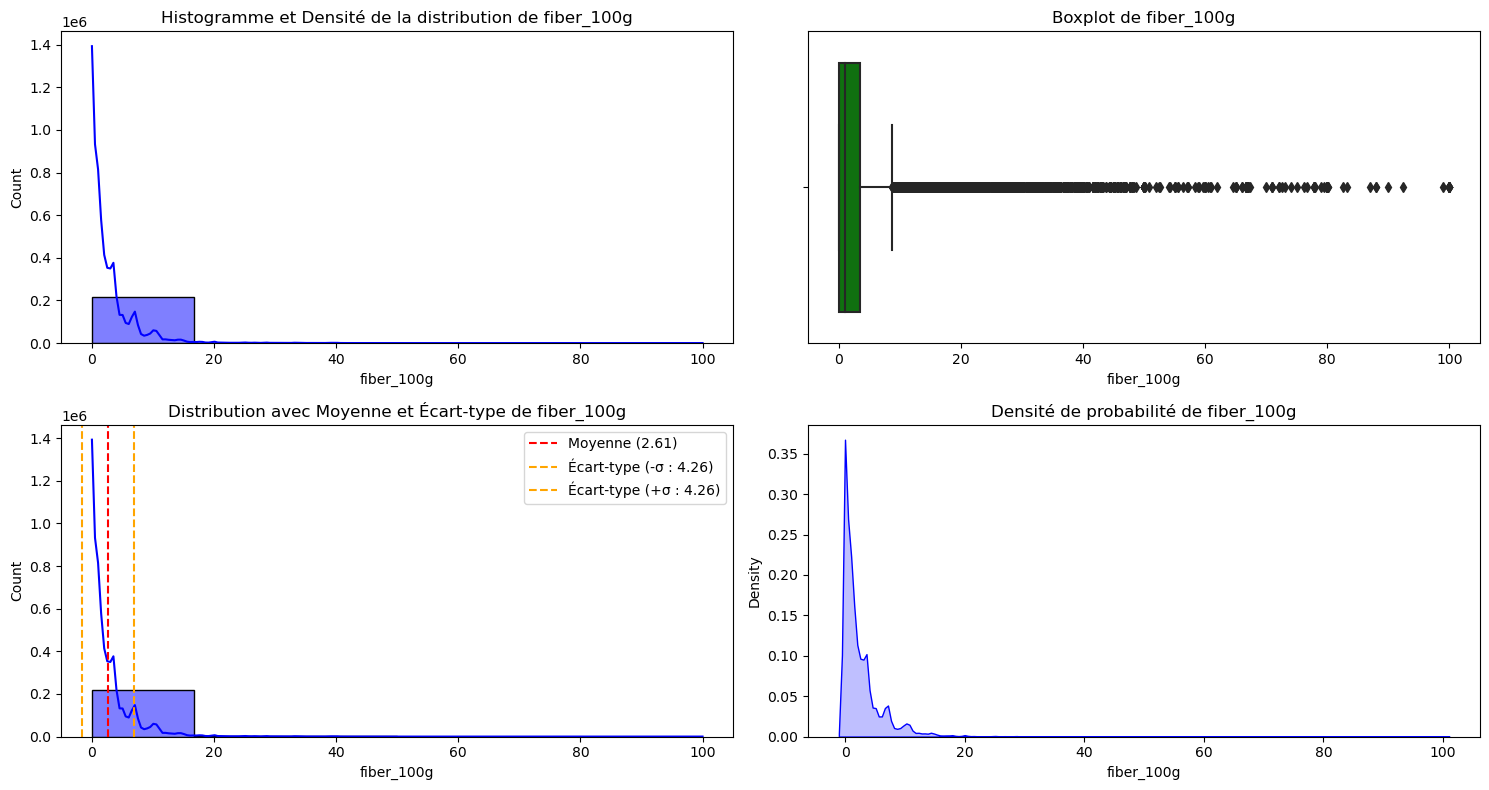

In [105]:
# Visualiser les statistiques pour la colonne 'valeur'
visualize_distribution_statistics(df, 'fiber_100g')

In [106]:
df = replace_nan_by_mediane(df, "pnns_groups_2", "fiber_100g")

In [107]:
df.isnull().sum()

code                           0
additives_n                40094
nutrition_grade_fr             0
pnns_groups_1                  0
pnns_groups_2                  0
energy_100g                28820
fat_100g                   45872
carbohydrates_100g         47706
sugars_100g                45686
fiber_100g                 49522
proteins_100g              29664
salt_100g                  25479
sodium_100g                24693
nutrition-score-fr_100g    67818
nutrition-score-uk_100g    67818
dtype: int64

Statistiques pour la colonne 'fiber_100g':
Moyenne : 2.5798895792080248
Médiane : 1.2
Écart-type : 4.119498369074837
Variance : 16.970266812810237


C:\Users\danie\AppData\Local\Temp\ipykernel_29076\3034312772.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], color='blue', shade=True)


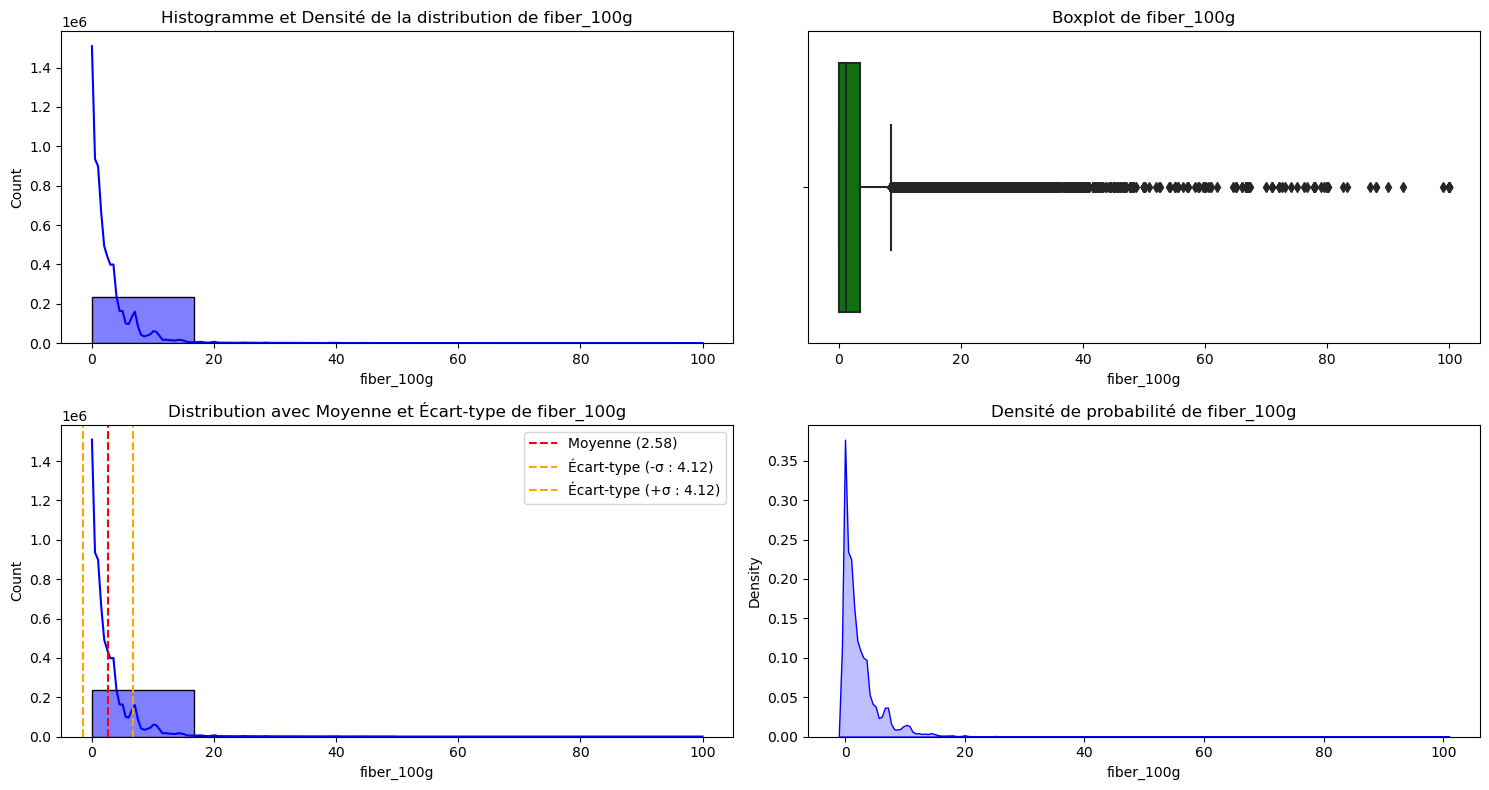

In [108]:
# Visualiser les statistiques pour la colonne 'valeur'
visualize_distribution_statistics(df, 'fiber_100g')

In [109]:
df = replace_nan_by_mediane(df, "pnns_groups_1", "fiber_100g")
df.isnull().sum()

code                           0
additives_n                40094
nutrition_grade_fr             0
pnns_groups_1                  0
pnns_groups_2                  0
energy_100g                28820
fat_100g                   45872
carbohydrates_100g         47706
sugars_100g                45686
fiber_100g                 49522
proteins_100g              29664
salt_100g                  25479
sodium_100g                24693
nutrition-score-fr_100g    67818
nutrition-score-uk_100g    67818
dtype: int64

Statistiques pour la colonne 'fiber_100g':
Moyenne : 2.5798895792080248
Médiane : 1.2
Écart-type : 4.119498369074837
Variance : 16.970266812810237


C:\Users\danie\AppData\Local\Temp\ipykernel_29076\3034312772.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], color='blue', shade=True)


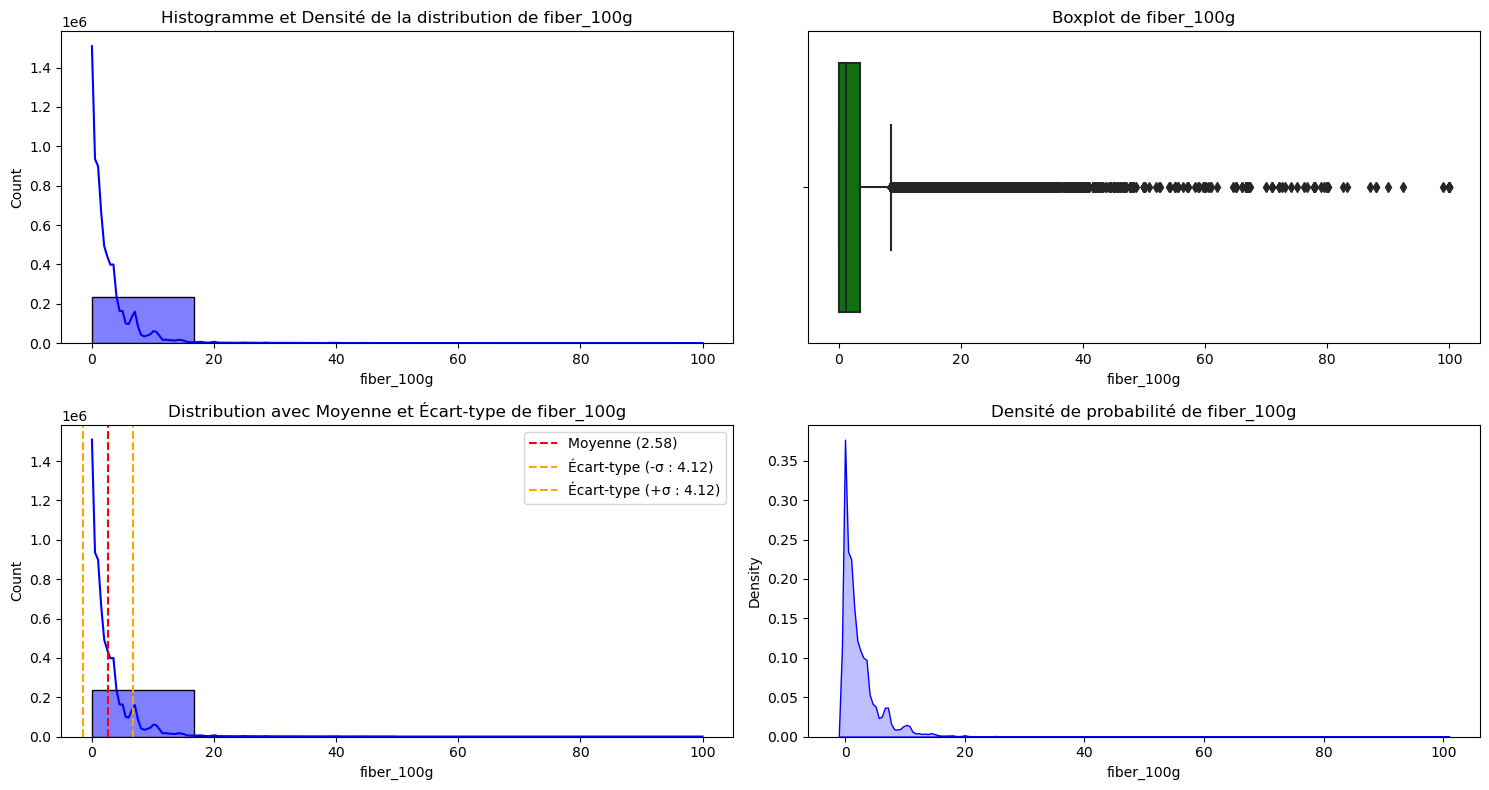

In [110]:
# Visualiser les statistiques pour la colonne 'valeur'
visualize_distribution_statistics(df, 'fiber_100g')

### Autres colonnes

In [111]:
# Liste des colonnes à traiter
columns_to_fill = ["energy_100g", "fat_100g", "carbohydrates_100g", "sugars_100g", "proteins_100g", "salt_100g", "sodium_100g"]

# Remplir les valeurs manquantes d'abord avec pnns_groups_2
for col in columns_to_fill:
    df = replace_nan_by_mediane(df, "pnns_groups_2", col)

# Remplir les valeurs manquantes avec pnns_groups_1
for col in columns_to_fill:
    df = replace_nan_by_mediane(df, "pnns_groups_1", col)

In [112]:
df = df.drop(columns=['pnns_groups_2'])

<Axes: >

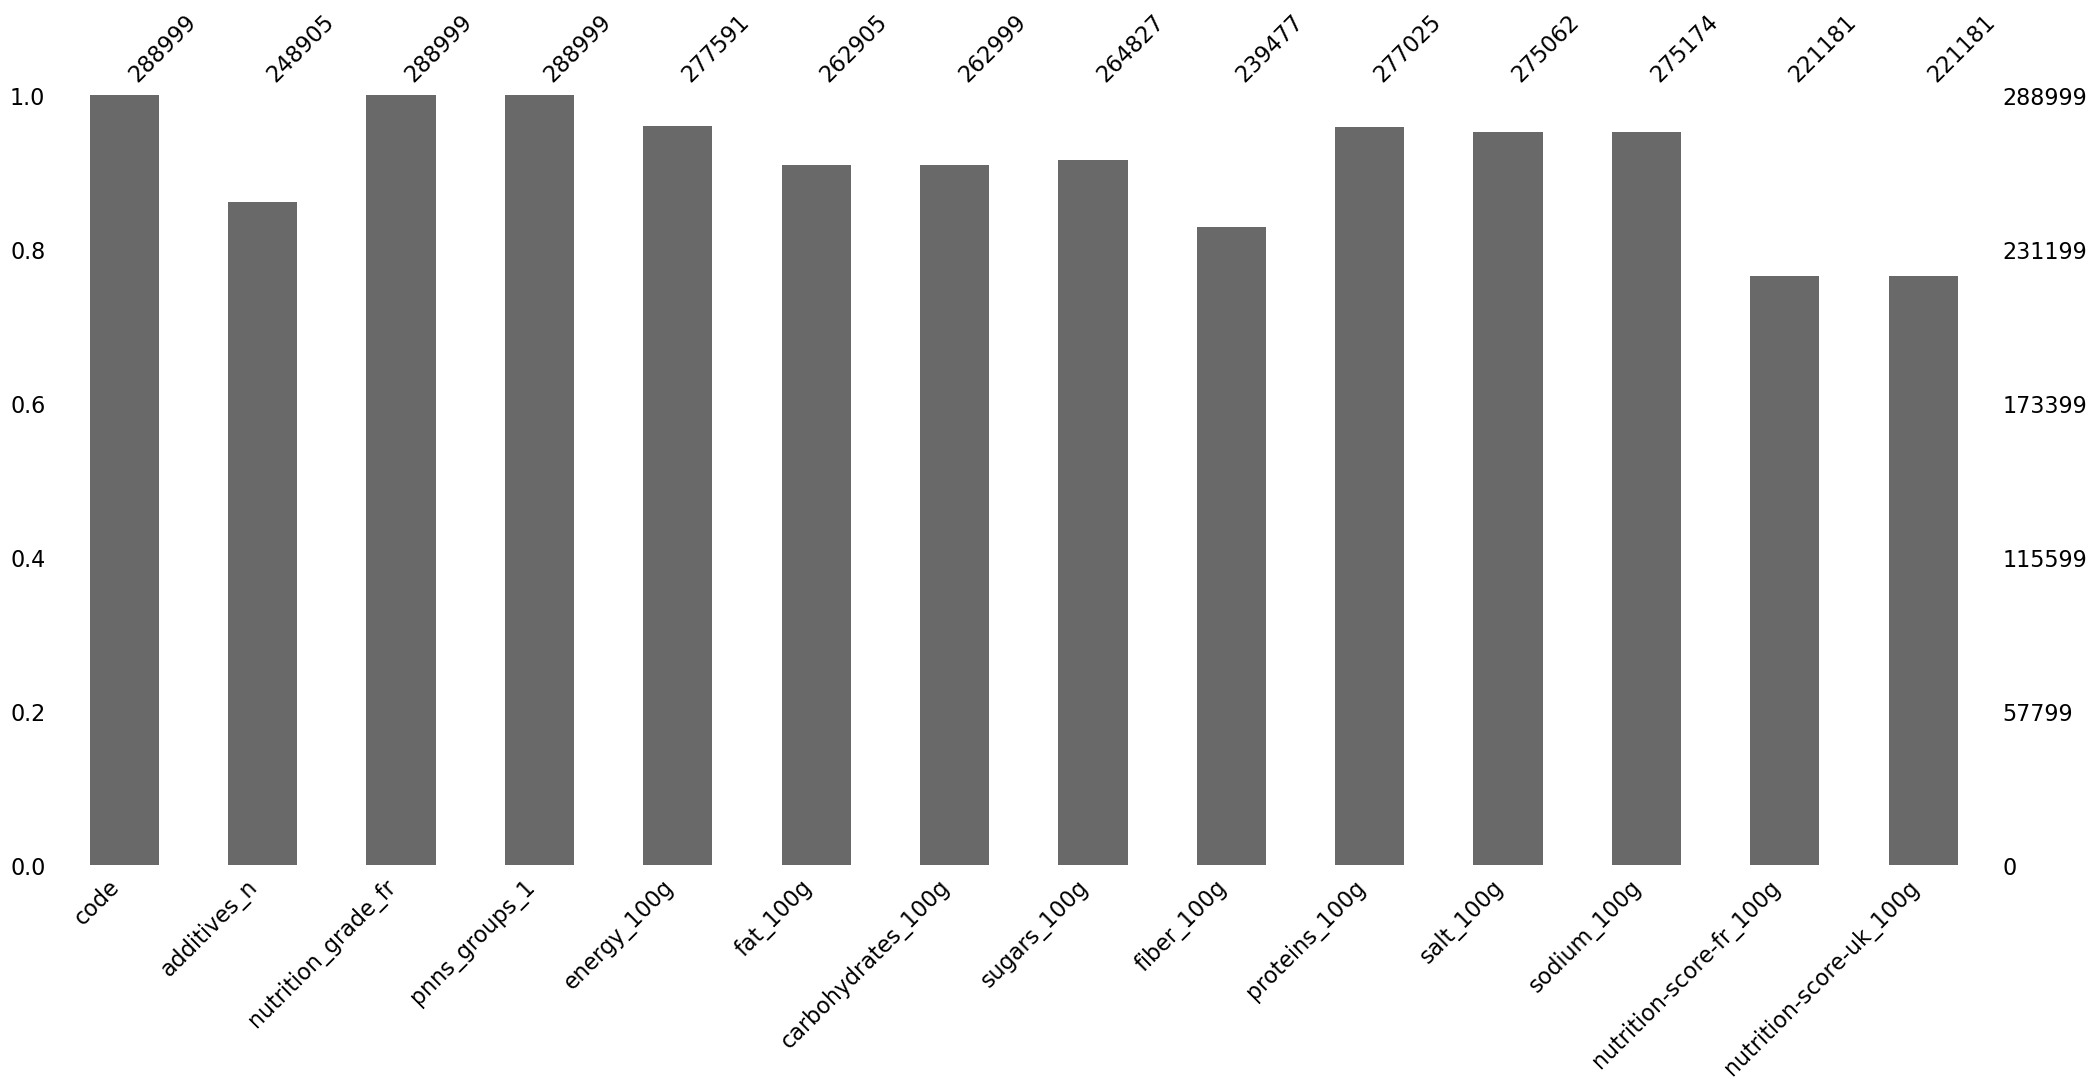

In [113]:
# Visualize missing values as a matrix 
msno.bar(df)

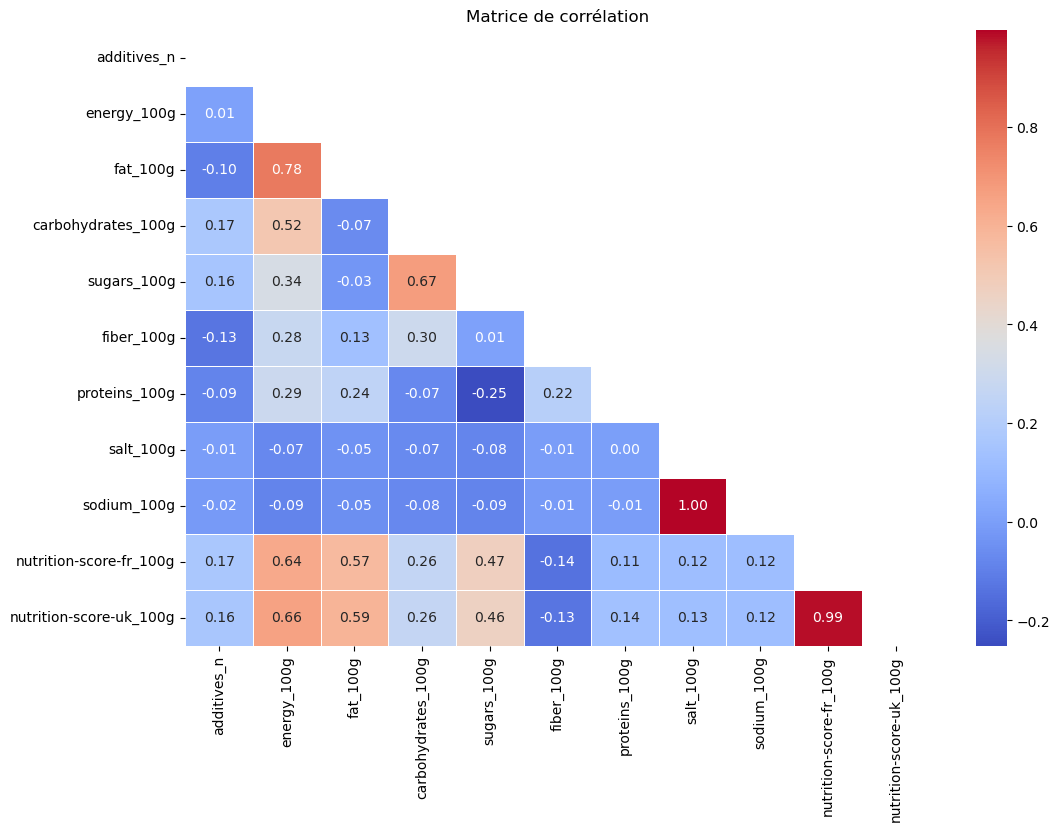

In [114]:
def correlation() :
    # Garder uniquement les colonnes numériques
    numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32', 'float32']).columns
    
    # Calculer la matrice de corrélation
    correlation_matrix = df[numeric_columns].corr()
    
    # Masquer la moitié de la matrice (triangulaire supérieure)
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # Afficher la heatmap optimisée
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Matrice de corrélation")
    plt.show()
correlation()

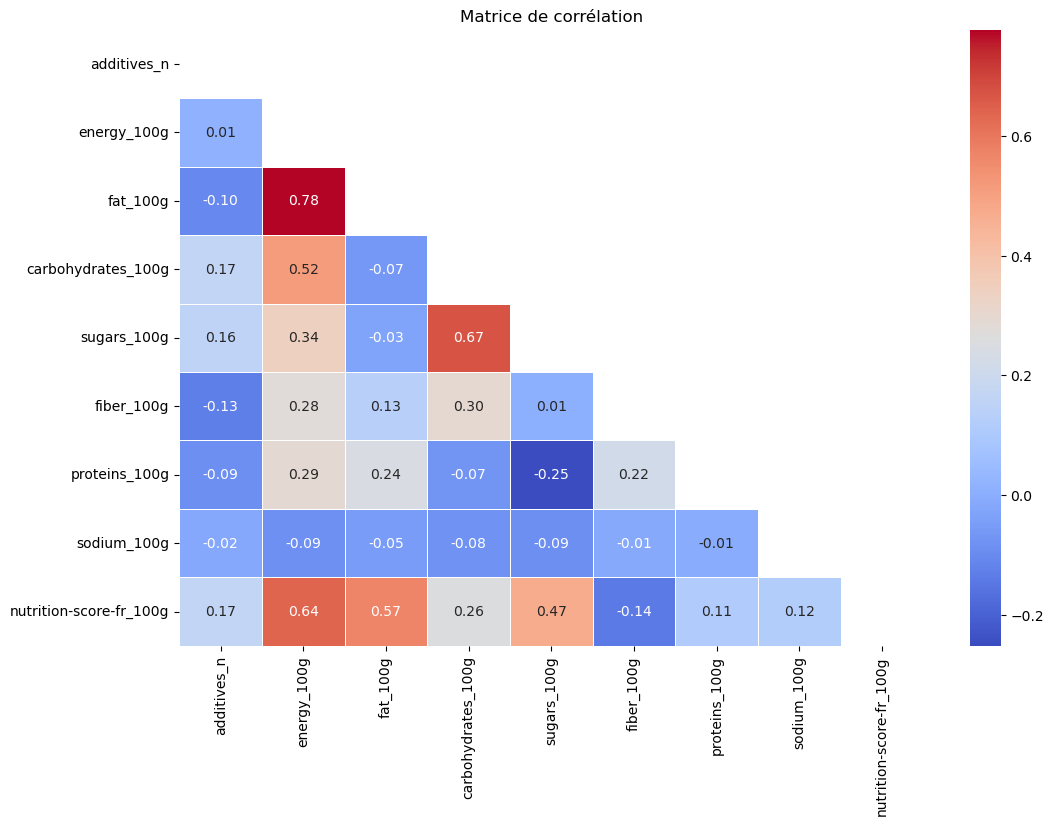

In [115]:
df = df.drop(columns=['salt_100g','nutrition-score-uk_100g'])
correlation()

In [116]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # Activation nécessaire
from sklearn.impute import IterativeImputer

In [117]:
def group_col_iterative_imputeur(df, columns_to_impute):
    """
    Impute les colonnes spécifiées dans un DataFrame en utilisant IterativeImputer et affiche
    les distributions avant et après imputation.

    Paramètres :
    df : DataFrame
        Le DataFrame contenant les données à imputer.
    columns_to_impute : list
        Liste des noms des colonnes à imputer.
    """
    # Sous-ensemble des colonnes à imputer
    data_to_impute = df[columns_to_impute]

    # Distribution avant imputation
    fig, axes = plt.subplots(2, len(columns_to_impute), figsize=(12, 8))

    for i, column in enumerate(columns_to_impute):
        sns.histplot(data_to_impute[column], kde=True, ax=axes[0, i])
        axes[0, i].set_title(f"Avant imputation: {column}")
        axes[0, i].set_xlabel(column)

    # Vérification des valeurs manquantes avant imputation
    print("Valeurs manquantes avant imputation :")
    print(data_to_impute.isnull().sum())

    # Création et application d'IterativeImputer
    imputer = IterativeImputer(max_iter=20, random_state=0)
    imputed_data = imputer.fit_transform(data_to_impute)

    # Mise à jour du DataFrame avec les données imputées
    df[columns_to_impute] = imputed_data

    # Vérification des valeurs manquantes après imputation
    print("\nValeurs manquantes après imputation :")
    print(df[columns_to_impute].isnull().sum())

    # Distribution après imputation
    for i, column in enumerate(columns_to_impute):
        sns.histplot(imputed_data[:, i], kde=True, ax=axes[1, i])
        axes[1, i].set_title(f"Après imputation: {column}")
        axes[1, i].set_xlabel(column)

    plt.tight_layout()
    plt.show()

Valeurs manquantes avant imputation :
energy_100g    11408
fat_100g       26094
dtype: int64

Valeurs manquantes après imputation :
energy_100g    0
fat_100g       0
dtype: int64


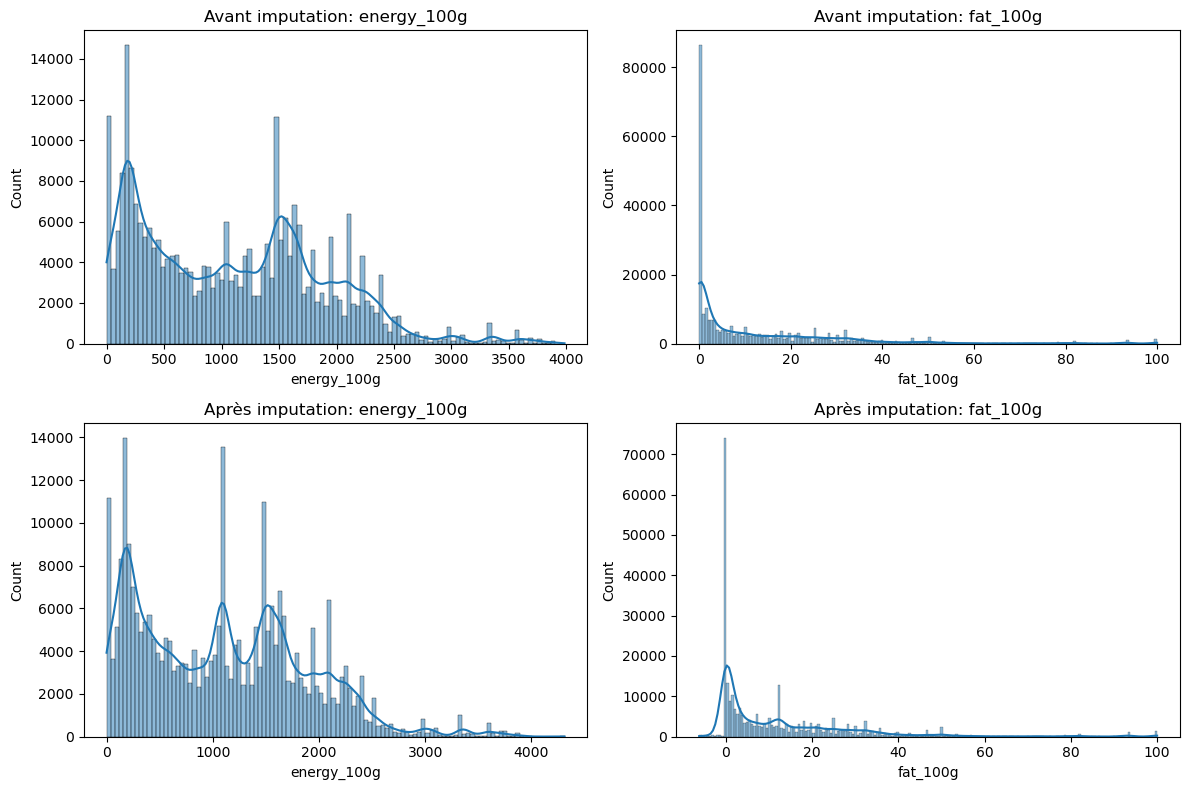

In [118]:
# Exemple d'appel de la fonction
group_col_iterative_imputeur(df, ["energy_100g", "fat_100g"])

Valeurs manquantes avant imputation :
carbohydrates_100g    26000
sugars_100g           24172
dtype: int64

Valeurs manquantes après imputation :
carbohydrates_100g    0
sugars_100g           0
dtype: int64


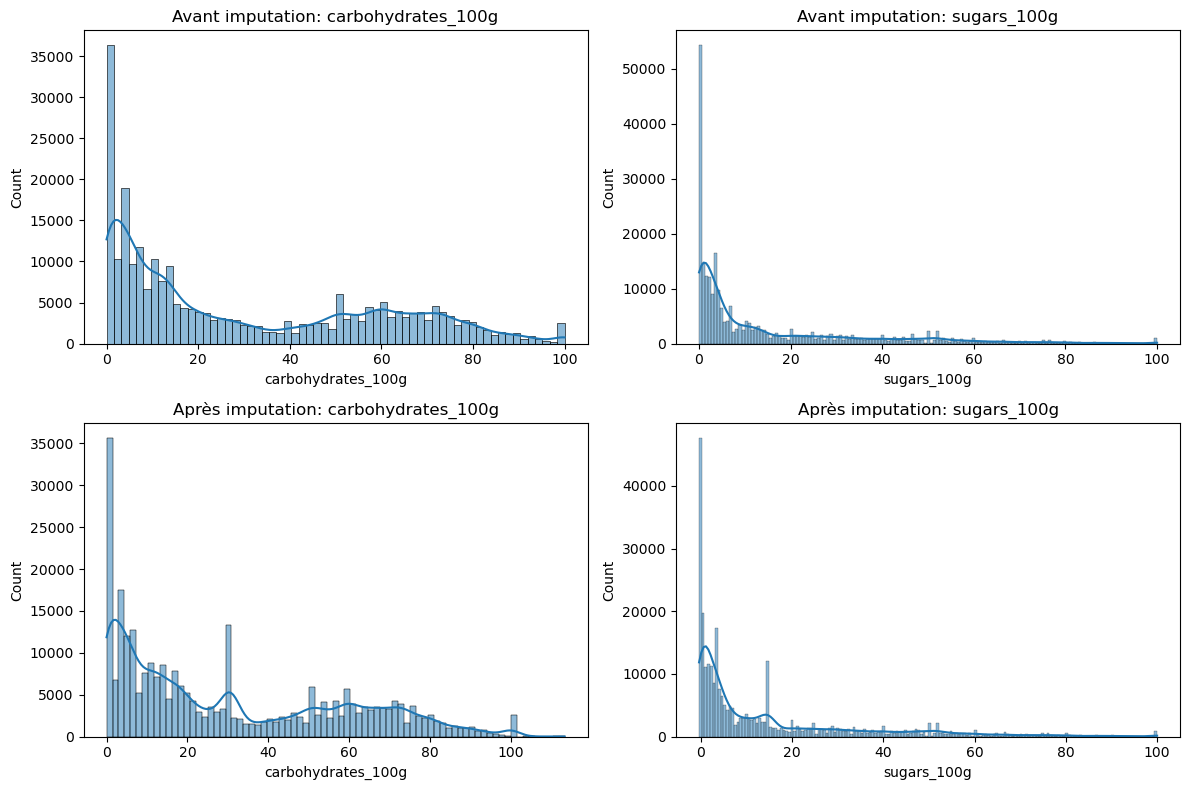

In [119]:
group_col_iterative_imputeur(df, ["carbohydrates_100g", "sugars_100g"])

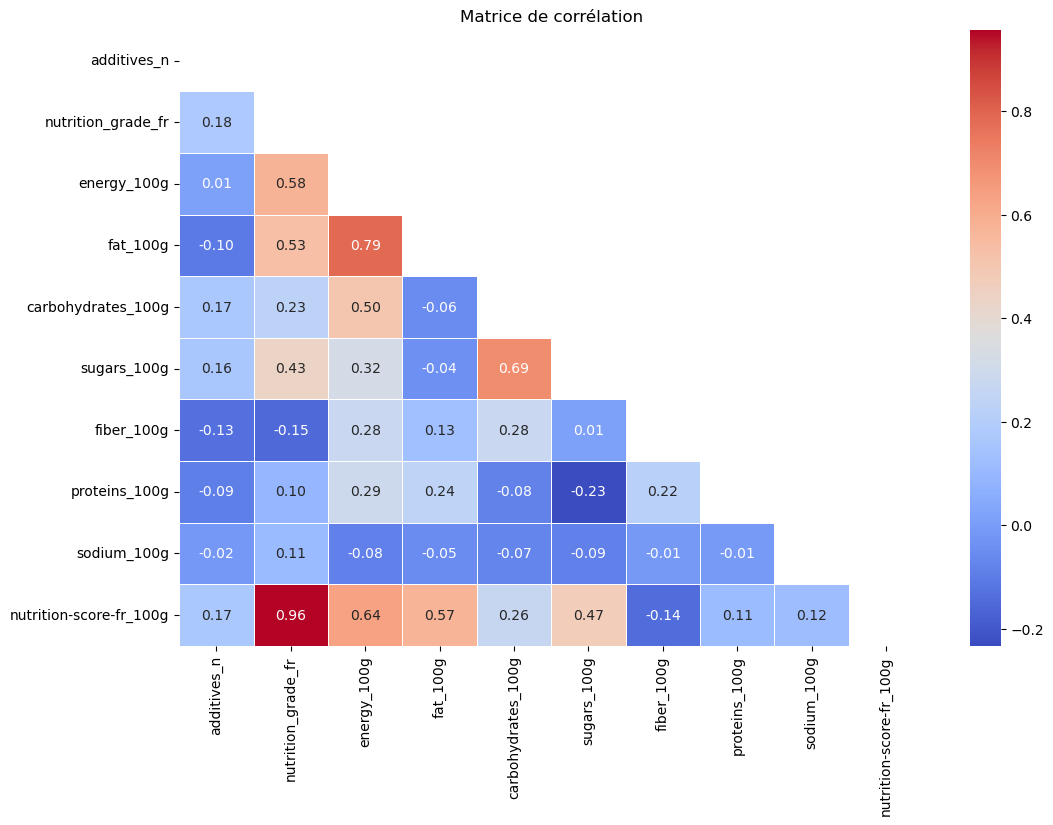

In [120]:
from sklearn.preprocessing import LabelEncoder

# Exemple de colonne catégorielle à encoder
le = LabelEncoder()
df['nutrition_grade_fr'] = le.fit_transform(df['nutrition_grade_fr'])

# Remplacer les valeurs égales à 0 par NaN
df['nutrition_grade_fr'] = df['nutrition_grade_fr'].replace(0, np.nan)

correlation()

In [121]:
# Remplacer les NaN par 100
df['nutrition-score-fr_100g'] = df['nutrition-score-fr_100g'].fillna(100)

# Convertir en entier
df['nutrition-score-fr_100g'] = df['nutrition-score-fr_100g'].astype(int)

# Remplacer les valeurs égales à 100 par NaN
df['nutrition-score-fr_100g'] = df['nutrition-score-fr_100g'].replace(100, np.nan)

Valeurs manquantes avant imputation :
nutrition-score-fr_100g    67818
energy_100g                    0
dtype: int64

Valeurs manquantes après imputation :
nutrition-score-fr_100g    0
energy_100g                0
dtype: int64


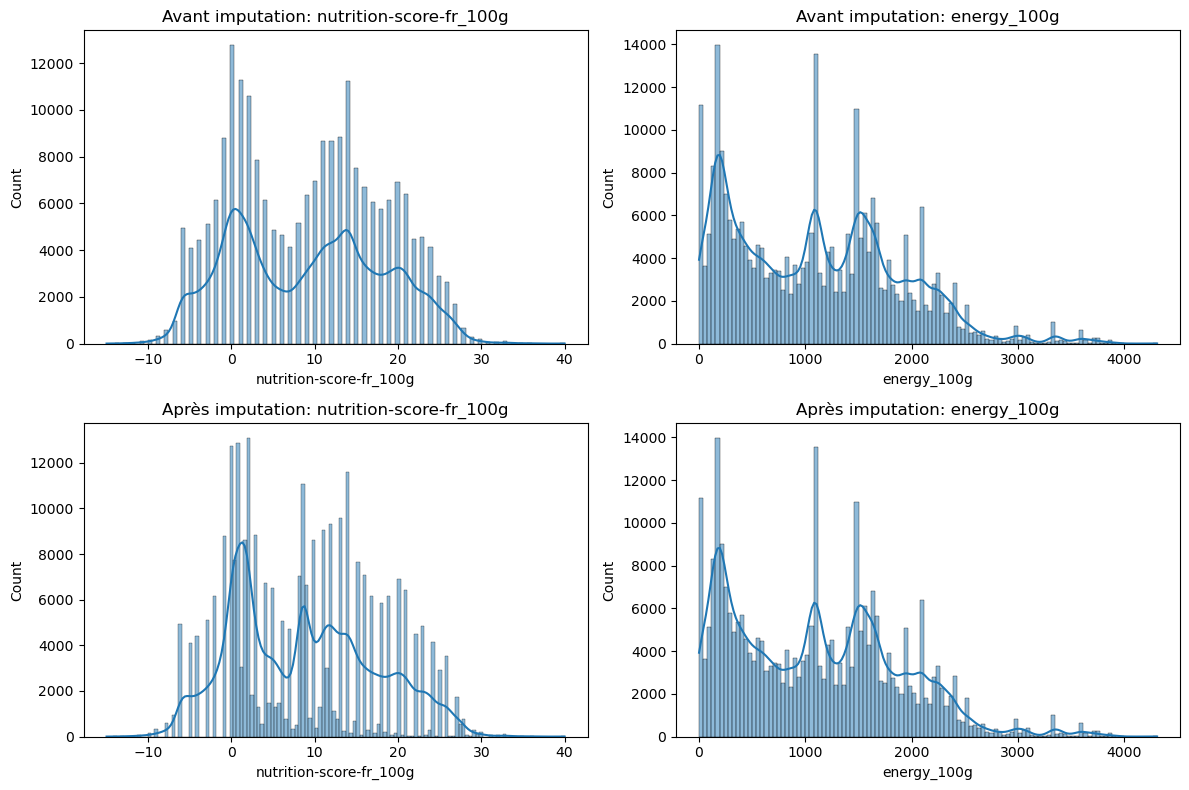

In [122]:
group_col_iterative_imputeur(df, ["nutrition-score-fr_100g", "energy_100g"])

<Axes: >

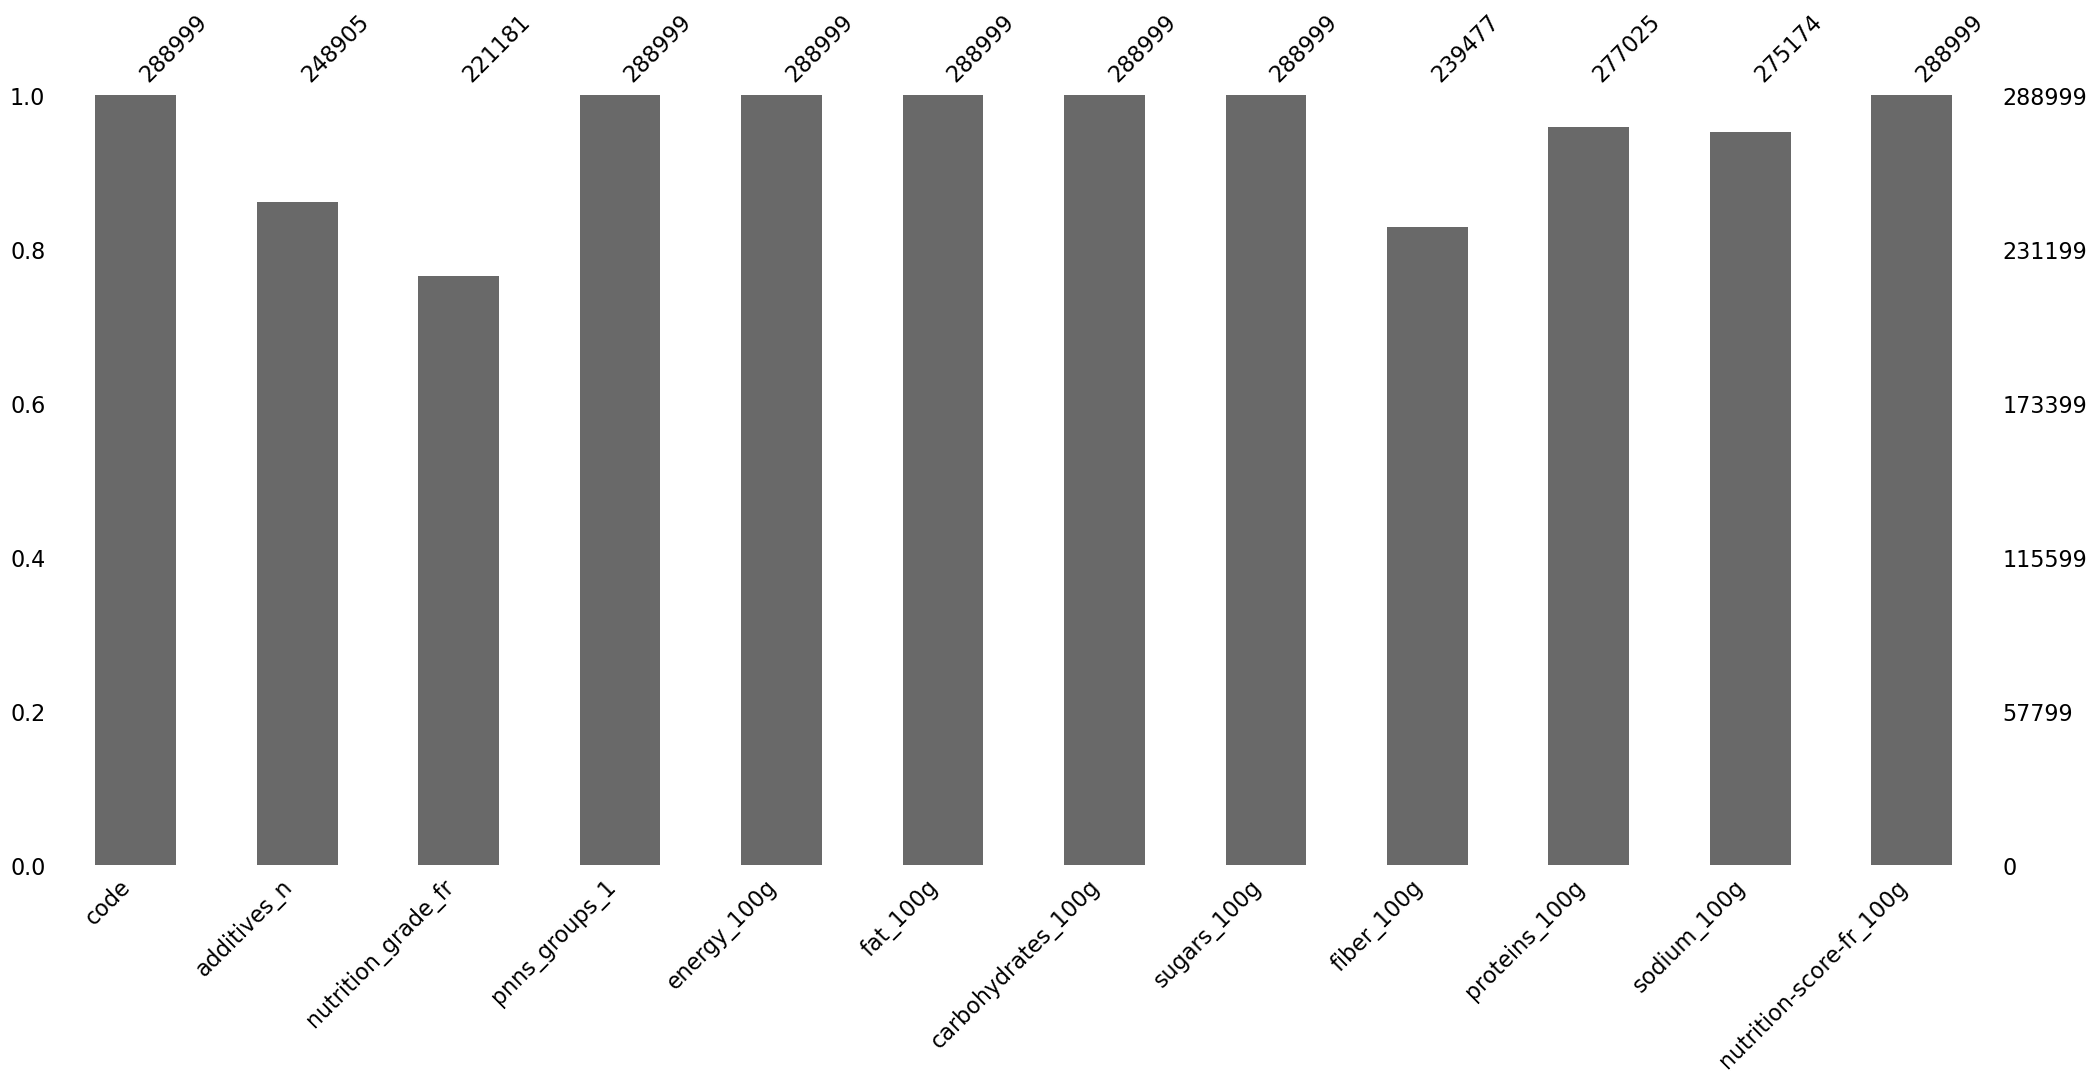

In [123]:
msno.bar(df)

In [124]:
df = df.drop(columns=['additives_n','nutrition_grade_fr'])

In [125]:
from sklearn.impute import KNNImputer

def knn_fill_missing(df, target_column, features_columns, n_neighbors=5):
    """
    Remplit les valeurs manquantes d'une colonne à l'aide de KNN.

    Parameters:
    df (pd.DataFrame): Le DataFrame contenant les données.
    target_column (str): La colonne cible avec des valeurs manquantes à remplir.
    features_columns (list): Les colonnes utilisées comme caractéristiques pour KNN.
    n_neighbors (int): Le nombre de voisins à utiliser pour KNN.

    Returns:
    pd.DataFrame: DataFrame avec la colonne cible remplie.
    """
    # Créer une copie pour éviter de modifier l'original
    df_copy = df.copy()

    # Sélectionner uniquement les colonnes nécessaires pour l'imputation
    columns_for_imputation = features_columns + [target_column]
    data_for_imputation = df_copy[columns_for_imputation]

    # Vérifier si les colonnes nécessaires contiennent des NaN
    if data_for_imputation.isnull().any().sum() == 0:
        print("Aucune valeur manquante à imputer.")
        return df_copy

    # Appliquer l'imputation KNN
    imputer = KNNImputer(n_neighbors=n_neighbors)
    imputed_data = imputer.fit_transform(data_for_imputation)

    # Remplacer la colonne cible dans le DataFrame original
    df_copy[target_column] = imputed_data[:, -1]

    return df_copy

In [126]:
def plot_column_distribution(df_original, df_filled, column, bins=30):
    """
    Affiche la distribution d'une colonne avant et après remplissage des valeurs manquantes.

    Parameters:
    df_original (pd.DataFrame): Le DataFrame avant remplissage.
    df_filled (pd.DataFrame): Le DataFrame après remplissage.
    column (str): Le nom de la colonne à comparer.
    bins (int): Le nombre de bins pour l'histogramme.

    Returns:
    None: Affiche un graphique.
    """
    plt.figure(figsize=(12, 6))
    sns.histplot(df_original[column], bins=bins, kde=True, color='blue', label='Avant remplissage', alpha=0.6)
    sns.histplot(df_filled[column], bins=bins, kde=True, color='orange', label='Après remplissage', alpha=0.6)
    
    plt.title(f'Distribution de la colonne "{column}" avant et après remplissage', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Fréquence', fontsize=12)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### Colonne proteine_100g

In [127]:
filled_df = knn_fill_missing(
    df=df,
    target_column="proteins_100g",
    features_columns=["energy_100g", "fat_100g", "carbohydrates_100g", "sugars_100g", "nutrition-score-fr_100g"]
)

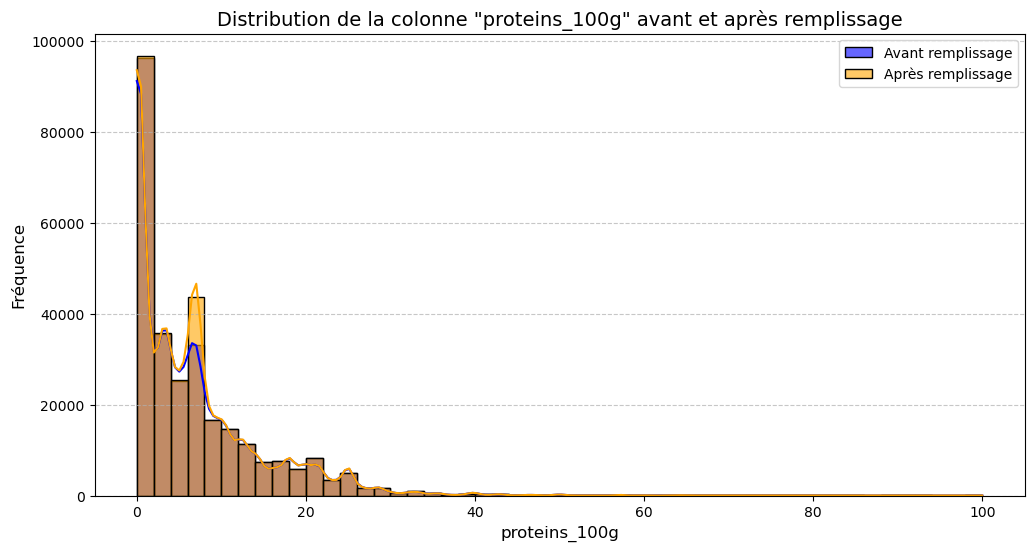

In [128]:
plot_column_distribution(
    df_original=df, 
    df_filled=filled_df, 
    column="proteins_100g", 
    bins=50
)

### Colonne fiber_100g

In [129]:
df = knn_fill_missing(
    df=filled_df,
    target_column="fiber_100g",
    features_columns=["energy_100g", "fat_100g", "carbohydrates_100g", "sugars_100g", "nutrition-score-fr_100g"]
)

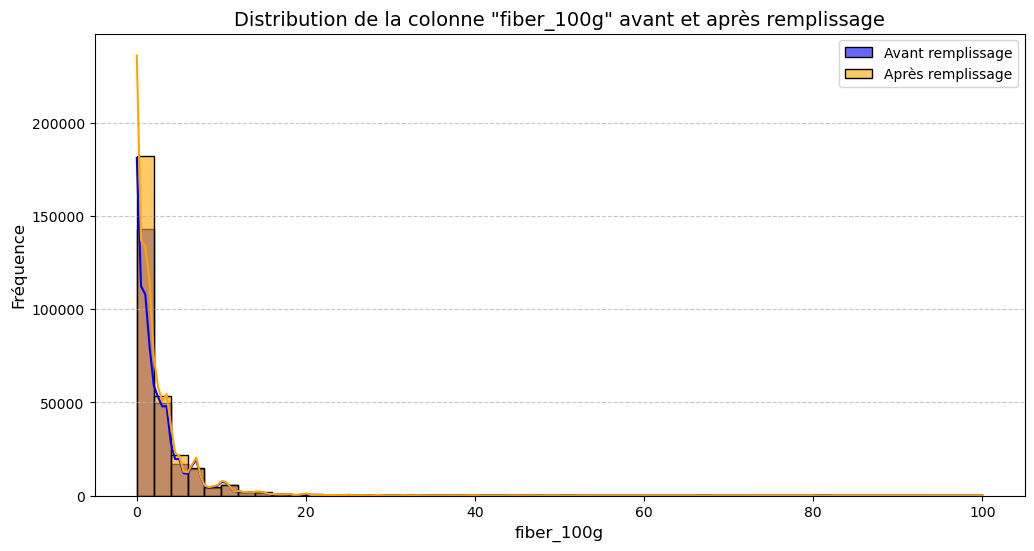

In [130]:
plot_column_distribution(
    df_original=filled_df, 
    df_filled=df, 
    column="fiber_100g", 
    bins=50
)

In [131]:
filled_df = knn_fill_missing(
    df=df,
    target_column="sodium_100g",
    features_columns=["energy_100g", "fat_100g", "carbohydrates_100g", "sugars_100g", "nutrition-score-fr_100g"]
)

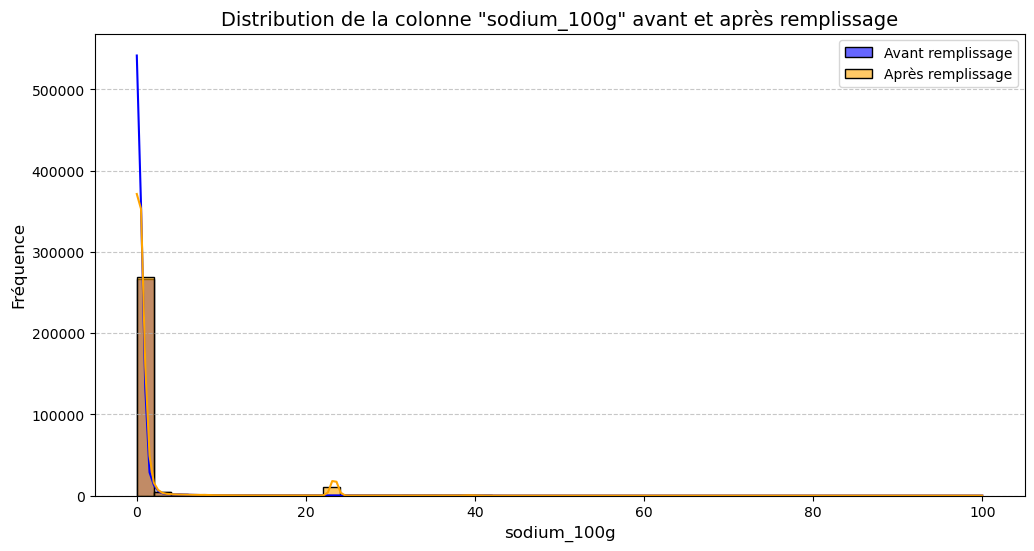

In [132]:
plot_column_distribution(
    df_original=df, 
    df_filled=filled_df, 
    column="sodium_100g", 
    bins=50
)

In [133]:
df = filled_df.copy()

In [134]:
# Remplacer par NaN uniquement dans la colonne 'pnns_groups_1' si la valeur est 'unknown' ou 'INCONNU'
df['pnns_groups_1'] = df['pnns_groups_1'].replace(['unknown', 'INCONNU'], np.nan)

<Axes: >

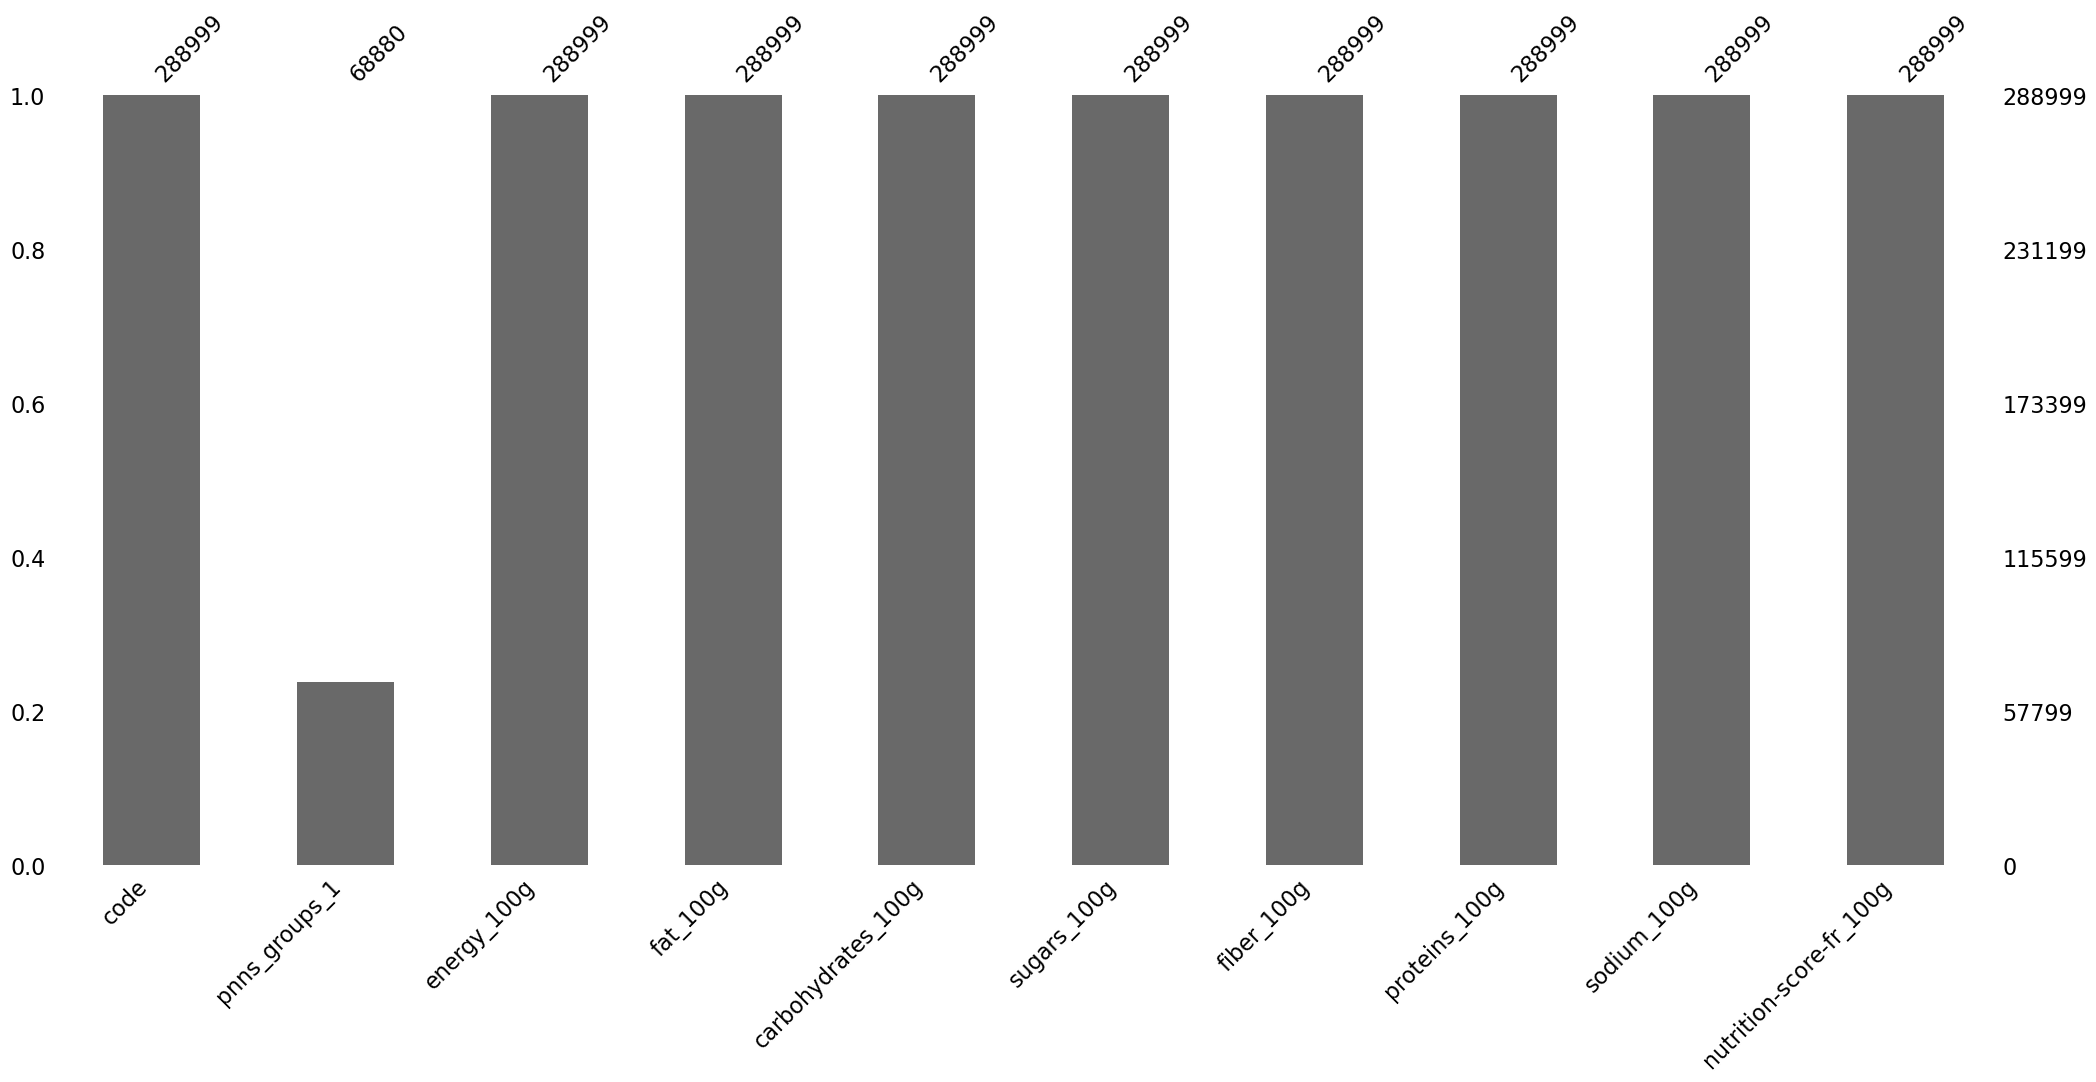

In [135]:
msno.bar(df)

In [136]:
# Liste des colonnes à transformer
columns_to_clip = ['fat_100g', 'sugars_100g', 'carbohydrates_100g']

# Remplacer les valeurs inférieures à 0 par 0 et celles supérieures à 100 par 100
df[columns_to_clip] = df[columns_to_clip].clip(lower=0, upper=100)

In [137]:
df.describe()

energy_100g       fat_100g  carbohydrates_100g    sugars_100g  \
count  288999.000000  288999.000000       288999.000000  288999.000000   
mean     1097.809671      12.359280           30.586210      14.801204   
std       780.253132      16.705971           27.850454      19.907023   
min         0.000000       0.000000            0.000000       0.000000   
25%       368.000000       0.100000            6.000000       1.000000   
50%      1097.809671       5.800000           20.100000       5.250000   
75%      1644.000000      19.006359           55.000000      20.590000   
max      4310.906931     100.000000          100.000000     100.000000   

          fiber_100g  proteins_100g    sodium_100g  nutrition-score-fr_100g  
count  288999.000000  288999.000000  288999.000000            288999.000000  
mean        2.430570       6.857669       1.469067                 8.594120  
std         3.961978       7.840643       4.932302                 8.504136  
min         0.000000       0.000000       0.000000               -15.000000  
25%         0.000000       0.700000       0.030000                 1.418598  
50%         1.200000       4.930000       0.271000                 8.594120  
75%         3.200000       9.590000       0.633000                15.000000  
max       100.000000     100.000000     100.000000                40.000000

### Remplissage de la colonne categorielle avec un KNN Imputeur

In [138]:
from scipy.stats import f_oneway

# Liste des colonnes numériques pour lesquelles vous voulez faire l'ANOVA
numerical_columns = ['energy_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g', 'nutrition-score-fr_100g']  # Exemple de colonnes numériques

# Filtrer les données sans valeurs manquantes pour la variable catégorielle
data_non_missing = df.dropna(subset=['pnns_groups_1'])

# Boucle sur chaque colonne numérique pour appliquer l'ANOVA
for col in numerical_columns:
    # Grouper les données par la variable catégorielle et appliquer la fonction "list" pour chaque groupe
    grouped = data_non_missing.groupby('pnns_groups_1')[col].apply(list)
    
    # Appliquer l'ANOVA
    f_stat, p_value = f_oneway(*grouped)
    
    # Afficher les résultats
    print(f"Colonne : {col}")
    print(f"F-statistique : {f_stat}")
    print(f"p-valeur : {p_value}")
    print("-" * 50)

Colonne : energy_100g
F-statistique : 11598.957812236138
p-valeur : 0.0
--------------------------------------------------
Colonne : fat_100g
F-statistique : 5046.67881863037
p-valeur : 0.0
--------------------------------------------------
Colonne : carbohydrates_100g
F-statistique : 31349.64448029352
p-valeur : 0.0
--------------------------------------------------
Colonne : sugars_100g
F-statistique : 20998.84022838601
p-valeur : 0.0
--------------------------------------------------
Colonne : fiber_100g
F-statistique : 7372.205870232974
p-valeur : 0.0
--------------------------------------------------
Colonne : proteins_100g
F-statistique : 14335.906525999284
p-valeur : 0.0
--------------------------------------------------
Colonne : sodium_100g
F-statistique : 1457.2934934656391
p-valeur : 0.0
--------------------------------------------------
Colonne : nutrition-score-fr_100g
F-statistique : 6501.945591249036
p-valeur : 0.0
--------------------------------------------------


<Axes: >

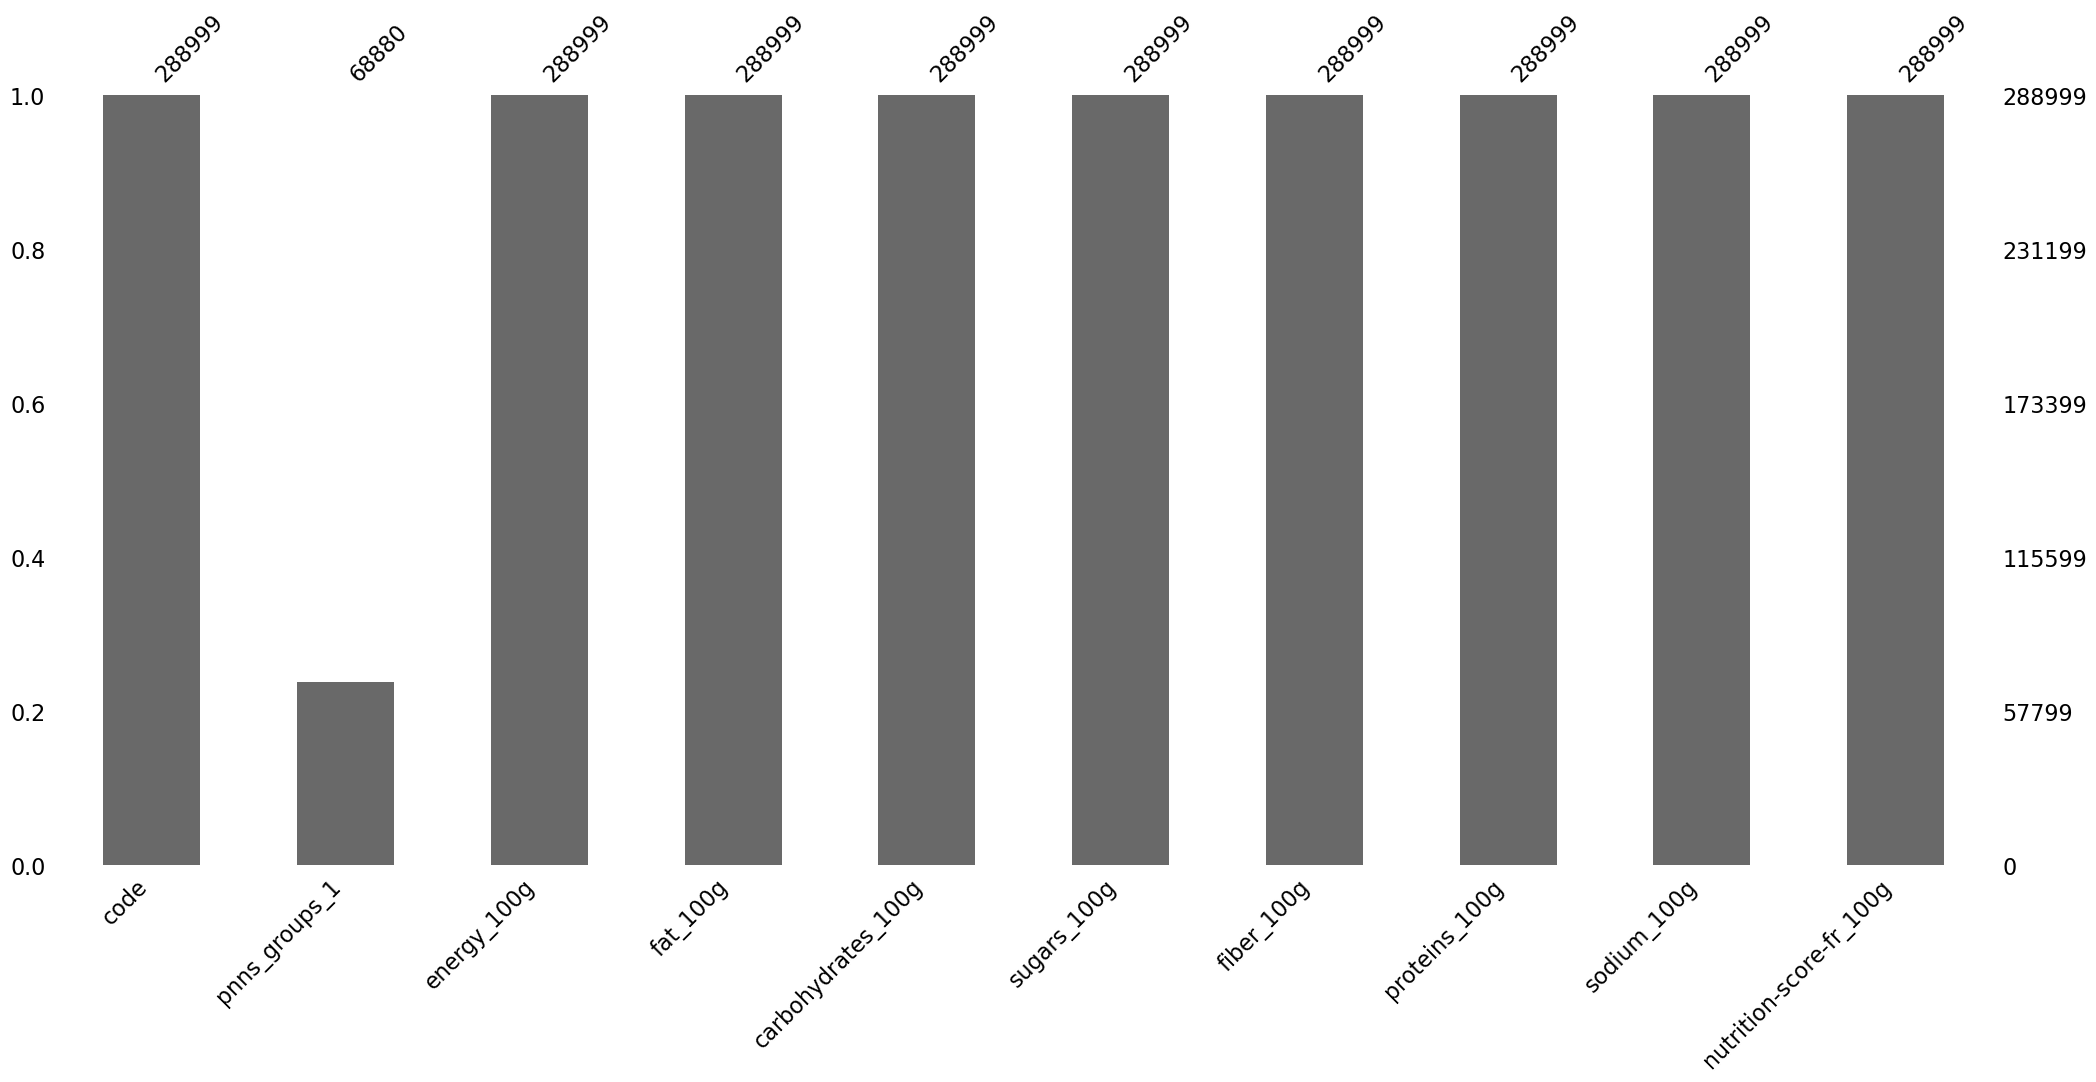

In [139]:
msno.bar(df)

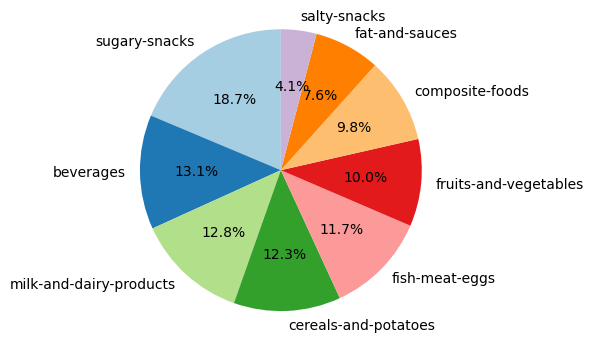

In [140]:
import matplotlib.pyplot as plt

# Création du diagramme en secteurs avec un style amélioré
fig, ax = plt.subplots(figsize=(4, 4))  # Taille personnalisée
df["pnns_groups_1"].value_counts(normalize=True).plot(
    kind='pie', 
    autopct='%1.1f%%',  # Affichage des pourcentages
    startangle=90,      # Démarre le premier secteur à 90° pour une meilleure lisibilité
    colors=plt.cm.Paired.colors,  # Palette de couleurs harmonieuse
    textprops={'fontsize': 10}   # Taille de police des textes
)

# Ajustement de l'affichage
ax.set_ylabel('')  # Supprime le label par défaut pour un aspect épuré

# Assure que le pie chart reste un cercle
plt.axis('equal')  

# Affiche le graphique
plt.show()

In [141]:
filled_df = df.copy()

In [142]:
# Identifier les moyennes des groupes pour les variables numériques
group_means = df.groupby('pnns_groups_1')[['energy_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g', 'nutrition-score-fr_100g']].mean()

# Fonction d'imputation basée sur les distances euclidiennes
def impute_category(row):
    if pd.isnull(row['pnns_groups_1']):
        # Calcul des distances entre la ligne actuelle et les moyennes de chaque groupe
        distances = group_means.apply(lambda x: np.linalg.norm(row[['energy_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g', 'nutrition-score-fr_100g']] - x), axis=1)
        
        # Retourner la catégorie avec la distance minimale
        return distances.idxmin()
    return row['pnns_groups_1']

# Appliquer l'imputation sur le DataFrame
df['pnns_groups_1'] = df.apply(impute_category, axis=1)

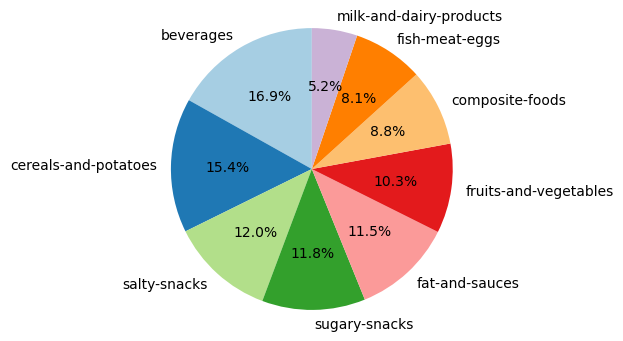

In [143]:
create_pie_chart(df, "pnns_groups_1")

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288999 entries, 1 to 320771
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   code                     288999 non-null  object 
 1   pnns_groups_1            288999 non-null  object 
 2   energy_100g              288999 non-null  float64
 3   fat_100g                 288999 non-null  float64
 4   carbohydrates_100g       288999 non-null  float64
 5   sugars_100g              288999 non-null  float64
 6   fiber_100g               288999 non-null  float64
 7   proteins_100g            288999 non-null  float64
 8   sodium_100g              288999 non-null  float64
 9   nutrition-score-fr_100g  288999 non-null  float64
dtypes: float64(8), object(2)
memory usage: 32.3+ MB


# Partie 4 : Effectuer une analyse uni-variée et bi-variée

## Uni-varié

In [145]:
# Statistiques descriptives pour energy_100g et fat_100g
print(df['fiber_100g'].describe())
print("-----------------------------")
print(df['nutrition-score-fr_100g'].describe())

count    288999.000000
mean          2.430570
std           3.961978
min           0.000000
25%           0.000000
50%           1.200000
75%           3.200000
max         100.000000
Name: fiber_100g, dtype: float64
-----------------------------
count    288999.000000
mean          8.594120
std           8.504136
min         -15.000000
25%           1.418598
50%           8.594120
75%          15.000000
max          40.000000
Name: nutrition-score-fr_100g, dtype: float64


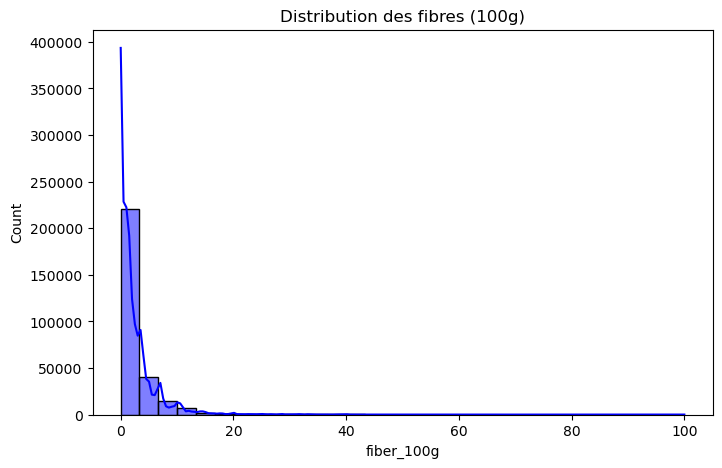

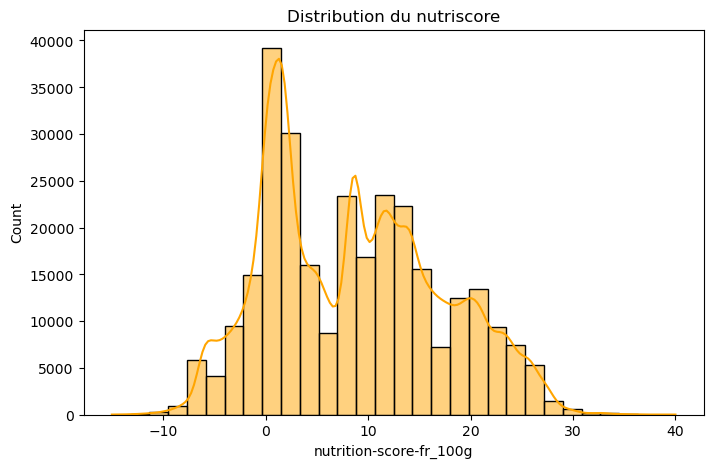

In [146]:
# Histogrammes
plt.figure(figsize=(8, 5))
sns.histplot(df['fiber_100g'], bins=30, kde=True, color='blue')
plt.title("Distribution des fibres (100g)")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['nutrition-score-fr_100g'], bins=30, kde=True, color='orange')
plt.title("Distribution du nutriscore")
plt.show()

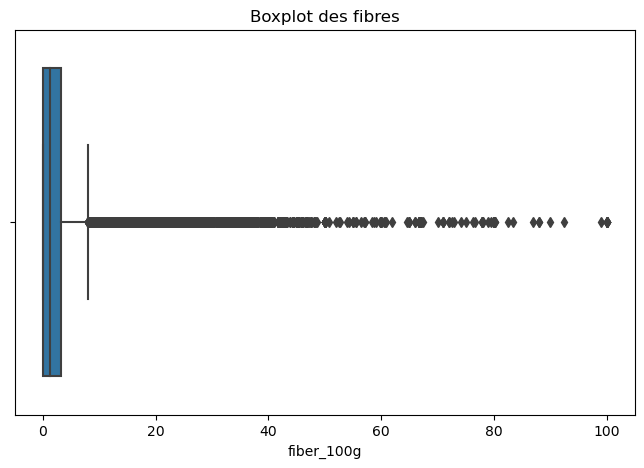

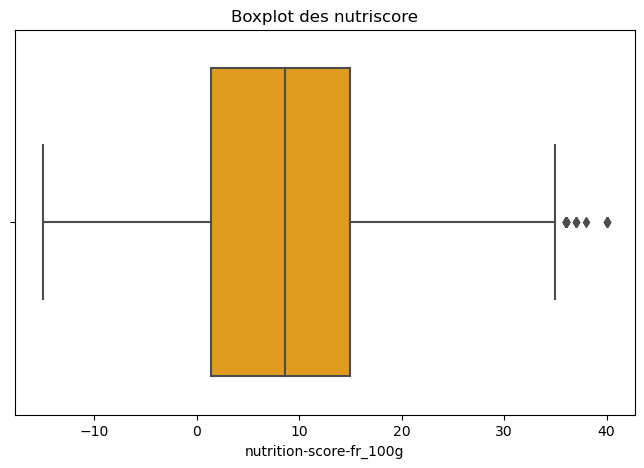

In [147]:
# Boxplots
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['fiber_100g'])
plt.title("Boxplot des fibres")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['nutrition-score-fr_100g'], color='orange')
plt.title("Boxplot des nutriscore")
plt.show()

## Bi-varié

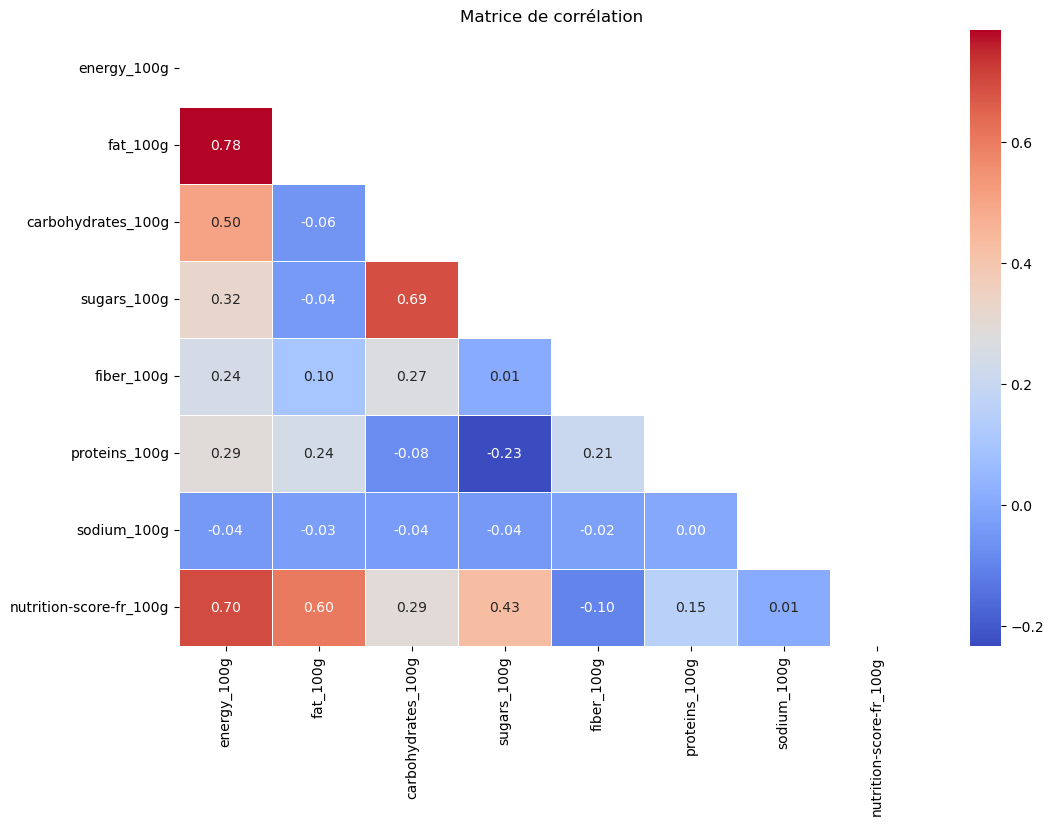

In [148]:
correlation()

Corrélation fat_100g vs nutrition score :
                          fat_100g  nutrition-score-fr_100g
fat_100g                  1.00000                  0.60249
nutrition-score-fr_100g   0.60249                  1.00000


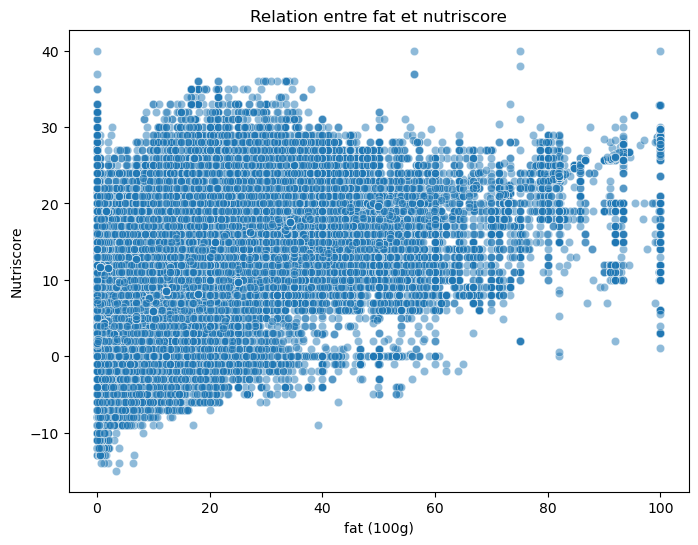

In [152]:
# Corrélation et scatter plot : energy_100g vs fat_100g
correlation_1 = df[['fat_100g', 'nutrition-score-fr_100g']].corr()
print("Corrélation fat_100g vs nutrition score :\n", correlation_1)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='fat_100g', y='nutrition-score-fr_100g', data=df, alpha=0.5)
plt.title("Relation entre fat et nutriscore")
plt.xlabel("fat (100g)")
plt.ylabel("Nutriscore")
plt.show()

Corrélation sugars_100g vs nutrition-score :
                          sugars_100g  nutrition-score-fr_100g
sugars_100g                 1.000000                 0.428537
nutrition-score-fr_100g     0.428537                 1.000000


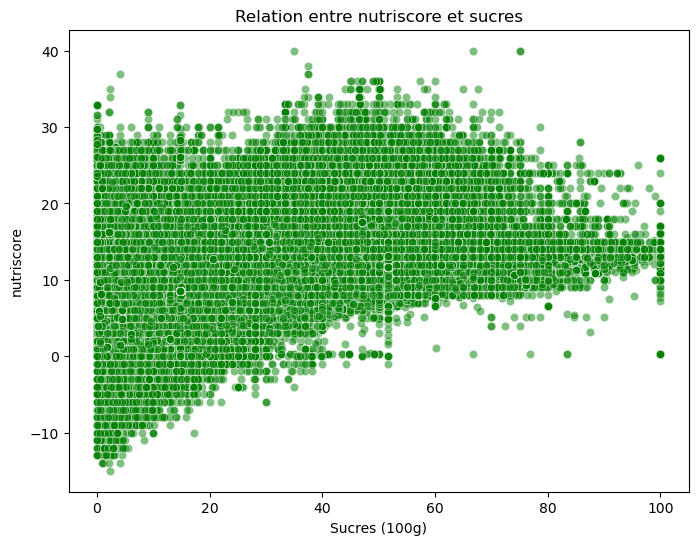

In [172]:
# Corrélation et scatter plot : carbohydrates_100g vs sugars_100g
correlation_2 = df[['sugars_100g', 'nutrition-score-fr_100g']].corr()
print("Corrélation sugars_100g vs nutrition-score :\n", correlation_2)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='sugars_100g', y='nutrition-score-fr_100g', data=df, alpha=0.5, color='green')
plt.title("Relation entre nutriscore et sucres")
plt.xlabel("Sucres (100g)")
plt.ylabel("nutriscore")
plt.show()

Corrélations avec la cible :
nutrition-score-fr_100g    1.000000
energy_100g                0.695341
fat_100g                   0.602490
sugars_100g                0.428537
carbohydrates_100g         0.294703
proteins_100g              0.150793
sodium_100g                0.007460
fiber_100g                -0.097878
Name: nutrition-score-fr_100g, dtype: float64


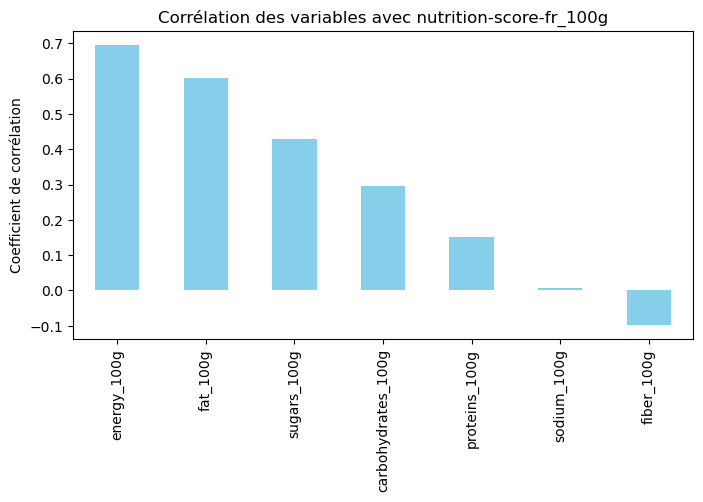

In [177]:
# Variables numériques
num_cols = df.select_dtypes(include=['float64']).columns

# Corrélation avec la cible
target = 'nutrition-score-fr_100g'
correlations = df[num_cols].corr()[target].sort_values(ascending=False)
print("Corrélations avec la cible :")
print(correlations)

# Visualiser uniquement les plus fortes corrélations (positives et négatives)
plt.figure(figsize=(8, 4))
correlations.drop(target).plot(kind='bar', color='skyblue')
plt.title(f"Corrélation des variables avec {target}")
plt.ylabel("Coefficient de corrélation")
plt.show()

# Partie 5 : Réaliser une analyse multi-variée

## ACP

In [184]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Créer un sous-DataFrame sans les colonnes catégorielles
df_acp = df.select_dtypes(include=['float64', 'int64'])

# 2. Standardiser les données
scaler = StandardScaler()
df_acp_scaled = scaler.fit_transform(df_acp)

# 3. Réaliser l'ACP
pca = PCA()
pca_result = pca.fit_transform(df_acp_scaled)

In [185]:
# 4. Ajouter les résultats dans un nouveau DataFrame
pca_df = pd.DataFrame(pca_result, columns=[f"PC{i+1}" for i in range(pca_result.shape[1])])

# 5. Variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_

# Afficher les résultats
print("Variance expliquée par chaque composante :", explained_variance)

Variance expliquée par chaque composante : [0.3531315  0.21391085 0.15116633 0.12456068 0.0863244  0.04121943
 0.02587465 0.00381216]


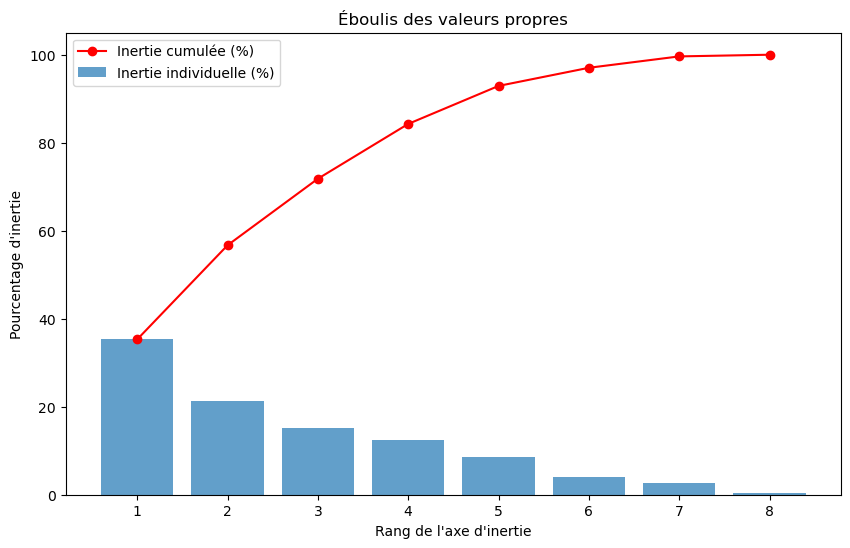

In [186]:
import numpy as np
import matplotlib.pyplot as plt

# Supposons que 'explained_variance' soit déjà calculée
explained_variance_cum = np.cumsum(explained_variance)

# Liste des indices pour les composantes
x_list = range(1, len(explained_variance) + 1)

# Graphique
plt.figure(figsize=(10, 6))

# Barres pour l'inertie expliquée
plt.bar(x_list, explained_variance * 100, alpha=0.7, label="Inertie individuelle (%)")

# Courbe cumulative en rouge
plt.plot(x_list, explained_variance_cum * 100, c="red", marker='o', label="Inertie cumulée (%)")

# Ajout des labels et du titre
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Éboulis des valeurs propres")
plt.legend()

# Affichage
plt.show()

In [187]:
# Vérification du pourcentage de variance cumulée pour les 4 premières composantes
variance_cum_80 = explained_variance_cum[3]  # 3 pour la 4e composante (indexé à partir de 0)

print(f"Les 4 premières composantes expliquent {variance_cum_80 * 100:.2f}% de la variance.")

# Extraire les 4 premières composantes principales
pca_4_first = pca.components_[:4]

# Créer un DataFrame pour afficher les poids des variables sur les composantes principales
loadings_df = pd.DataFrame(pca_4_first.T, columns=[f"PC{i+1}" for i in range(4)], index=df_acp.columns)

# Afficher les poids des variables sur les 4 premières composantes principales
loadings_df

Les 4 premières composantes expliquent 84.28% de la variance.


PC1       PC2       PC3       PC4
energy_100g              0.561880  0.141583  0.033673  0.000613
fat_100g                 0.411810  0.437900 -0.190487 -0.053202
carbohydrates_100g       0.359523 -0.495860  0.266568  0.065029
sugars_100g              0.324682 -0.561685 -0.079862  0.013786
fiber_100g               0.141468  0.041525  0.794798  0.089297
proteins_100g            0.142593  0.469428  0.336774  0.052045
sodium_100g             -0.034308  0.034440 -0.110295  0.990870
nutrition-score-fr_100g  0.488370  0.059643 -0.357572  0.015663

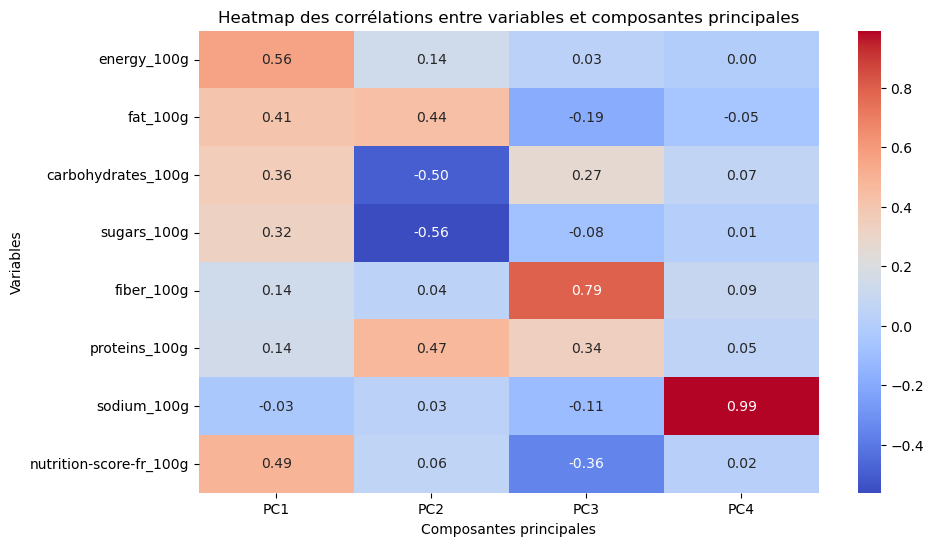

In [188]:
# Heatmap des poids des variables (loadings) sur les 4 premières composantes principales
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, 
            xticklabels=loadings_df.columns, yticklabels=loadings_df.index)

plt.title("Heatmap des corrélations entre variables et composantes principales")
plt.xlabel("Composantes principales")
plt.ylabel("Variables")
plt.show()

In [200]:
import matplotlib.pyplot as plt
import numpy as np

def correlation_graph(pca, 
                      x_y, 
                      features):
    """Affiche le graphe des corrélations

    Arguments :
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait les indices des axes à afficher (x et y)
    x, y = x_y

    # Création de la figure et de l'axe
    fig, ax = plt.subplots(figsize=(8, 7))

    # Pour chaque composante (chaque dimension) :
    for i in range(0, pca.components_.shape[1]):

        # Dessiner les flèches représentant les poids des variables
        ax.arrow(0, 0, 
                 pca.components_[x, i],  
                 pca.components_[y, i],  
                 head_width=0.07,
                 head_length=0.07, 
                 width=0.02)

        # Ajouter le nom de la variable au bout de chaque flèche
        ax.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])

    # Ajouter les axes horizontaux et verticaux (lignes de référence)
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nommer les axes avec les pourcentages d'inertie expliquée
    plt.xlabel('F{} ({}%)'.format(x + 1, round(100 * pca.explained_variance_ratio_[x], 1)))
    plt.ylabel('F{} ({}%)'.format(y + 1, round(100 * pca.explained_variance_ratio_[y], 1)))

    # Titre du graphique
    plt.title("Cercle des corrélations (F{} et F{})".format(x + 1, y + 1))

    # Ajouter un cercle unité pour mieux visualiser les distances
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an), linestyle=':', color='grey')  # Cercle unité

    # Mettre les axes à la même échelle et afficher le graphique
    plt.axis('equal')
    plt.show(block=False)

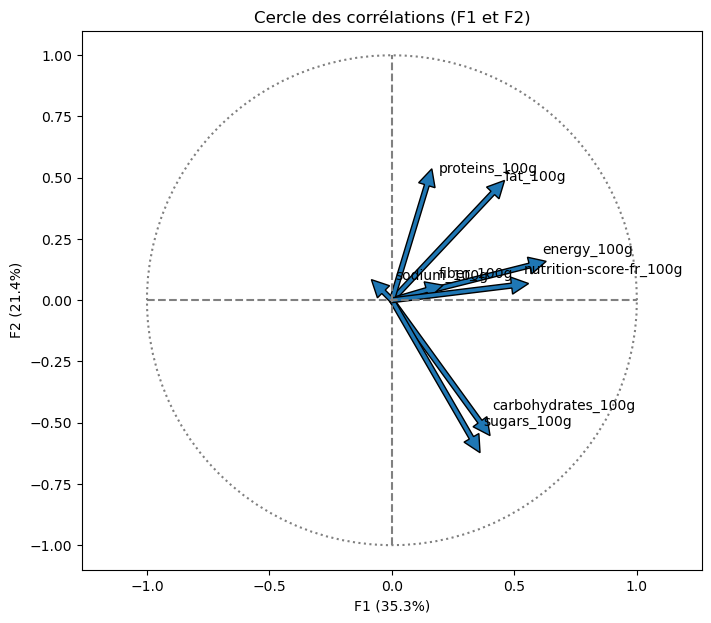

In [201]:
# Affichage des corrélations entre la première et la deuxième composante principale
correlation_graph(pca, [0, 1], df_acp.columns)

Corrélations observées :
- F1 (axe horizontal) : Ce composant semble être fortement influencé par des variables telles que énergie_100g, le nutriscore, fat_100g, carbohydrate et sucres. Plus F1 est grand plus le produit contient d'energie, de matière grasse, de sucre et de glucides. Et donc ont un nutriscore élevé cad mauvais.

- F2 (axe vertical) : Le composant F2 semble être influencé par des variables telles que protéines_100g, fat, sucre_100g, et carbohydrates_100g. Cela pourrait signifier que plus F2 est grand, plus les produits sont riches en protéine et matière grasse mais faible en sucre et carbohydrate.

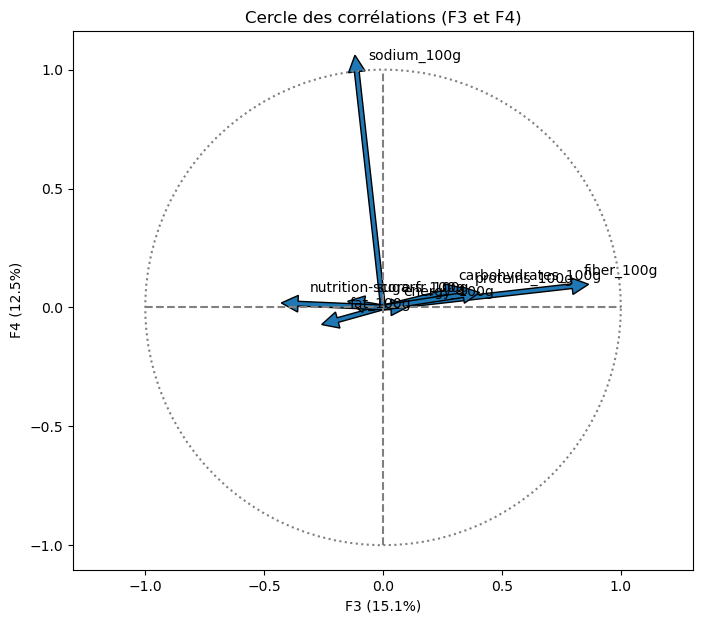

In [202]:
# Affichage des corrélations entre la troisième et la quatrième composante principale
correlation_graph(pca, [2, 3], df_acp.columns)

F3 est fortement correlé à Fibre et au nutriscore. Celà signifie que plus F3 est grand, plus le produit contient de fibres et plus petit est son nutriscore (donc meilleur).

F4 est fortement correlé au sodium. Donc plus F4 est grand plus il contient de sodium

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def projection_pca(pca_result, df, pnns_column, f1_index=0, f2_index=1, explained_variance_ratio=None):
   
    # Création de la projection en fonction des indices F1 et F2
    projection = pd.DataFrame(pca_result[:, [f1_index, f2_index]], columns=['F1', 'F2'])
    projection[pnns_column] = df[pnns_column]

    # Affichage du graphique
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=projection, x='F1', y='F2', hue=pnns_column, palette='tab10', alpha=0.7)
    
    # Titre et labels avec les pourcentages de variance expliquée
    if explained_variance_ratio is not None:
        plt.title(f'Projection des individus (coloré par {pnns_column})')
        plt.xlabel(f'F{f1_index+1} ({explained_variance_ratio[f1_index]*100:.2f}%)')
        plt.ylabel(f'F{f2_index+1} ({explained_variance_ratio[f2_index]*100:.2f}%)')
    else:
        plt.title(f'Projection des individus (coloré par {pnns_column})')
        plt.xlabel(f'F{f1_index+1}')
        plt.ylabel(f'F{f2_index+1}')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()

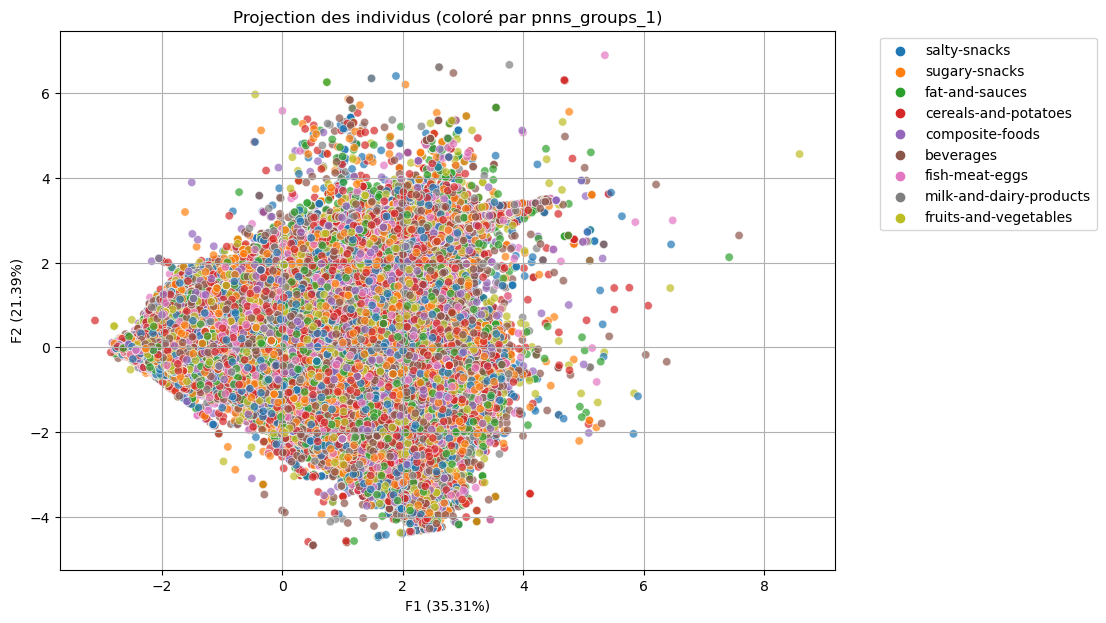

In [207]:
# Exemple d'appel avec PCA et df déjà définis
projection_pca(pca_result, df, pnns_column='pnns_groups_1', f1_index=0, f2_index=1, explained_variance_ratio=explained_variance_ratio)

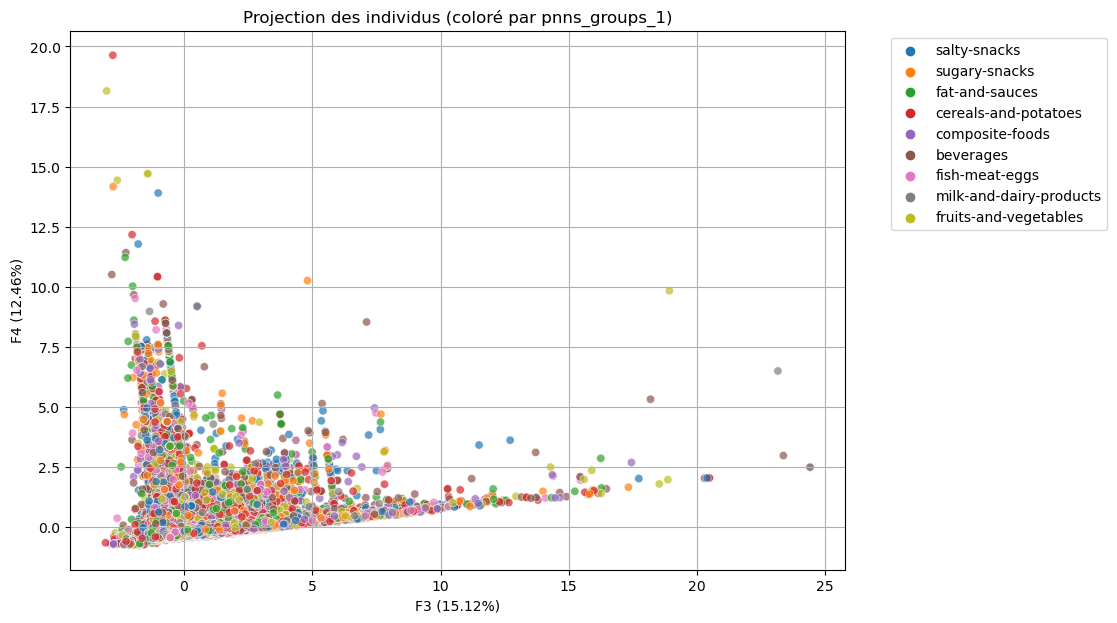

In [208]:
# Exemple d'appel avec PCA et df déjà définis, et en choisissant les composantes F3 et F4
projection_pca(pca_result, df, pnns_column='pnns_groups_1', f1_index=2, f2_index=3, explained_variance_ratio=explained_variance_ratio)

## ANOVA

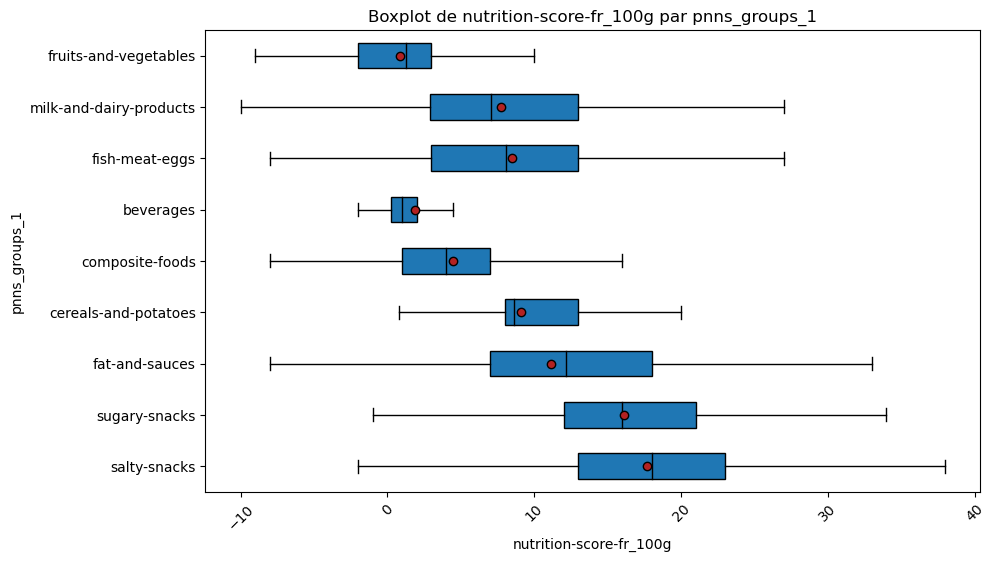

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 1. Choisir la variable catégorielle et la variable numérique
categorical_var = 'pnns_groups_1'  # Variable catégorielle
numerical_var = 'nutrition-score-fr_100g'  # Variable numérique


# 2. Rassembler les groupes par modalité
modalites = df[categorical_var].unique()  # Identifie les modalités uniques de la variable catégorielle
groupes = []
for m in modalites:
    groupes.append(df[df[categorical_var] == m][numerical_var])

# Propriétés graphiques (similaires à ce que vous avez montré pour les boxplots)
medianprops = {'color':"black"}  # Couleur de la ligne médiane
meanprops = {'marker':'o', 'markeredgecolor':'black',  # Point pour la moyenne
             'markerfacecolor':'firebrick'}

# 3. Créer le boxplot avec les propriétés personnalisées
plt.figure(figsize=(10, 6))  # Taille de la figure
plt.boxplot(groupes, labels=modalites, showfliers=False,  # Ne pas afficher les valeurs aberrantes
            medianprops=medianprops, vert=False,  # Boxplot horizontal
            patch_artist=True, showmeans=True,  # Ajouter la moyenne
            meanprops=meanprops)

# Ajouter un titre et des labels aux axes
plt.title(f"Boxplot de {numerical_var} par {categorical_var}")
plt.xlabel(numerical_var)
plt.ylabel(categorical_var)
plt.xticks(rotation=45)  # Rotation des labels si nécessaire
plt.show()

In [215]:
import pandas as pd
import numpy as np
from scipy import stats


# 1. Choisir la variable catégorielle et la variable numérique
categorical_var = 'pnns_groups_1'  # Variable catégorielle
numerical_var = 'nutrition-score-fr_100g'  # Variable numérique

# 2. Effectuer l'ANOVA
groups = [df[df[categorical_var] == group][numerical_var] for group in df[categorical_var].unique()]
f_stat, p_value = stats.f_oneway(*groups)

# 3. Calcul de l'eta-square
ss_between = sum([len(group) * (np.mean(group) - np.mean(df[numerical_var]))**2 for group in groups])
ss_total = np.sum((df[numerical_var] - np.mean(df[numerical_var]))**2)
eta_squared = ss_between / ss_total

# Afficher les résultats
print(f"ANOVA: F-statistic = {f_stat}, p-value = {p_value}")
print(f"Eta-squared = {eta_squared}")

ANOVA: F-statistic = 29661.631276916934, p-value = 0.0
Eta-squared = 0.450884842516292
